In [1]:
#Imported Packages:

#Generic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Visualization
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv',index_col='Id',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
test_data=pd.read_csv('test.csv',index_col='Id',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
default_NA={'Alley':'NA','BsmtQual':'NA','BsmtCond':'NA','BsmtExposure':'NA','BsmtFinType1':'NA',
                  'BsmtFinType2':'NA','FireplaceQu':'NA','GarageType':'NA','GarageFinish':'NA','GarageQual':'NA',
                  'GarageCond':'NA','PoolQC':'NA','Fence':'NA','MiscFeature':'NA','Exterior2nd':'NA'}
train_data=train_data.fillna(default_NA)
test_data=test_data.fillna(default_NA)
# Check for number of null values
print("nulls found for train.csv")
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue
# Check for number of null values
print("nulls found for test.csv")
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

nulls found for train.csv
LotFrontage 259
MasVnrType 8
MasVnrArea 8
Electrical 1
GarageYrBlt 81
nulls found for test.csv
MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


In [3]:
train_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data.loc[:, train_data.columns != 'SalePrice'], train_data['SalePrice'],random_state=1,train_size=0.8)
training= pd.concat([X_train, y_train], axis=1)
validation = pd.concat([X_valid, y_valid], axis=1)
training.reset_index().to_csv('training.csv',index=False)
validation.reset_index().to_csv('validation.csv',index=False)

In [5]:
Sale_type_common=training.groupby(['Neighborhood'])['SaleType'].agg(pd.Series.mode).reset_index()
def fill_sale_type(df):
    merged_df = pd.merge(df, Sale_type_common, how='left', on=['Neighborhood'])
    merged_df['SaleType_x']=merged_df.apply(lambda row: row['SaleType_y'] if pd.isnull(row['SaleType_x']) else row['SaleType_x'], axis=1)
    merged_df.drop('SaleType_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'SaleType_x': 'SaleType'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
MSZoning_common=training.groupby(['Neighborhood'])['MSZoning'].agg(pd.Series.mode).reset_index()
def fill_MS_Zoning(df):
    merged_df = pd.merge(df, MSZoning_common, how='left', on=['Neighborhood'])
    merged_df['MSZoning_x']=merged_df.apply(lambda row: row['MSZoning_y'] if pd.isnull(row['MSZoning_x']) else row['MSZoning_x'], axis=1)
    merged_df.drop('MSZoning_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'MSZoning_x': 'MSZoning'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
lot_frontage_common=training.groupby(['Neighborhood'])['LotFrontage'].median().reset_index()
def fill_lot_frontage(df):
    merged_df = pd.merge(df, lot_frontage_common, how='left', on=['Neighborhood'])
    merged_df['LotFrontage_x']=merged_df.apply(lambda row: row['LotFrontage_y'] if pd.isnull(row['LotFrontage_x']) else row['LotFrontage_x'], axis=1)
    merged_df.drop('LotFrontage_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'LotFrontage_x': 'LotFrontage'})
    merged_df.set_index(df.index, inplace=True)
    return merged_df
GarageYrBlt_common=training.groupby(['Neighborhood','GarageType'])['GarageYrBlt'].median().round().reset_index()
def fill_GarageYrBlt(df):
    merged_df = pd.merge(df, GarageYrBlt_common, how='left', on=['Neighborhood','GarageType'])
    merged_df['GarageYrBlt_x']=merged_df.apply(lambda row: row['GarageYrBlt_y'] if pd.isnull(row['GarageYrBlt_x']) else row['GarageYrBlt_x'], axis=1)
    merged_df.drop('GarageYrBlt_y', axis=1, inplace=True)
    merged_df=merged_df.rename(columns={'GarageYrBlt_x': 'GarageYrBlt'})
    merged_df.set_index(df.index, inplace=True)
    merged_df['GarageYrBlt']=merged_df['GarageYrBlt'].fillna(0)
    return merged_df
def create_new_features(df):
    df['TotalSF']=df['1stFlrSF']+df['2ndFlrSF']+df['TotalBsmtSF']
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5*df['HalfBath'])+df['BsmtFullBath']+(0.5*df['BsmtHalfBath']))
    df['Bsmt_Baths']=df['BsmtFullBath']+(0.5*df['BsmtHalfBath'])
    df['Total_BathAbvGrd']=df['FullBath']+(0.5*df['HalfBath'])
    df["AvgRoomSize"] = df["GrLivArea"] / (df["TotRmsAbvGrd"]+(0.4*df['Total_BathAbvGrd']))
    df['Total_porch_sf'] = (df['OpenPorchSF']+df['3SsnPorch']+df['EnclosedPorch'] + df['ScreenPorch']+df['WoodDeckSF'])
    df['BedBath']=df['BedroomAbvGr']*df['Total_BathAbvGrd']
    df['TotalLot']=df['LotFrontage']+df['LotArea']
    df['sqft_living']=df['TotalBsmtSF']+df['GrLivArea']
    df=df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','1stFlrSF','WoodDeckSF','BedroomAbvGr'])
    return df
def set_age(df):
    tem=np.where(df['YrSold']>df['GarageYrBlt'],df['YrSold'],np.where(df['GarageYrBlt']>df['YearRemodAdd'],df['GarageYrBlt'],df['YearRemodAdd']))
    df['age']=tem-df['YearBuilt']
    df=df.drop(columns=['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold'])
    return df
def finalize_convert(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['OverallCond'] = df['OverallCond'].astype(str)
#     df['YearRemodAdd']=df['YearRemodAdd'].astype(str)
#     df['YearBuilt']=df['YearBuilt'].astype(str)
#     df['GarageYrBlt']=df['GarageYrBlt'].astype(str)
    #df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    return df
od=['MSZoning','LotShape','LandContour','LandSlope','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
    'BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
    'FireplaceQu','GarageType','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence','MiscFeature',
    'SaleType','SaleCondition']
dm=['MSSubClass','Street','Alley','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating']
def format_table(train,valid,test):
    data= pd.concat([train,valid,test], axis=0)
    data=pd.get_dummies(data,columns=dm)
    new_train=data.loc[train.index,]
    new_valid=data.loc[valid.index,]
    new_test=data.loc[test.index,]
    return new_train,new_valid,new_test
common_electrical=training['Electrical'].mode()[0]
common_masvnrtype=training['MasVnrType'].mode()[0]
common_exterior_1=training['Exterior1st'].mode()[0]
common_exterior_2=training['Exterior2nd'].mode()[0]

In [6]:
# fill null values
training=fill_sale_type(training)
training=fill_MS_Zoning(training)
training=fill_lot_frontage(training)
training.drop('Utilities', axis=1, inplace=True)
training['Electrical']=training['Electrical'].fillna(common_electrical)
training['MasVnrType']=training['MasVnrType'].fillna(common_masvnrtype)
training['MasVnrArea']=training['MasVnrArea'].fillna(0)
training['Functional']=training['Functional'].fillna('Typ')
training=fill_GarageYrBlt(training)
training['Exterior1st']=training['Exterior1st'].fillna(common_exterior_1)
training['Exterior2nd']=training['Exterior2nd'].fillna(common_exterior_2)
training['BsmtFinSF1']=training.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
training['BsmtFinSF2']=training.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
training['BsmtUnfSF']=training.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
training['TotalBsmtSF']=training.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
training['BsmtFullBath']=training['BsmtFullBath'].fillna(0)
training['BsmtHalfBath']=training['BsmtHalfBath'].fillna(0)
training['KitchenQual']=training['KitchenQual'].fillna('TA')
training['GarageArea']=training['GarageArea'].fillna(0)
training['GarageCars']=training['GarageCars'].fillna(0)
#training['GarageYrBlt'] = training.apply(lambda row: 0 if row['GarageType']=='NA' and pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1)
validation=fill_sale_type(validation)
validation=fill_MS_Zoning(validation)
validation=fill_lot_frontage(validation)
validation.drop('Utilities', axis=1, inplace=True)
validation['Electrical']=validation['Electrical'].fillna(common_electrical)
validation['MasVnrType']=validation['MasVnrType'].fillna(common_masvnrtype)
validation['MasVnrArea']=validation['MasVnrArea'].fillna(0)
validation['Functional']=validation['Functional'].fillna('Typ')
validation=fill_GarageYrBlt(validation)
validation['Exterior1st']=validation['Exterior1st'].fillna(common_exterior_1)
validation['Exterior2nd']=validation['Exterior2nd'].fillna(common_exterior_2)
validation['BsmtFinSF1']=validation.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
validation['BsmtFinSF2']=validation.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
validation['BsmtUnfSF']=validation.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
validation['TotalBsmtSF']=validation.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
validation['BsmtFullBath']=validation['BsmtFullBath'].fillna(0)
validation['BsmtHalfBath']=validation['BsmtHalfBath'].fillna(0)
validation['KitchenQual']=validation['KitchenQual'].fillna('TA')
validation['GarageArea']=validation['GarageArea'].fillna(0)
validation['GarageCars']=validation['GarageCars'].fillna(0)
#validation['GarageYrBlt'] = validation.apply(lambda row: 0 if row['GarageType']=='NA' and pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1)
test_data=fill_sale_type(test_data)
test_data=fill_MS_Zoning(test_data)
test_data=fill_lot_frontage(test_data)
test_data.drop('Utilities', axis=1, inplace=True)
test_data['Electrical']=test_data['Electrical'].fillna(common_electrical)
test_data['MasVnrType']=test_data['MasVnrType'].fillna(common_masvnrtype)
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(0)
test_data['Functional']=test_data['Functional'].fillna('Typ')
test_data=fill_GarageYrBlt(test_data)
test_data['Exterior1st']=test_data['Exterior1st'].fillna(common_exterior_1)
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(common_exterior_2)
test_data['BsmtFinSF1']=test_data.apply(lambda row: 0 if row['BsmtFinType1']=='NA' and pd.isnull(row['BsmtFinSF1']) else row['BsmtFinSF1'], axis=1)
test_data['BsmtFinSF2']=test_data.apply(lambda row: 0 if row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtFinSF2']) else row['BsmtFinSF2'], axis=1)
test_data['BsmtUnfSF']=test_data.apply(lambda row: 0 if (row['BsmtFinType1']=='NA' and row['BsmtFinType2']=='NA' and pd.isnull(row['BsmtUnfSF'])) else row['BsmtUnfSF'], axis=1)
test_data['TotalBsmtSF']=test_data.apply(lambda row: row['BsmtFinSF1']+row['BsmtFinSF2']+row['BsmtUnfSF'] if pd.isnull(row['TotalBsmtSF']) else row['TotalBsmtSF'] ,axis=1)
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(0)
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(0)
test_data['KitchenQual']=test_data['KitchenQual'].fillna('TA')
test_data['GarageArea']=test_data['GarageArea'].fillna(0)
test_data['GarageCars']=test_data['GarageCars'].fillna(0)
training.reset_index().to_csv('training_clean.csv',index=False)
validation.reset_index().to_csv('validation_clean.csv',index=False)
test_data.reset_index().to_csv('test_clean.csv',index=False)

In [7]:
# Check for number of null values
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [8]:
# Check for number of null values
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [9]:
# Check for number of null values
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [10]:
training=create_new_features(training)
training=set_age(training)
training=finalize_convert(training)
validation=create_new_features(validation)
validation=set_age(validation)
validation=finalize_convert(validation)
test_data=create_new_features(test_data)
test_data=set_age(test_data)
test_data=finalize_convert(test_data)
training,validation,test_data=format_table(training,validation,test_data)
training.reset_index().to_csv('training_eda.csv',index=False)
validation.reset_index().to_csv('validation_eda.csv',index=False)
test_data.reset_index().to_csv('test_eda.csv',index=False)

<Axes: title={'center': 'Normal'}, xlabel='SalePrice'>

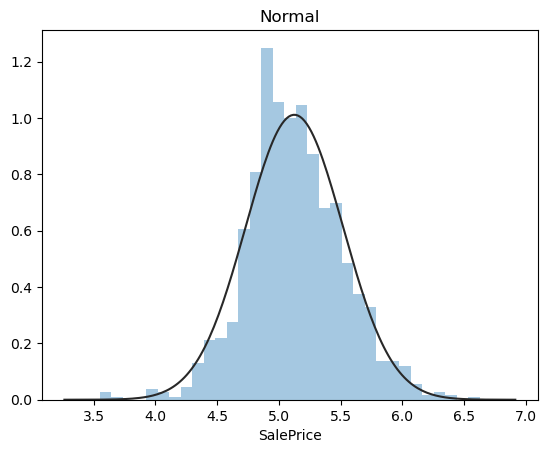

In [11]:
import scipy.stats as st
y = np.log(training['SalePrice']/1000)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

In [12]:
def get_cat_num_features(df):
    num_features = []
    cat_features = []
    for col in df.columns:
        if df[col].dtype=="float64" or df[col].dtype=="int64":
            num_features.append(col)
        else:
            cat_features.append(col)
    return num_features, cat_features
num_feat,cat_feat=get_cat_num_features(training.loc[:,training.columns!='SalePrice'])
num_feat

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'TotalSF',
 'Total_Bathrooms',
 'Bsmt_Baths',
 'Total_BathAbvGrd',
 'AvgRoomSize',
 'Total_porch_sf',
 'BedBath',
 'TotalLot',
 'sqft_living',
 'age']

In [13]:
tem=training[num_feat].corr()
threshold = 0.7
highly_correlated = set()
for i in range(len(tem.columns)):
    for j in range(i):
        if abs(tem.iloc[i, j]) > threshold:
            colname = tem.columns[i]
            highly_correlated.add(colname)
training= training.drop(columns=highly_correlated)
validation= validation.drop(columns=highly_correlated)
test_data= test_data.drop(columns=highly_correlated)
highly_correlated

{'BedBath',
 'GarageArea',
 'TotRmsAbvGrd',
 'TotalLot',
 'TotalSF',
 'Total_BathAbvGrd',
 'sqft_living'}

In [14]:
tem['BedBath']

LotFrontage         0.240452
LotArea             0.158682
OverallQual         0.416785
MasVnrArea          0.251039
BsmtFinSF1          0.002175
BsmtFinSF2         -0.075959
BsmtUnfSF           0.210980
TotalBsmtSF         0.186021
2ndFlrSF            0.688935
LowQualFinSF        0.061694
GrLivArea           0.756602
KitchenAbvGr        0.209793
TotRmsAbvGrd        0.768646
Fireplaces          0.233114
GarageCars          0.376778
GarageArea          0.312391
OpenPorchSF         0.230588
EnclosedPorch      -0.068135
3SsnPorch          -0.005563
ScreenPorch         0.058757
PoolArea            0.077864
MiscVal             0.006566
TotalSF             0.575916
Total_Bathrooms     0.624174
Bsmt_Baths         -0.103554
Total_BathAbvGrd    0.863601
AvgRoomSize         0.290335
Total_porch_sf      0.214490
BedBath             1.000000
TotalLot            0.159110
sqft_living         0.577945
age                -0.263260
Name: BedBath, dtype: float64

['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Total_Bathrooms', 'Bsmt_Baths', 'AvgRoomSize', 'Total_porch_sf', 'age']
Skewness: 2.4621383371024117
count    1168.000000
mean       70.329195
std        22.893417
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


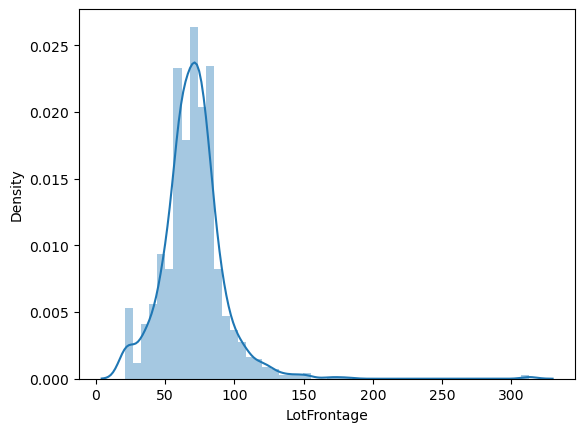

Skewness: 12.397355223058842
count      1168.000000
mean      10542.357877
std        9875.947661
min        1300.000000
25%        7500.000000
50%        9501.500000
75%       11621.750000
max      215245.000000
Name: LotArea, dtype: float64


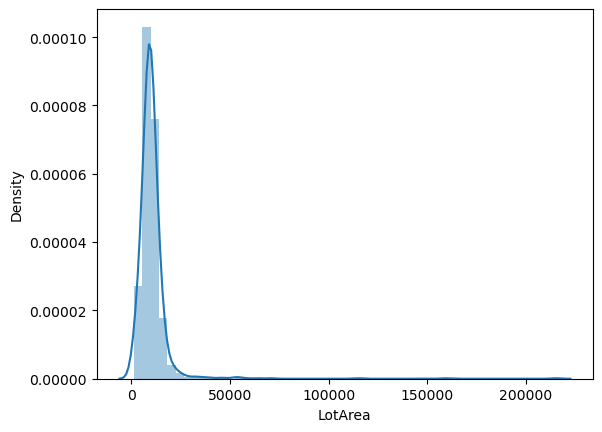

Skewness: 0.1913637507970349
count    1168.000000
mean        6.134418
std         1.369861
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


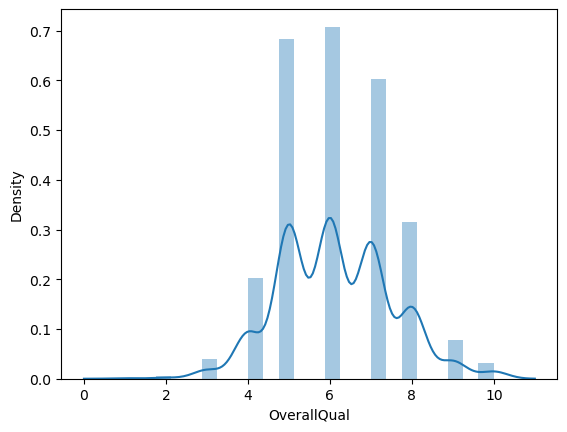

Skewness: 2.5959322205110924
count    1168.000000
mean      104.402397
std       177.678529
min         0.000000
25%         0.000000
50%         0.000000
75%       170.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


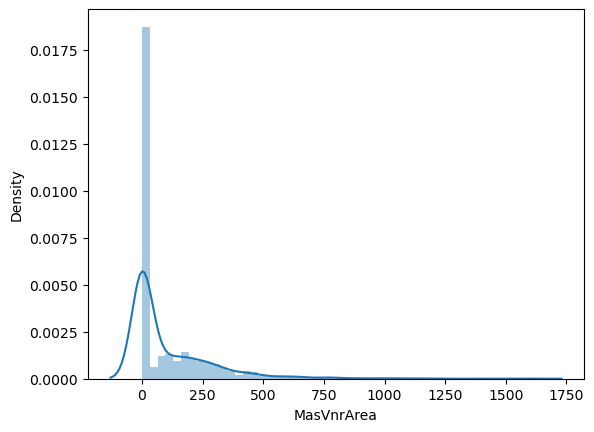

Skewness: 1.8171624282401262
count    1168.000000
mean      452.736301
std       463.541117
min         0.000000
25%         0.000000
50%       398.500000
75%       728.750000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


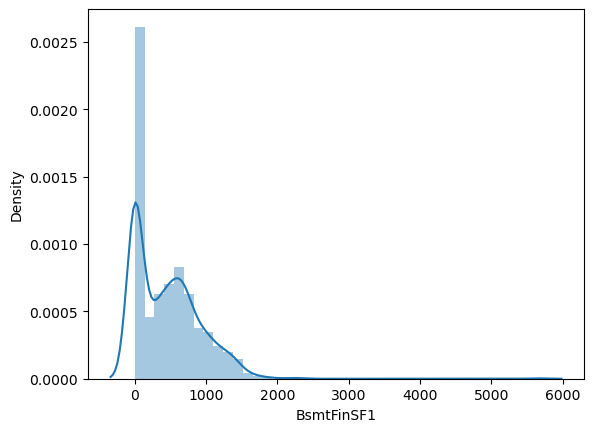

Skewness: 4.418298341491956
count    1168.000000
mean       44.667808
std       161.909961
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


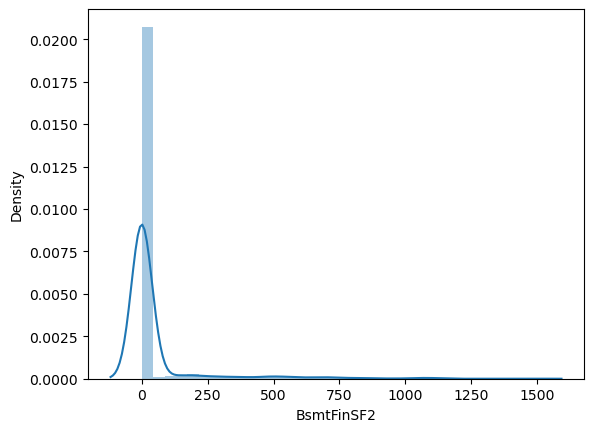

Skewness: 0.9156195058189517
count    1168.000000
mean      572.617295
std       448.642738
min         0.000000
25%       223.750000
50%       484.000000
75%       815.250000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


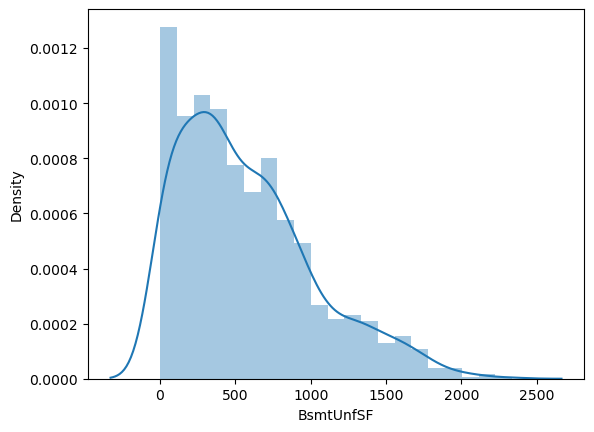

Skewness: 1.6796972409452224
count    1168.000000
mean     1070.021404
std       448.141915
min         0.000000
25%       804.000000
50%      1007.500000
75%      1314.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


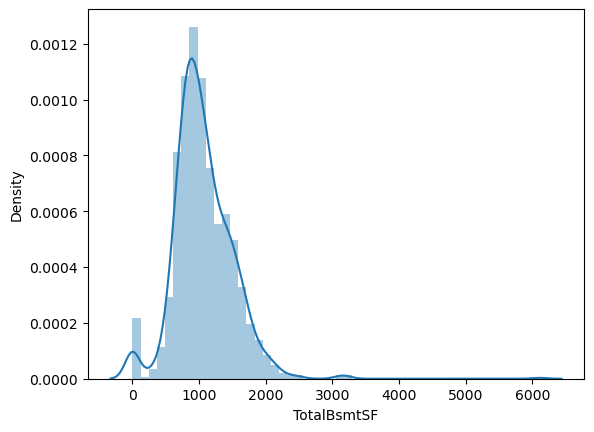

Skewness: 0.806232127721198
count    1168.000000
mean      340.278253
std       434.272050
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1872.000000
Name: 2ndFlrSF, dtype: float64


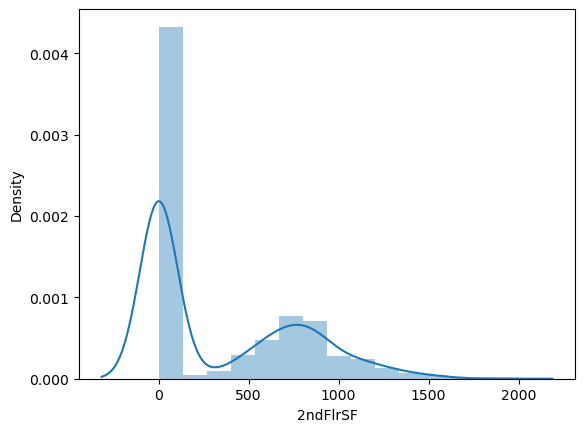

Skewness: 9.862965922072567
count    1168.000000
mean        5.094178
std        45.317916
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


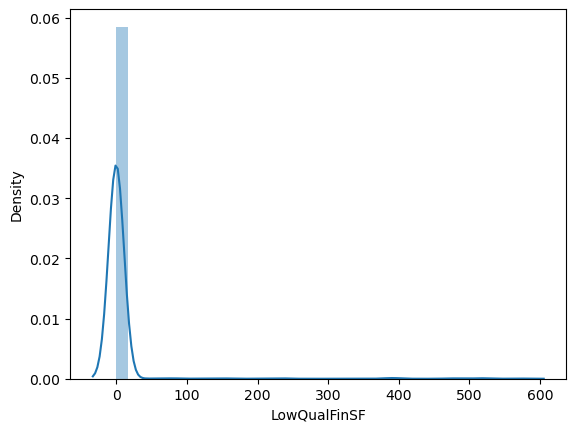

Skewness: 1.3530075939462674
count    1168.000000
mean     1521.626712
std       523.534530
min       334.000000
25%      1133.500000
50%      1470.000000
75%      1790.000000
max      5642.000000
Name: GrLivArea, dtype: float64


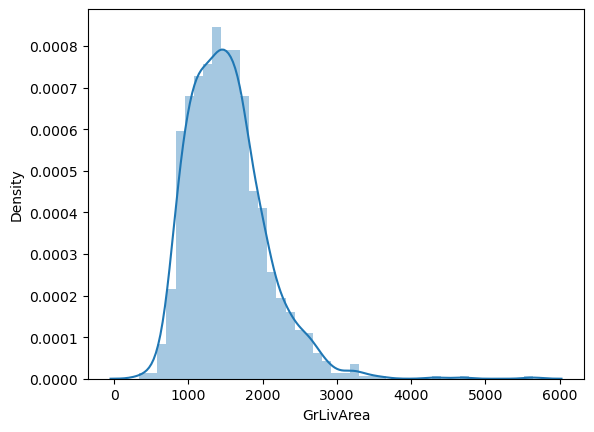

Skewness: 3.948206237084816
count    1168.000000
mean        1.048801
std         0.219484
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64


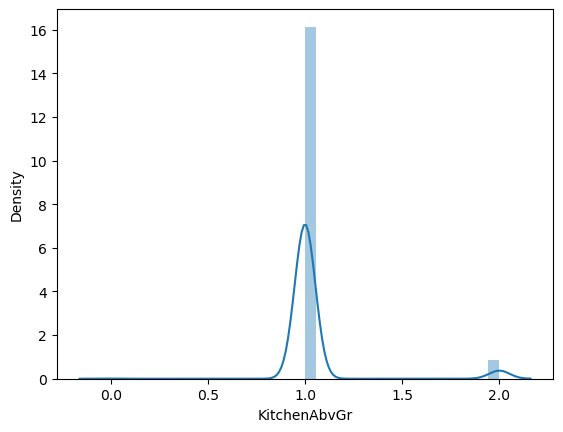

Skewness: 0.6423100558898825
count    1168.000000
mean        0.619863
std         0.648787
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


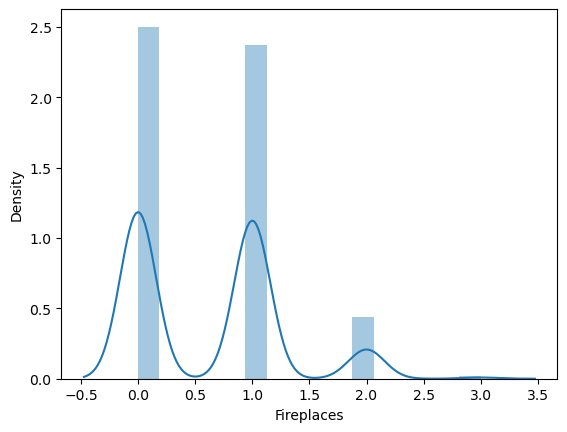

Skewness: -0.35994233040095913
count    1168.000000
mean        1.774829
std         0.734614
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


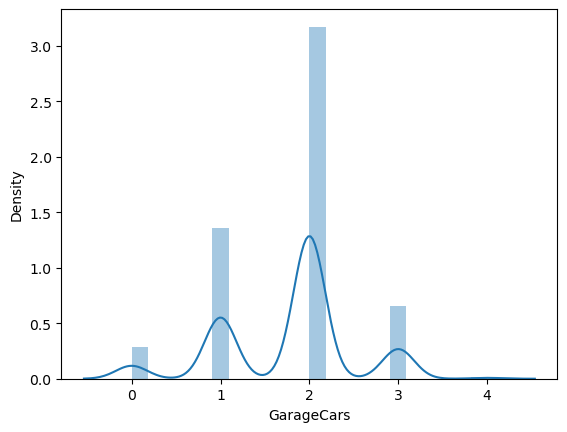

Skewness: 2.46507197601149
count    1168.000000
mean       47.315925
std        67.699475
min         0.000000
25%         0.000000
50%        27.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


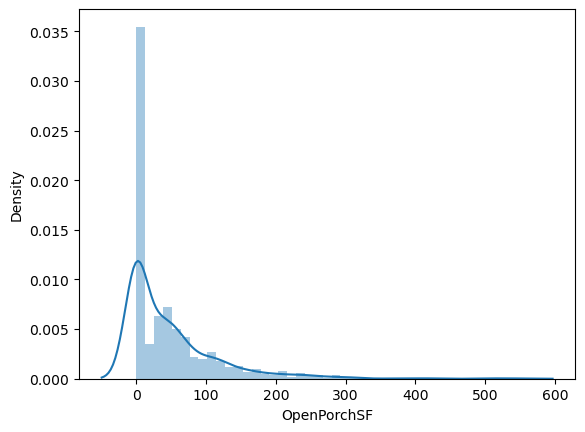

Skewness: 3.0866308039086525
count    1168.000000
mean       22.753425
std        62.710765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


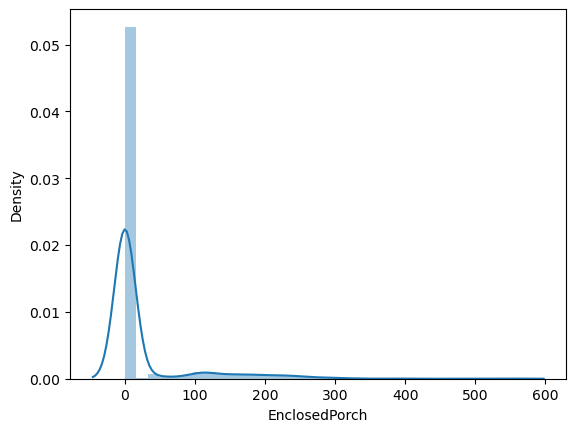

Skewness: 10.101922965649468
count    1168.000000
mean        3.654110
std        31.103419
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


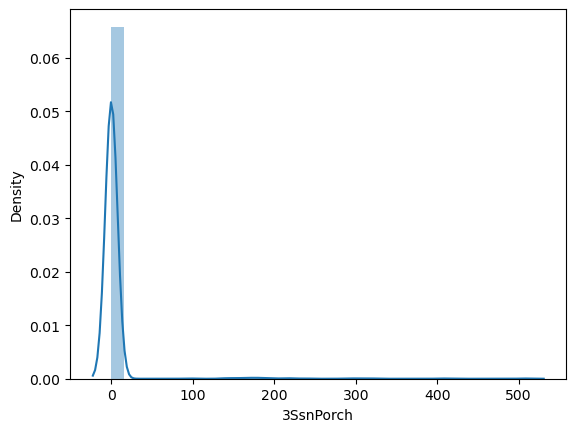

Skewness: 3.9867324637430057
count    1168.000000
mean       16.113870
std        57.769137
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


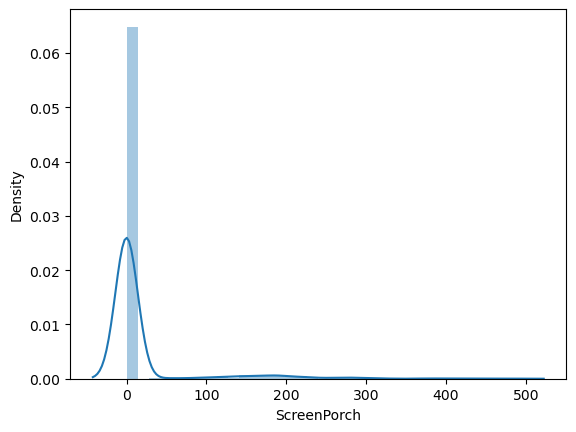

Skewness: 15.859557242801852
count    1168.000000
mean        2.418664
std        37.390139
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


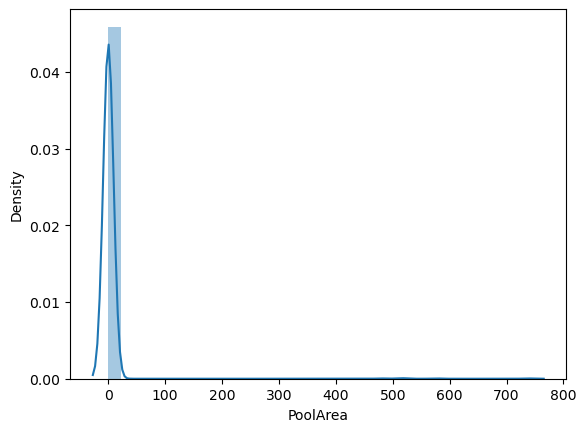

Skewness: 22.18328556234878
count     1168.000000
mean        49.948630
std        551.953605
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


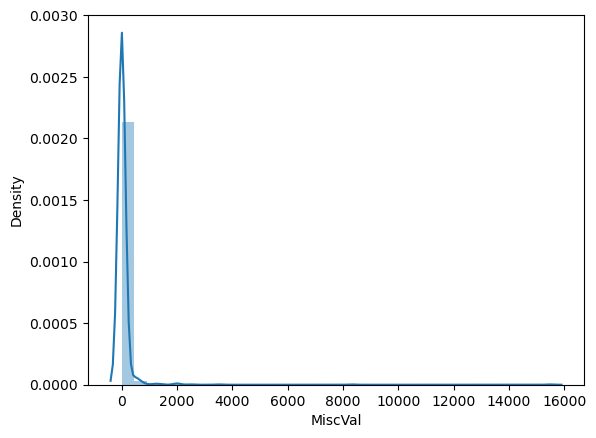

Skewness: 0.2681817027313006
count    1168.000000
mean        2.229024
std         0.787099
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Total_Bathrooms, dtype: float64


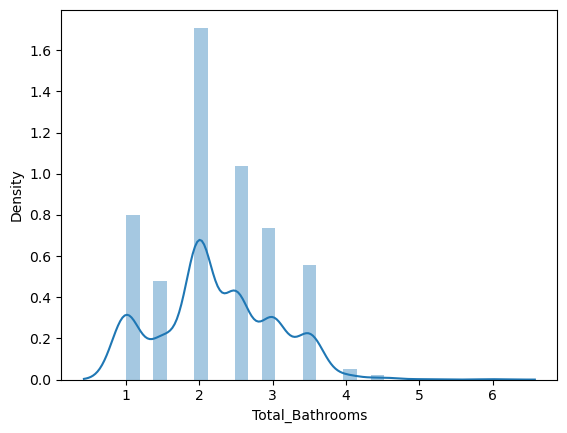

Skewness: 0.48308713843112117
count    1168.000000
mean        0.467038
std         0.516216
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


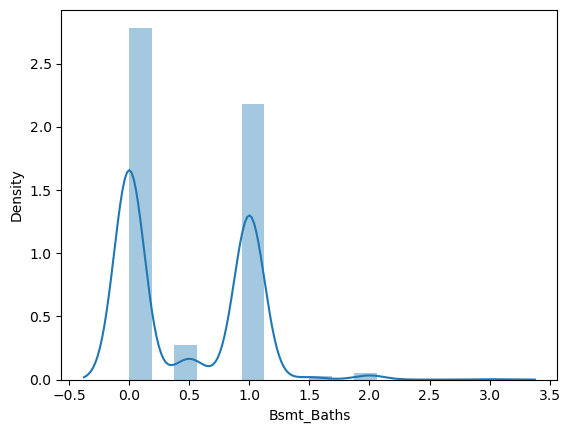

Skewness: 0.8826039337855185
count    1168.000000
mean      207.860065
std        37.665418
min       118.181818
25%       181.444444
50%       204.250842
75%       228.690972
max       434.000000
Name: AvgRoomSize, dtype: float64


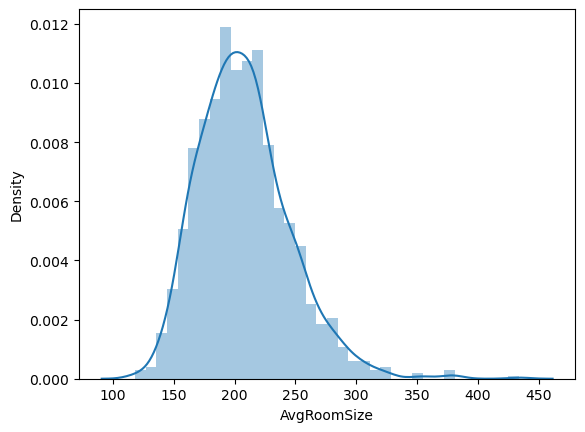

Skewness: 1.0247206533227886
count    1168.000000
mean      184.494007
std       156.100680
min         0.000000
25%        49.000000
50%       168.000000
75%       272.000000
max      1027.000000
Name: Total_porch_sf, dtype: float64


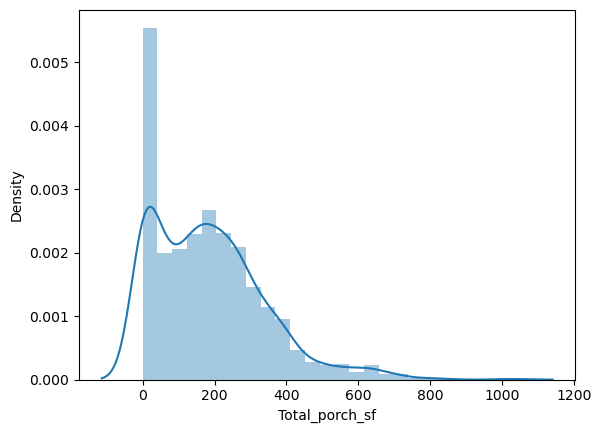

Skewness: 0.6288829982080021
count    1168.000000
mean       36.067637
std        30.325592
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


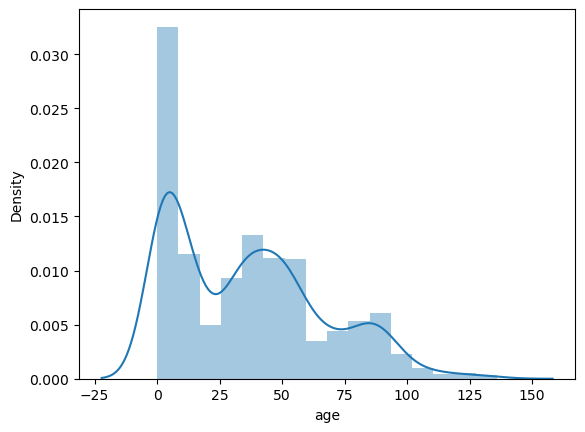

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Total_porch_sf']


In [15]:
skew_col=[]
skewness=[]
num_feat_difference = list(filter(lambda item: item not in highly_correlated, num_feat))
print(num_feat_difference)
for col in num_feat_difference:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    if(np.abs(training[col].skew())>=1):
        skew_col.append(col)
        skewness.append(training[col].skew())
    plt.show()
print(skew_col)

In [16]:
def transform_col(df):
    df['LotArea']=np.log(df['LotArea'])
    df['MasVnrArea']=np.log(df['MasVnrArea']+1)
    df['BsmtFinSF1']=np.log(df['BsmtFinSF1']+1)
    df['LowQualFinSF']=np.log(df['LowQualFinSF']+1)
    df['KitchenAbvGr']=np.log(df['KitchenAbvGr']+1)
    df['PoolArea']=np.log(df['PoolArea']+1)
    df['MiscVal']=np.log(df['MiscVal']+1)
    return df
training=transform_col(training)
validation=transform_col(validation)
test_data=transform_col(test_data)

Skewness: 2.4621383371024117
count    1168.000000
mean       70.329195
std        22.893417
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


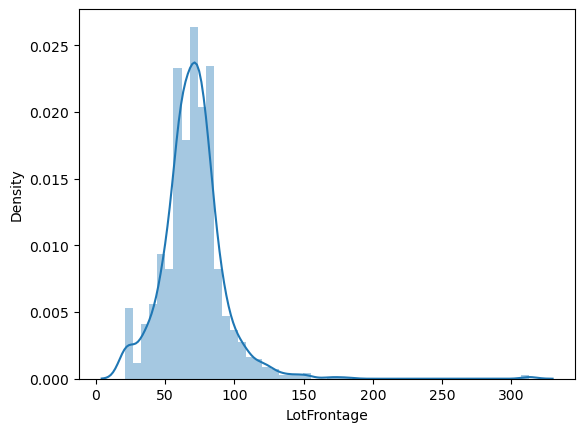

Skewness: -0.13563275776780281
count    1168.000000
mean        9.115130
std         0.514752
min         7.170120
25%         8.922658
50%         9.159205
75%         9.360633
max        12.279532
Name: LotArea, dtype: float64


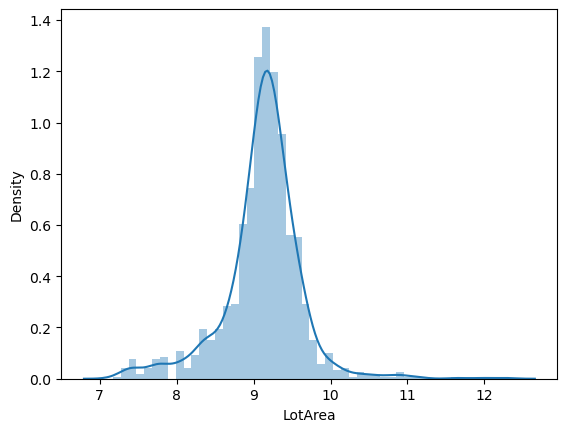

Skewness: 0.1913637507970349
count    1168.000000
mean        6.134418
std         1.369861
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


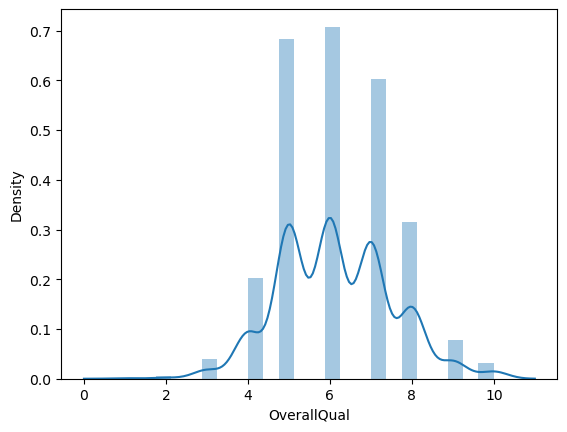

Skewness: 0.458511196909268
count    1168.000000
mean        2.173379
std         2.637964
min         0.000000
25%         0.000000
50%         0.000000
75%         5.141664
max         7.378384
Name: MasVnrArea, dtype: float64


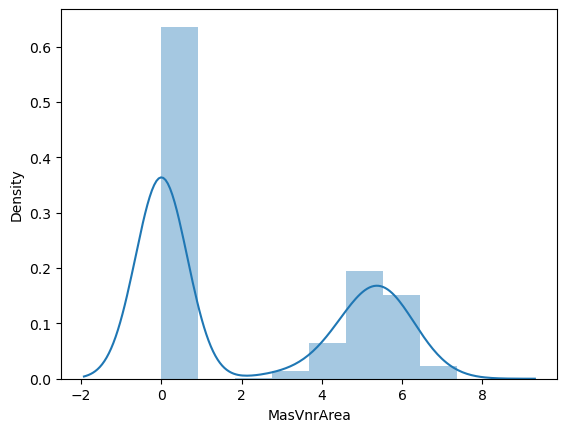

Skewness: -0.6358466823110941
count    1168.000000
mean        4.264079
std         2.991403
min         0.000000
25%         0.000000
50%         5.990213
75%         6.592700
max         8.638525
Name: BsmtFinSF1, dtype: float64


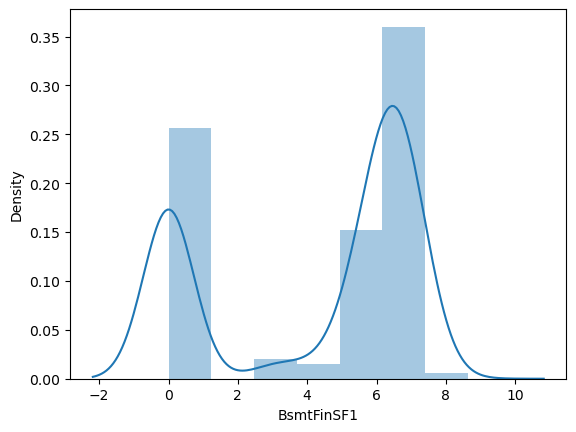

Skewness: 4.418298341491956
count    1168.000000
mean       44.667808
std       161.909961
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


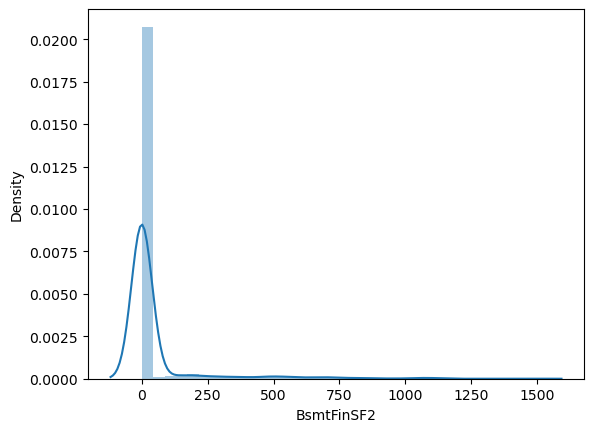

Skewness: 0.9156195058189517
count    1168.000000
mean      572.617295
std       448.642738
min         0.000000
25%       223.750000
50%       484.000000
75%       815.250000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


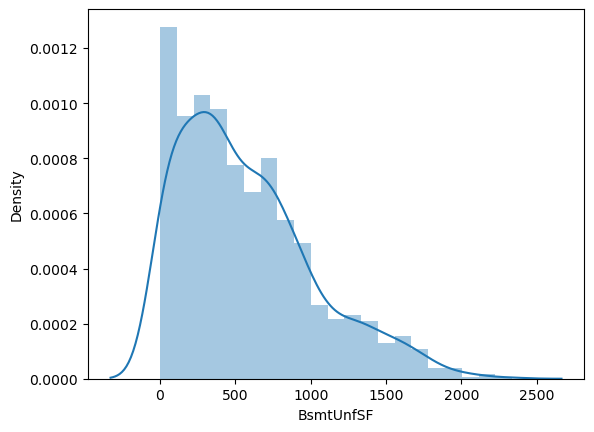

Skewness: 1.6796972409452224
count    1168.000000
mean     1070.021404
std       448.141915
min         0.000000
25%       804.000000
50%      1007.500000
75%      1314.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


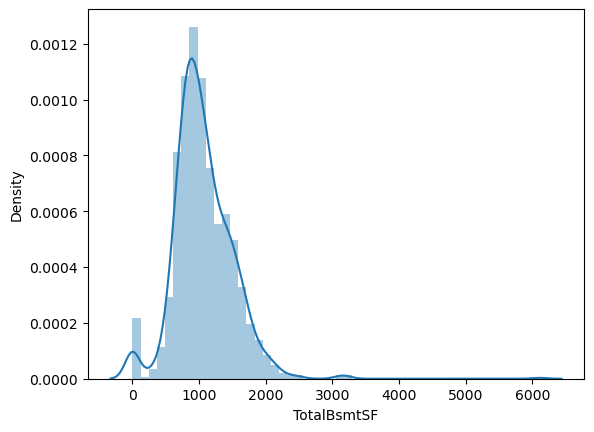

Skewness: 0.806232127721198
count    1168.000000
mean      340.278253
std       434.272050
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1872.000000
Name: 2ndFlrSF, dtype: float64


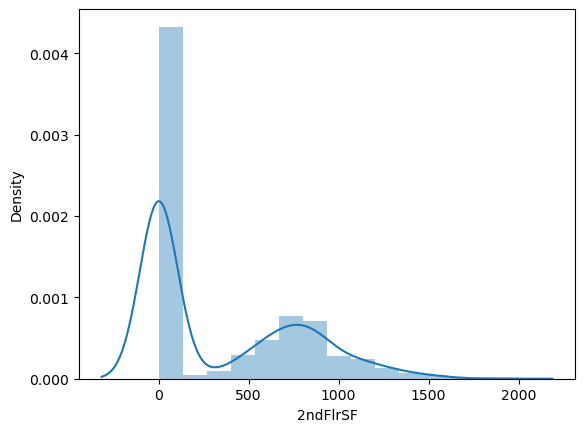

Skewness: 7.845332891150832
count    1168.000000
mean        0.090050
std         0.706612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.350886
Name: LowQualFinSF, dtype: float64


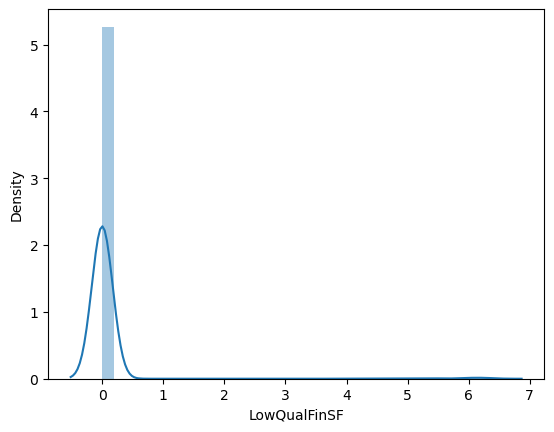

Skewness: 1.3530075939462674
count    1168.000000
mean     1521.626712
std       523.534530
min       334.000000
25%      1133.500000
50%      1470.000000
75%      1790.000000
max      5642.000000
Name: GrLivArea, dtype: float64


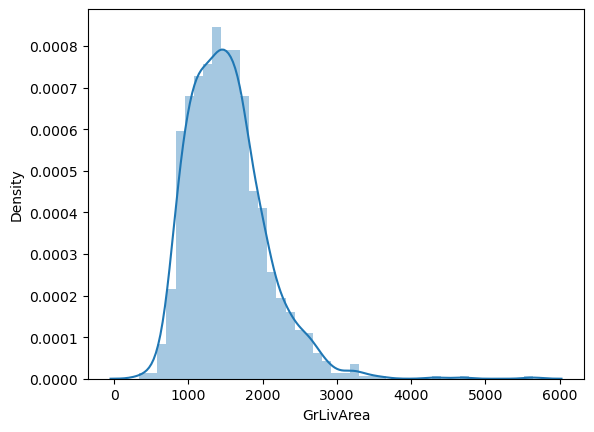

Skewness: 3.425556450985354
count    1168.000000
mean        0.712688
std         0.090556
min         0.000000
25%         0.693147
50%         0.693147
75%         0.693147
max         1.098612
Name: KitchenAbvGr, dtype: float64


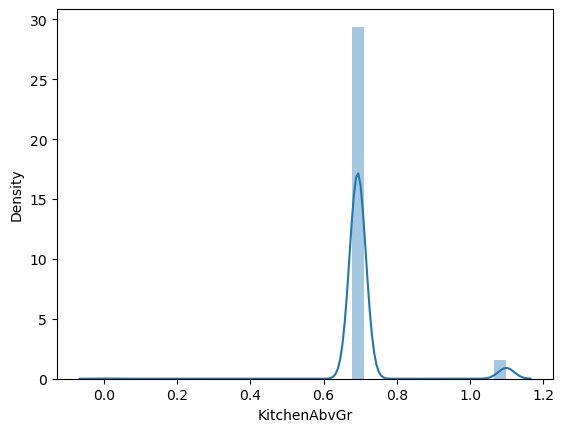

Skewness: 0.6423100558898825
count    1168.000000
mean        0.619863
std         0.648787
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


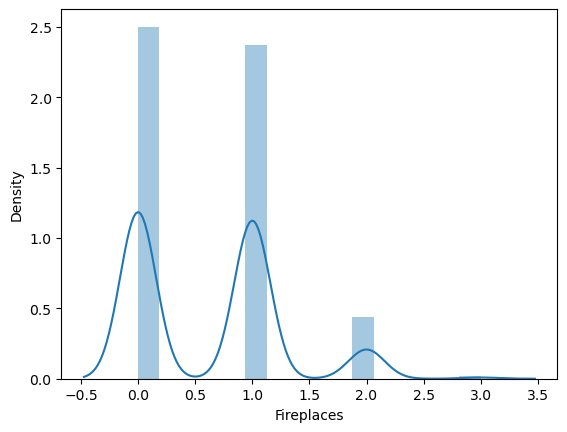

Skewness: -0.35994233040095913
count    1168.000000
mean        1.774829
std         0.734614
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


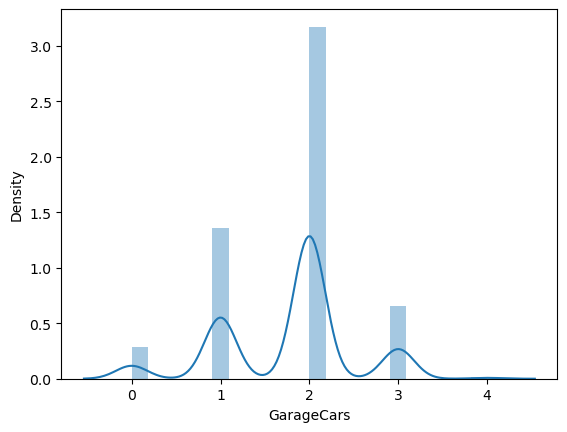

Skewness: 2.46507197601149
count    1168.000000
mean       47.315925
std        67.699475
min         0.000000
25%         0.000000
50%        27.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


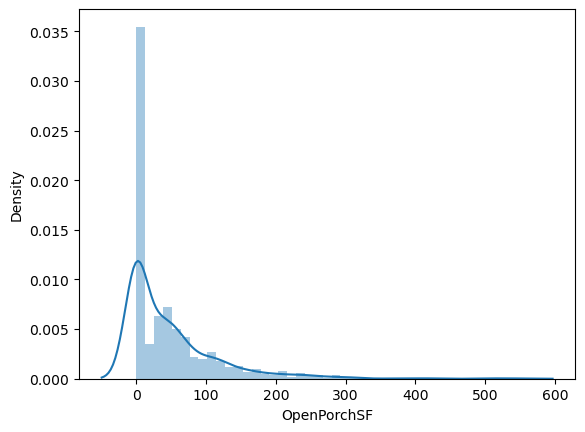

Skewness: 3.0866308039086525
count    1168.000000
mean       22.753425
std        62.710765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


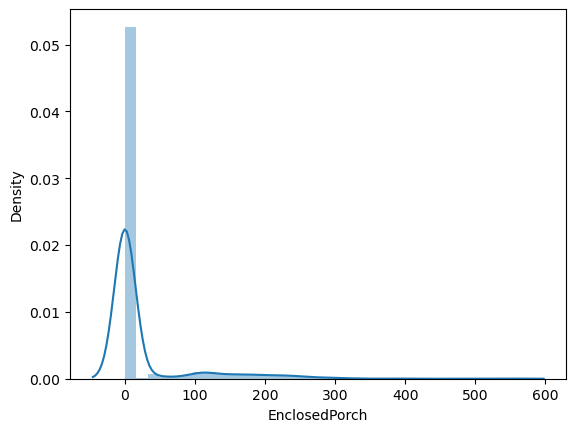

Skewness: 10.101922965649468
count    1168.000000
mean        3.654110
std        31.103419
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


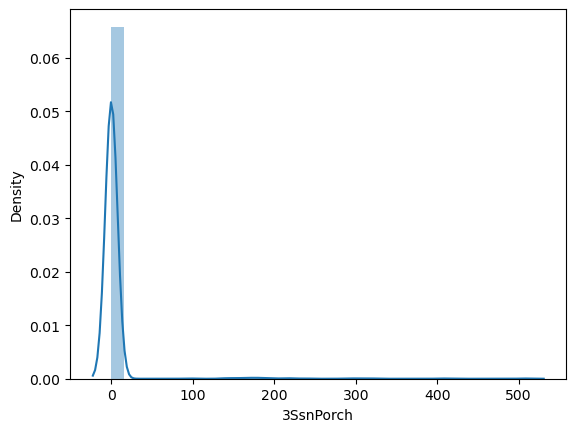

Skewness: 3.9867324637430057
count    1168.000000
mean       16.113870
std        57.769137
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


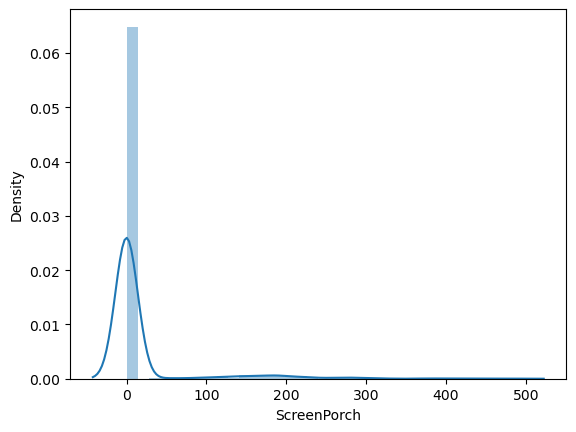

Skewness: 15.218565168800385
count    1168.000000
mean        0.027083
std         0.413346
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.605298
Name: PoolArea, dtype: float64


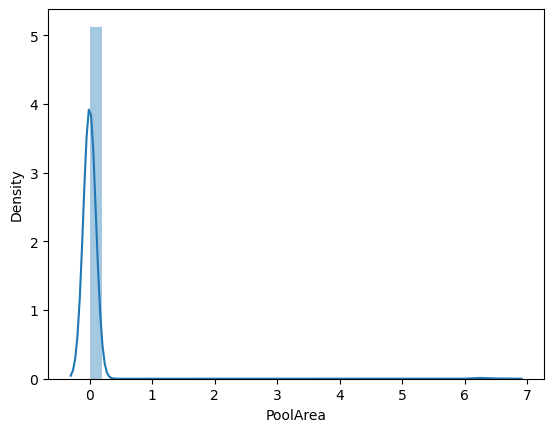

Skewness: 5.138571856583892
count    1168.000000
mean        0.240058
std         1.253662
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.648660
Name: MiscVal, dtype: float64


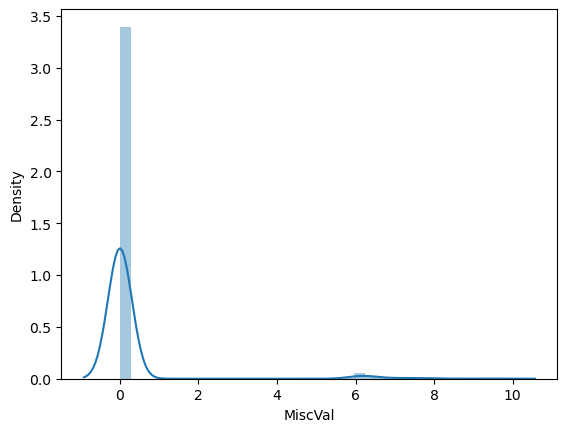

Skewness: 0.2681817027313006
count    1168.000000
mean        2.229024
std         0.787099
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Total_Bathrooms, dtype: float64


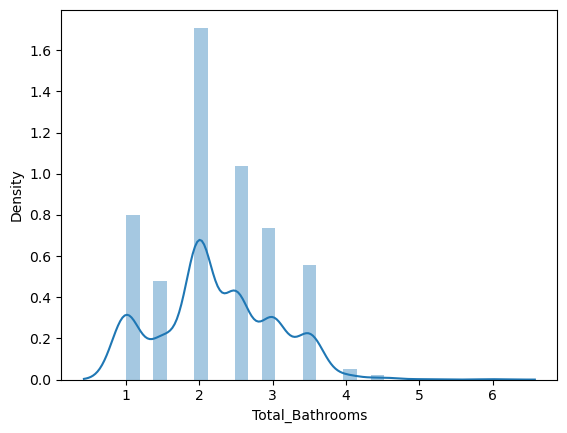

Skewness: 0.48308713843112117
count    1168.000000
mean        0.467038
std         0.516216
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt_Baths, dtype: float64


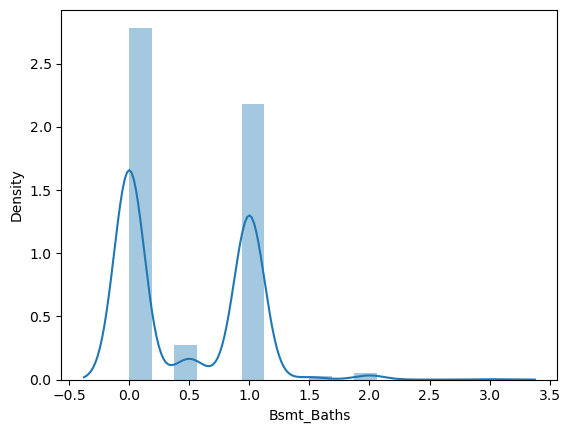

Skewness: 0.8826039337855185
count    1168.000000
mean      207.860065
std        37.665418
min       118.181818
25%       181.444444
50%       204.250842
75%       228.690972
max       434.000000
Name: AvgRoomSize, dtype: float64


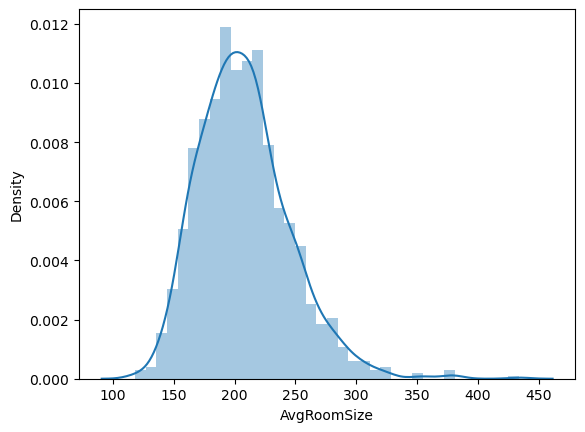

Skewness: 1.0247206533227886
count    1168.000000
mean      184.494007
std       156.100680
min         0.000000
25%        49.000000
50%       168.000000
75%       272.000000
max      1027.000000
Name: Total_porch_sf, dtype: float64


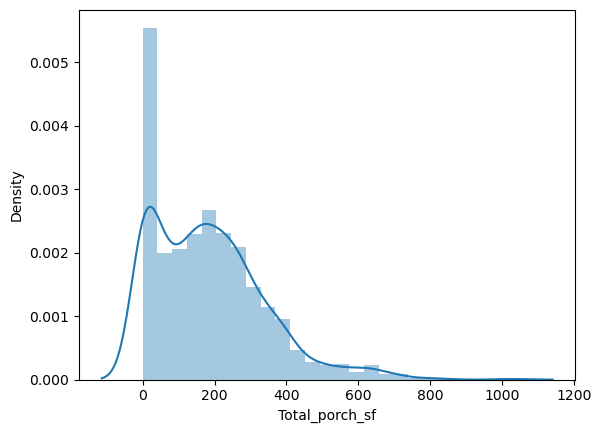

Skewness: 0.6288829982080021
count    1168.000000
mean       36.067637
std        30.325592
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64


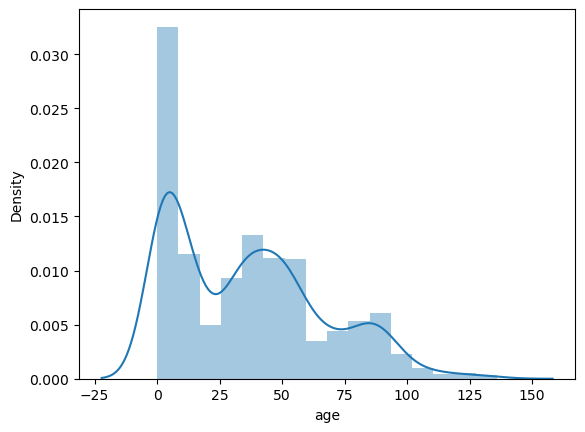

In [17]:
for col in num_feat_difference:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [18]:
def get_outliers(df, num_feat):
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    for col in num_feat:      
        lower = df[col].mean() - df[col].std() * 3
        upper = df[col].mean() + df[col].std() * 3
#         lower=np.percentile(df[col],25)-(1.5*iqr(df[col]))
#         upper=np.percentile(df[col],75)+(1.5*iqr(df[col]))
        upper_outliers = df[df[col] > upper]
        lower_outliers = df[df[col] < lower]
        total=lower_outliers.shape[0]+upper_outliers.shape[0]
        if (total!=0) and (upper!=0 and lower!=0):
            new_row_df = pd.DataFrame([{'Feature':col, 'Total Outliers': total,'Upper limit': upper, 'Lower limit':lower}])
            outlier_df = pd.concat([outlier_df, new_row_df], ignore_index=True)#outlier_df.append({'Feature':col, 'Total Outliers': total,'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
    return outlier_df
def remove_outliers(df, outlier_df, num_feat):
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        df[col] = np.where((df[col]<lower)|(df[col]>upper), df[col].median(), df[col])
    return df
outlier_df = get_outliers(training, num_feat_difference)
outlier_df

Feature Total Outliers  Upper limit  Lower limit
0       LotFrontage             12   139.009447     1.648944
1           LotArea             28    10.659386     7.570875
2       OverallQual              3    10.243999     2.024836
3        BsmtFinSF2             42   530.397692  -441.062076
4         BsmtUnfSF              7  1918.545510  -773.310921
5       TotalBsmtSF              7  2414.447149  -274.404341
6          2ndFlrSF              1  1643.094402  -962.537895
7      LowQualFinSF             19     2.209886    -2.029786
8         GrLivArea             12  3092.230301   -48.976877
9      KitchenAbvGr             59     0.984355     0.441021
10       Fireplaces              4     2.566224    -1.326498
11       GarageCars              4     3.978670    -0.429012
12      OpenPorchSF             22   250.414349  -155.782499
13    EnclosedPorch             41   210.885721  -165.378871
14        3SsnPorch             18    96.964367   -89.656147
15      ScreenPorch             42   189.421282  -157.193542
16         PoolArea              5     1.267123    -1.212956
17          MiscVal             42     4.001044    -3.520929
18  Total_Bathrooms              2     4.590322    -0.132274
19       Bsmt_Baths              1     2.015686    -1.081610
20      AvgRoomSize              9   320.856319    94.863812
21   Total_porch_sf             14   652.796048  -283.808034
22              age              3   127.044413   -54.909139

Skewness: 0.08144948880498239
count    1168.000000
mean       69.182791
std        18.931352
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       137.000000
Name: LotFrontage, dtype: float64


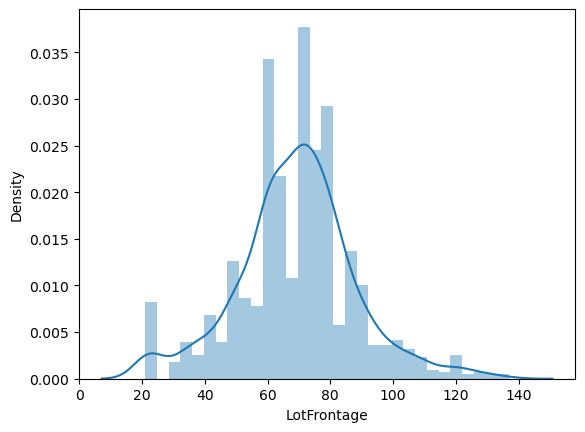

Skewness: -0.6516407971004206
count    1168.000000
mean        9.121579
std         0.422239
min         7.587817
25%         8.948488
50%         9.159205
75%         9.348666
max        10.598982
Name: LotArea, dtype: float64


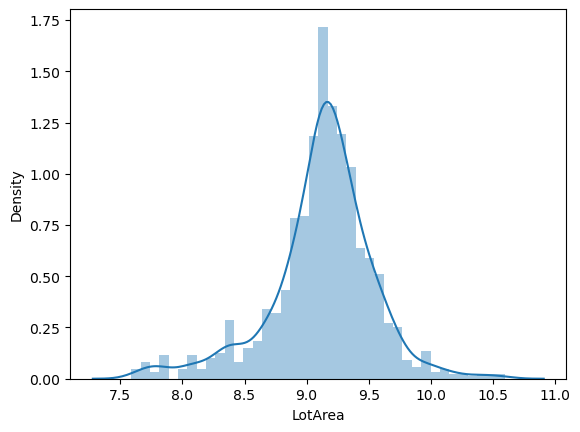

Skewness: 0.27120150293720896
count    1168.000000
mean        6.145548
std         1.350761
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


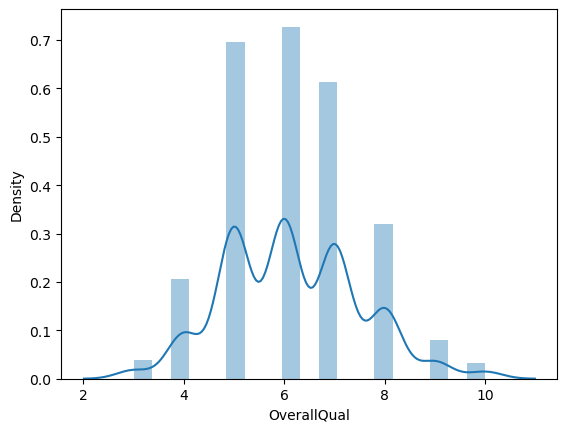

Skewness: 0.458511196909268
count    1168.000000
mean        2.173379
std         2.637964
min         0.000000
25%         0.000000
50%         0.000000
75%         5.141664
max         7.378384
Name: MasVnrArea, dtype: float64


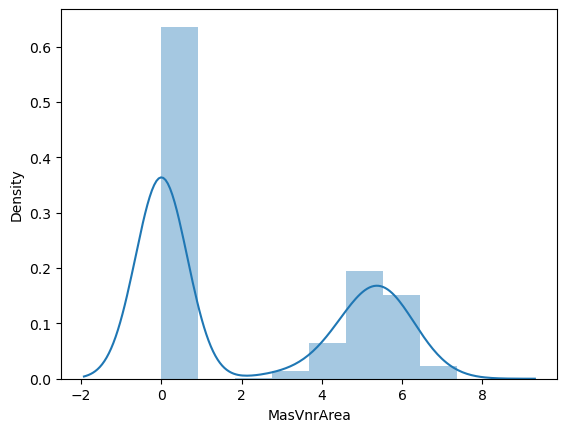

Skewness: -0.6358466823110941
count    1168.000000
mean        4.264079
std         2.991403
min         0.000000
25%         0.000000
50%         5.990213
75%         6.592700
max         8.638525
Name: BsmtFinSF1, dtype: float64


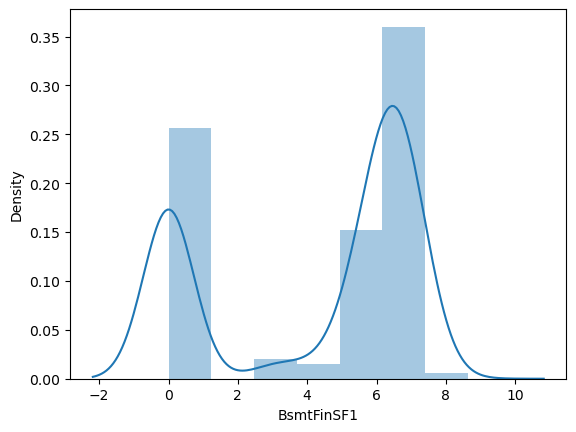

Skewness: 4.735124395705343
count    1168.000000
mean       17.203767
std        72.553414
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       506.000000
Name: BsmtFinSF2, dtype: float64


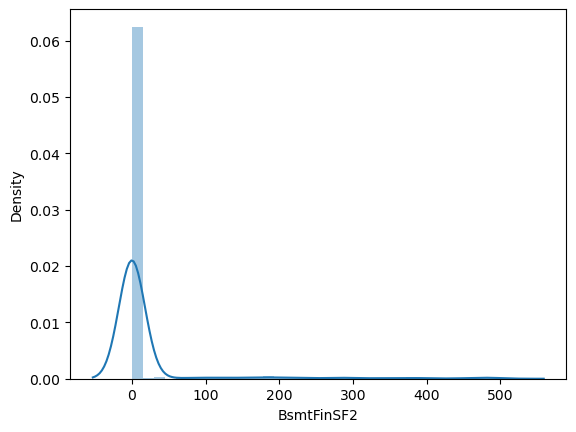

Skewness: 0.8255574431939775
count    1168.000000
mean      563.050514
std       433.017758
min         0.000000
25%       223.750000
50%       484.000000
75%       810.250000
max      1907.000000
Name: BsmtUnfSF, dtype: float64


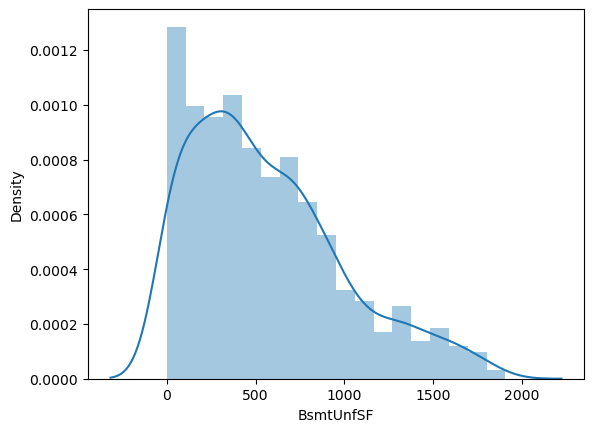

Skewness: 0.1856135746043141
count    1168.000000
mean     1055.754709
std       400.603784
min         0.000000
25%       804.000000
50%      1007.250000
75%      1306.750000
max      2392.000000
Name: TotalBsmtSF, dtype: float64


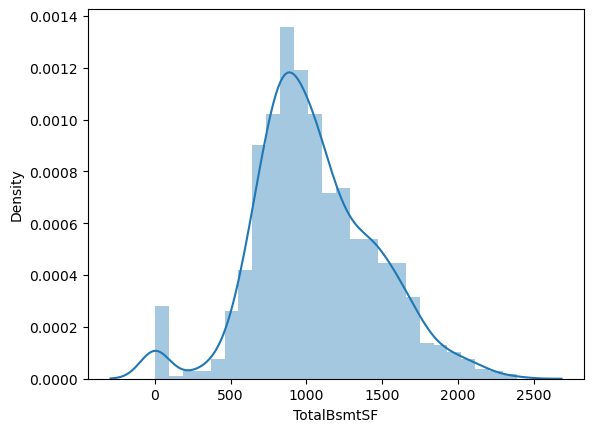

Skewness: 0.7911453788979138
count    1168.000000
mean      338.675514
std       432.062995
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1611.000000
Name: 2ndFlrSF, dtype: float64


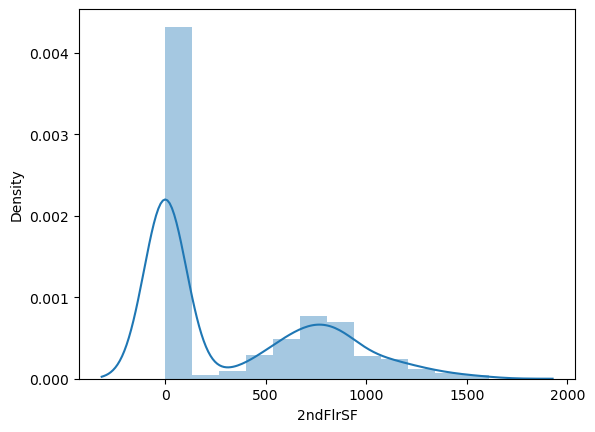

Skewness: 0
count    1168.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: LowQualFinSF, dtype: float64


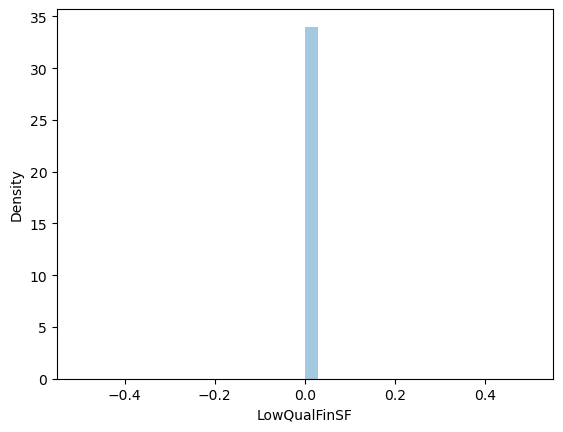

Skewness: 0.5748277107526483
count    1168.000000
mean     1498.752568
std       468.194049
min       334.000000
25%      1133.500000
50%      1470.000000
75%      1774.000000
max      3082.000000
Name: GrLivArea, dtype: float64


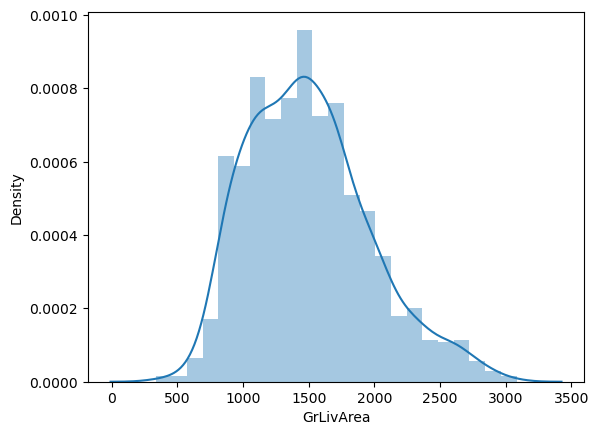

Skewness: 0
count    1.168000e+03
mean     6.931472e-01
std      1.910402e-14
min      6.931472e-01
25%      6.931472e-01
50%      6.931472e-01
75%      6.931472e-01
max      6.931472e-01
Name: KitchenAbvGr, dtype: float64


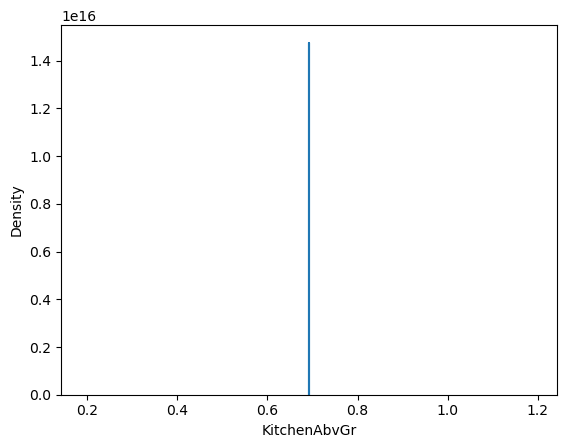

Skewness: 0.5398519102501557
count    1168.000000
mean        0.613014
std         0.634000
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Fireplaces, dtype: float64


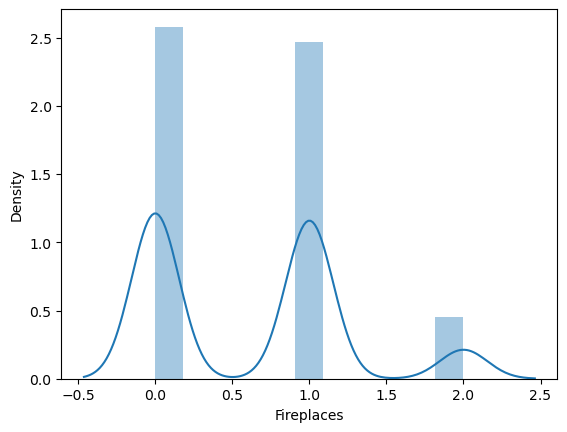

Skewness: -0.44897591188192215
count    1168.000000
mean        1.767979
std         0.723058
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: GarageCars, dtype: float64


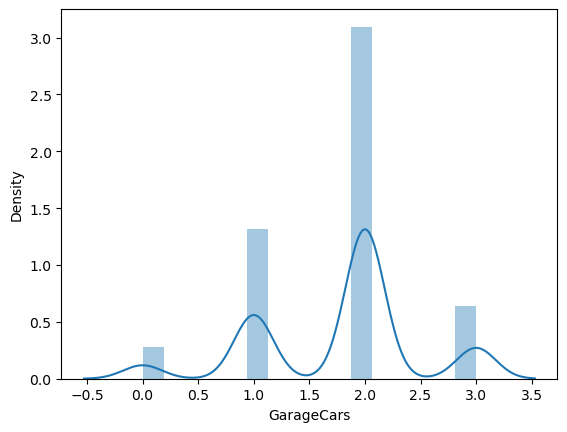

Skewness: 1.543176227023086
count    1168.000000
mean       41.584760
std        53.775276
min         0.000000
25%         0.000000
50%        27.000000
75%        63.000000
max       250.000000
Name: OpenPorchSF, dtype: float64


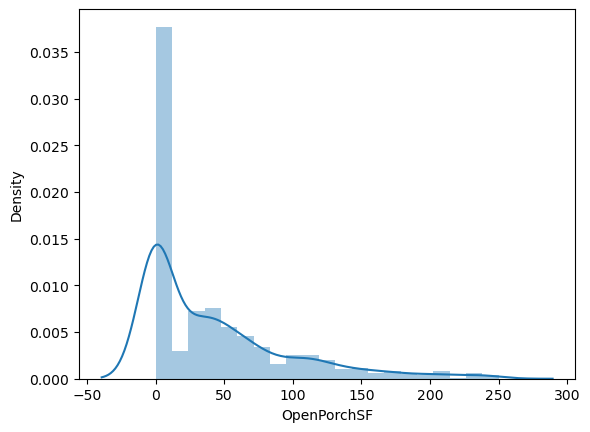

Skewness: 3.085266674428896
count    1168.000000
mean       13.609589
std        41.958052
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       210.000000
Name: EnclosedPorch, dtype: float64


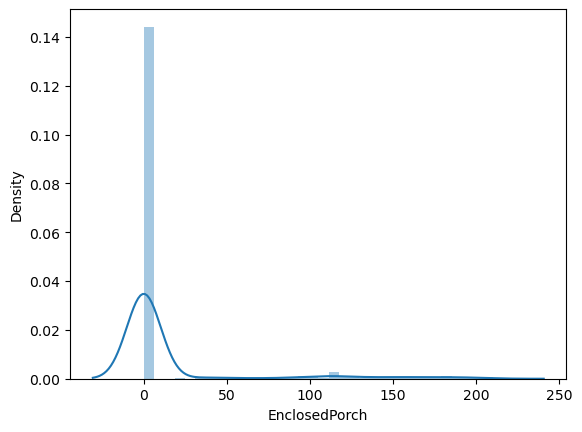

Skewness: 34.17601498127006
count    1168.000000
mean        0.082192
std         2.808988
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        96.000000
Name: 3SsnPorch, dtype: float64


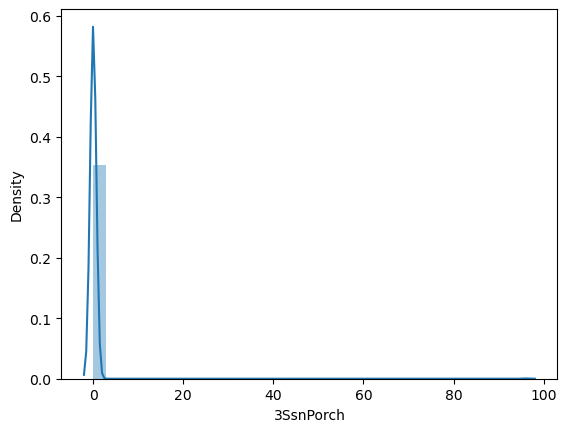

Skewness: 4.591211575355886
count    1168.000000
mean        6.841610
std        31.329737
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       189.000000
Name: ScreenPorch, dtype: float64


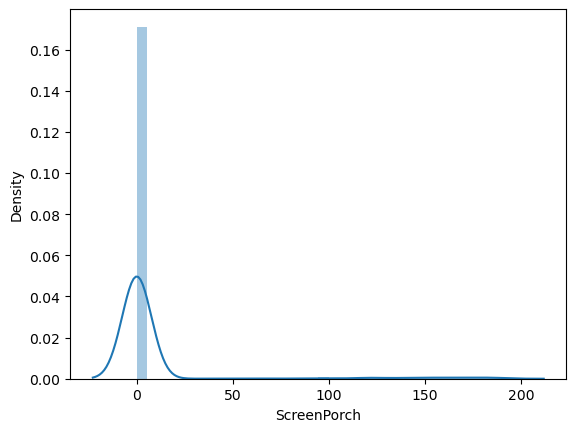

Skewness: 0
count    1168.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64


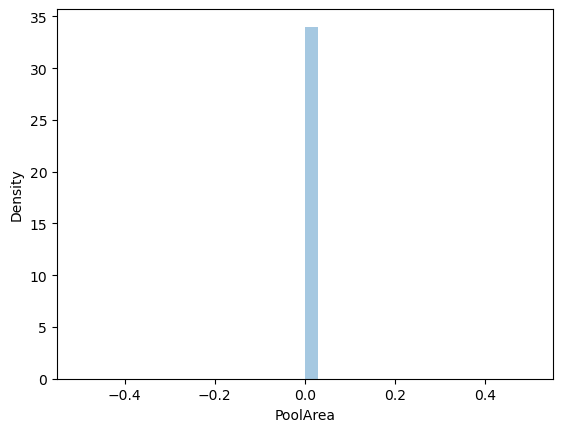

Skewness: 0
count    1168.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: MiscVal, dtype: float64


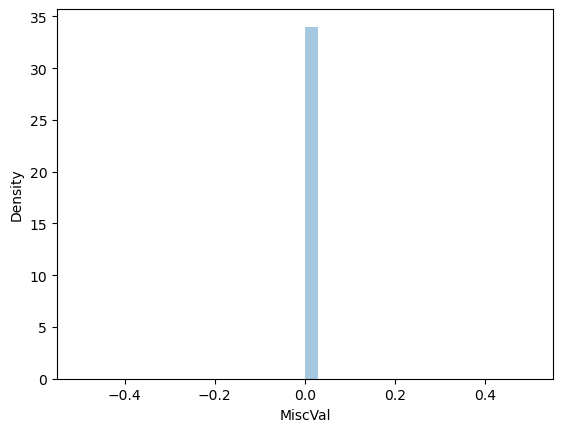

Skewness: 0.1659442720116496
count    1168.000000
mean        2.223031
std         0.775122
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.500000
Name: Total_Bathrooms, dtype: float64


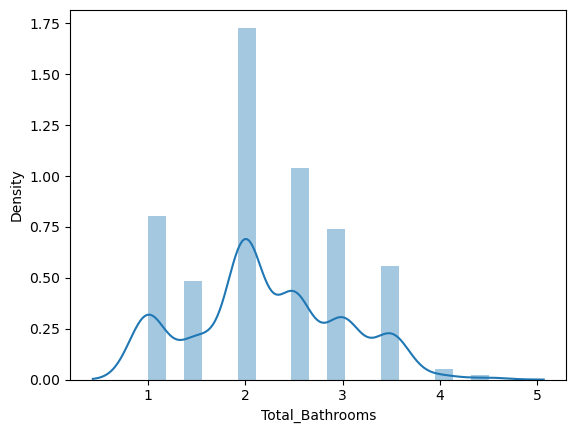

Skewness: 0.4078457576579484
count    1168.000000
mean        0.464469
std         0.511040
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Bsmt_Baths, dtype: float64


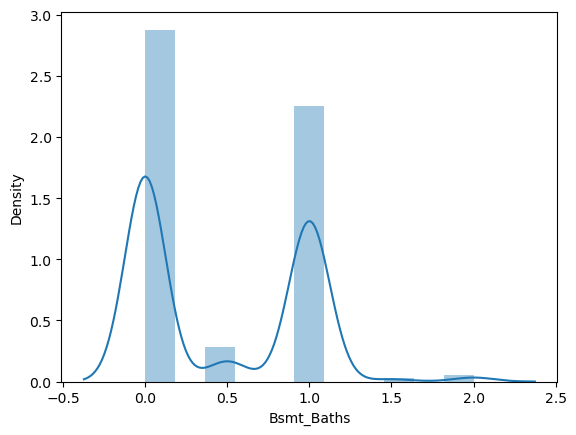

Skewness: 0.4494554391585973
count    1168.000000
mean      206.647553
std        35.018092
min       118.181818
25%       181.444444
50%       204.246633
75%       227.722356
max       320.000000
Name: AvgRoomSize, dtype: float64


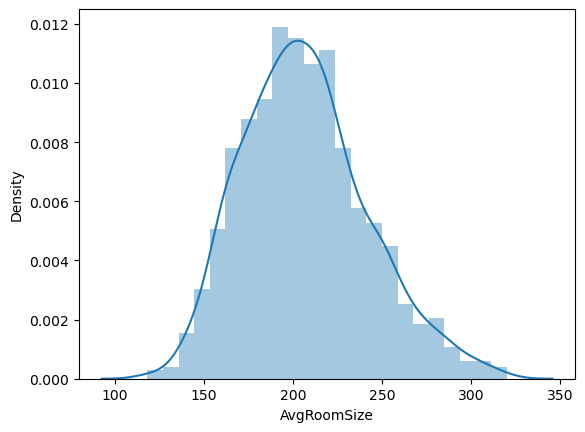

Skewness: 0.7195589790566962
count    1168.000000
mean      177.713185
std       143.518884
min         0.000000
25%        49.000000
50%       168.000000
75%       265.250000
max       645.000000
Name: Total_porch_sf, dtype: float64


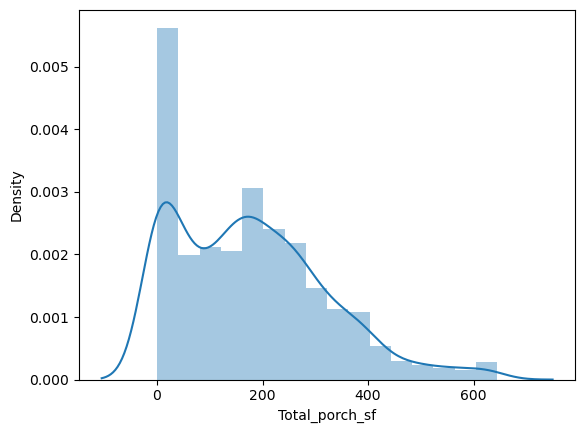

Skewness: 0.5916625138743128
count    1168.000000
mean       35.812500
std        29.920602
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       127.000000
Name: age, dtype: float64


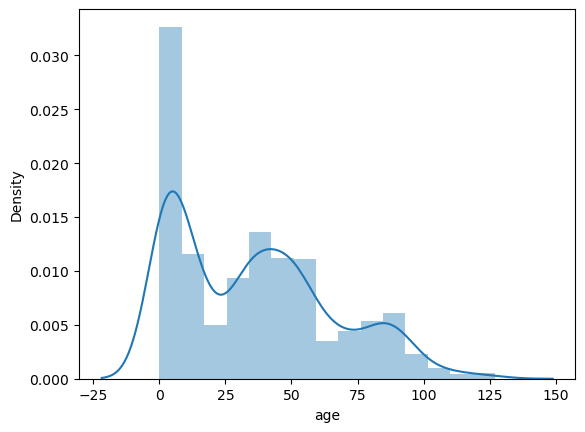

In [19]:
training=remove_outliers(training,outlier_df,num_feat_difference)
for col in num_feat_difference:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
def encode_data(train,valid,test):
    #Handle the oridnal variable by encoding them to numerical values
    data= pd.concat([train,valid,test], axis=0)
    for col in data.select_dtypes('object').columns:
        if col in od:
            le=LabelEncoder()
            data[col]=le.fit_transform(data[col])
        else:
            continue
    new_train=data.loc[train.index,]
    new_valid=data.loc[valid.index,]
    new_test=data.loc[test.index,]
    return new_train,new_valid,new_test.drop('SalePrice',axis=1)
training,validation,test_data=encode_data(training,validation,test_data)

Skewness: -1.714828488296253
count    1168.000000
mean        3.036815
std         0.613625
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: MSZoning, dtype: float64


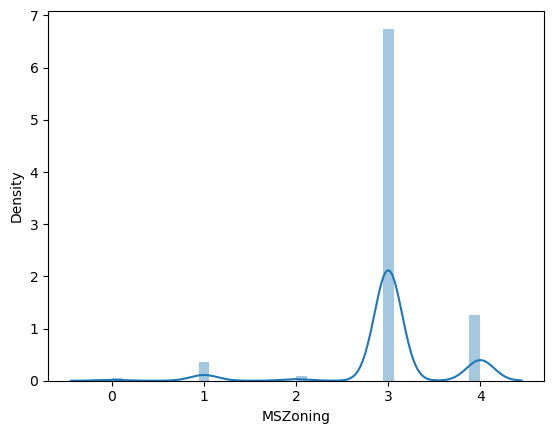

Skewness: -0.5563886645347321
count    1168.000000
mean        1.907534
std         1.419660
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LotShape, dtype: float64


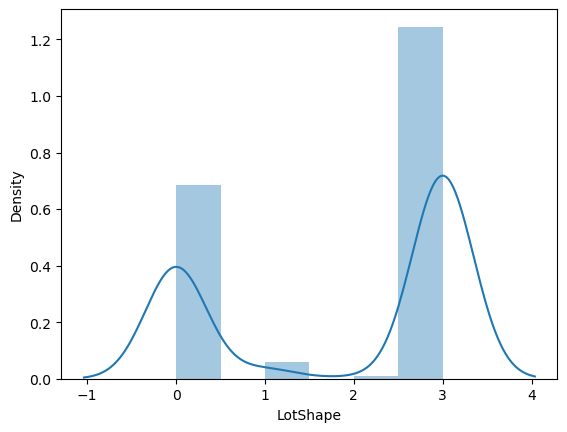

Skewness: -3.200784939445386
count    1168.000000
mean        2.779110
std         0.710438
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: LandContour, dtype: float64


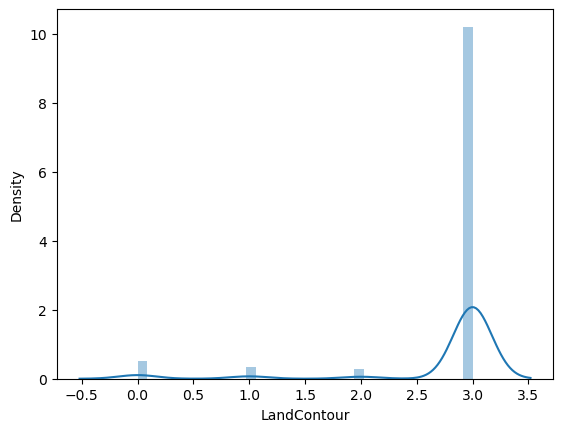

Skewness: 4.967502227322793
count    1168.000000
mean        0.056507
std         0.258979
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: LandSlope, dtype: float64


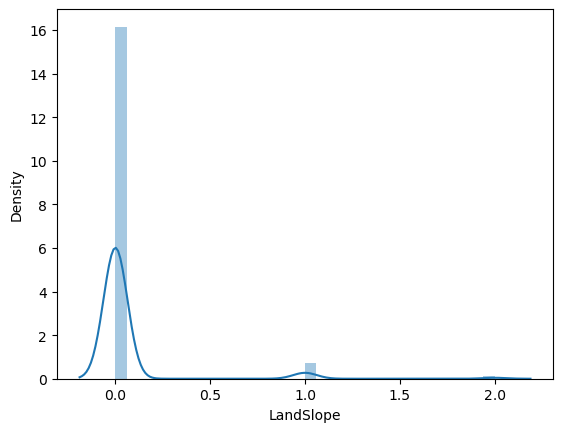

Skewness: 0.7687460244467823
count    1168.000000
mean        4.596747
std         1.111237
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: OverallCond, dtype: float64


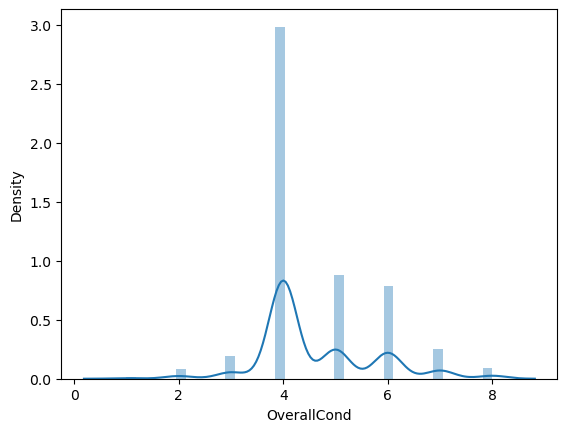

Skewness: -1.7943972988525658
count    1168.000000
mean        2.528253
std         0.692144
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: ExterQual, dtype: float64


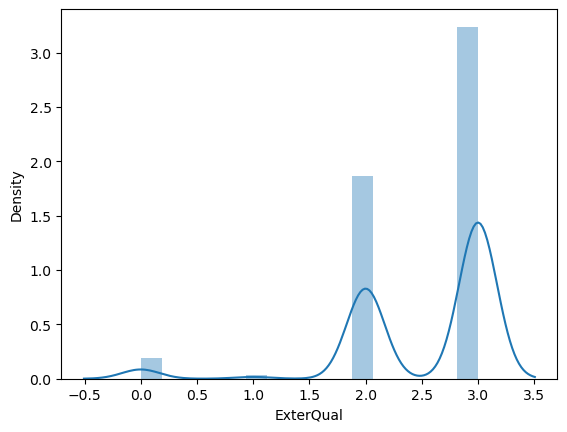

Skewness: -2.576726205792078
count    1168.000000
mean        3.738014
std         0.720511
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ExterCond, dtype: float64


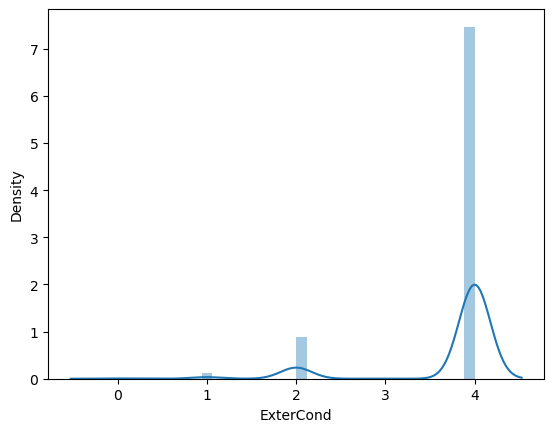

Skewness: -0.46118934909067105
count    1168.000000
mean        2.714041
std         1.261278
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64


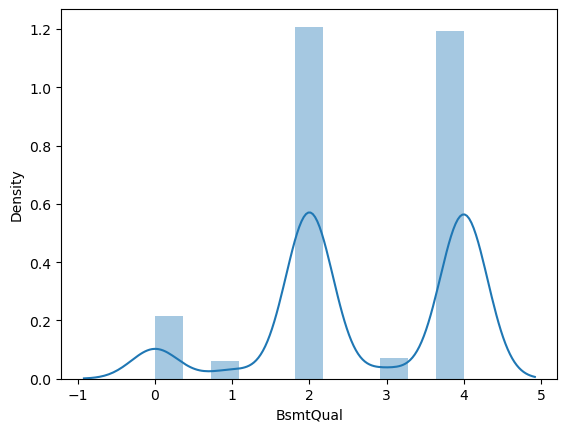

Skewness: -2.920417352686143
count    1168.000000
mean        3.689212
std         0.950436
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtCond, dtype: float64


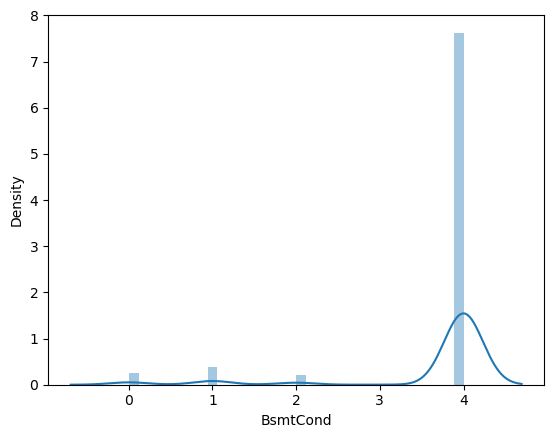

Skewness: -0.917775284804224
count    1168.000000
mean        2.889555
std         1.587427
min         0.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: BsmtExposure, dtype: float64


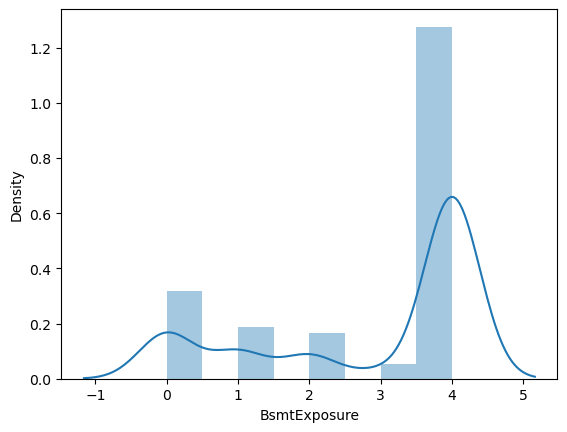

Skewness: 0.13717722075581987
count    1168.000000
mean        3.123288
std         2.243193
min         0.000000
25%         1.750000
50%         2.000000
75%         6.000000
max         6.000000
Name: BsmtFinType1, dtype: float64


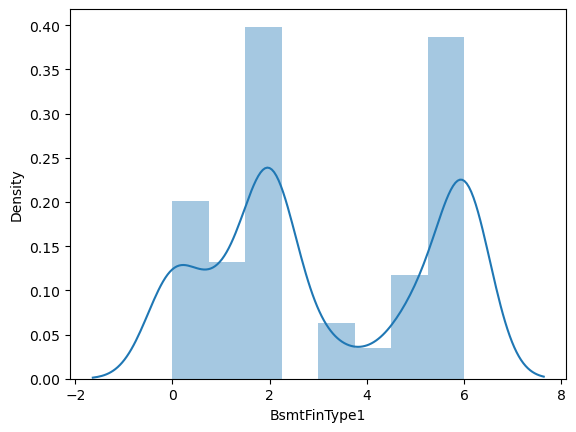

Skewness: -3.406034764598996
count    1168.000000
mean        5.621575
std         1.152002
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: BsmtFinType2, dtype: float64


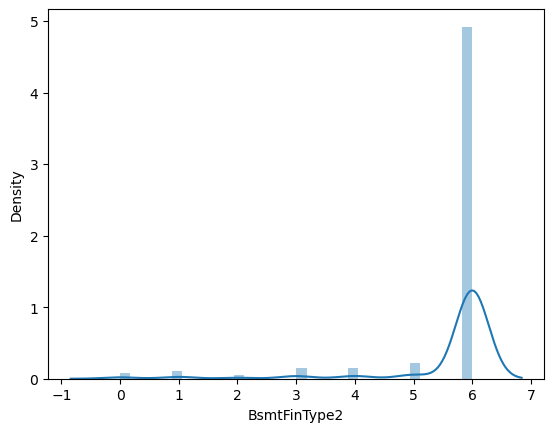

Skewness: 0.5032785107486933
count    1168.000000
mean        1.520548
std         1.747935
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         4.000000
Name: HeatingQC, dtype: float64


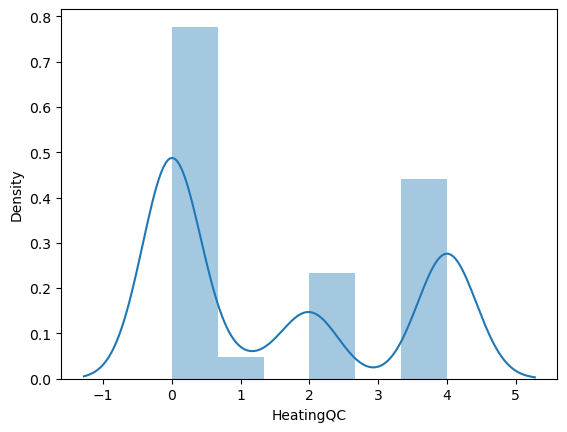

Skewness: -3.5894999356682447
count    1168.000000
mean        0.936644
std         0.243707
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CentralAir, dtype: float64


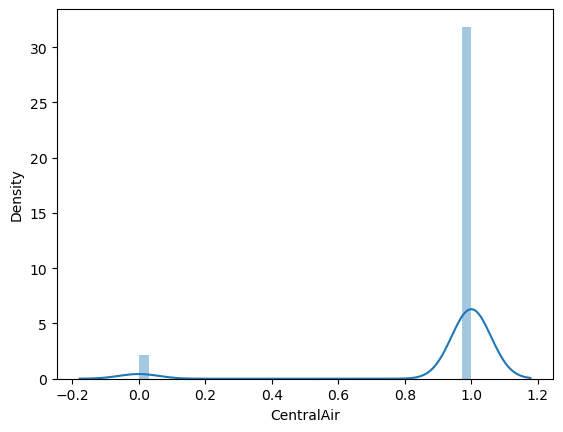

Skewness: -3.142322884773936
count    1168.000000
mean        3.693493
std         1.036717
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Electrical, dtype: float64


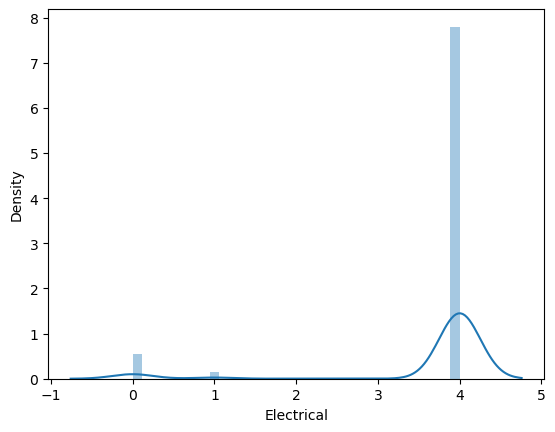

Skewness: -1.4146002728319769
count    1168.000000
mean        2.329623
std         0.826974
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: KitchenQual, dtype: float64


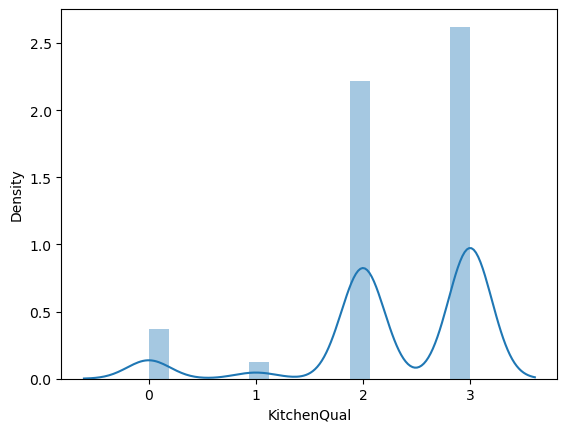

Skewness: -4.2213432339884704
count    1168.000000
mean        5.769692
std         0.926172
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: Functional, dtype: float64


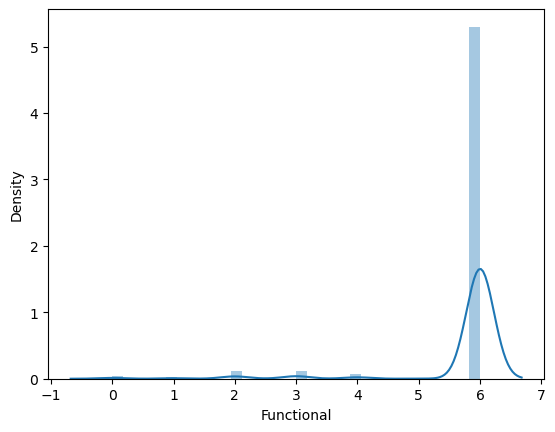

Skewness: 0.3108849260310347
count    1168.000000
mean        3.071918
std         1.169433
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FireplaceQu, dtype: float64


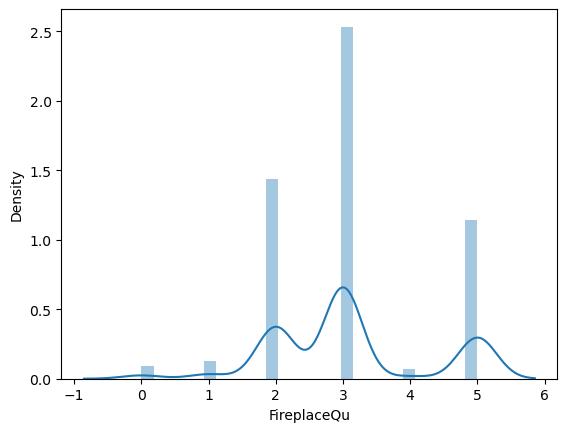

Skewness: 0.7216525664978033
count    1168.000000
mean        2.412671
std         1.909946
min         0.000000
25%         1.000000
50%         1.000000
75%         5.000000
max         6.000000
Name: GarageType, dtype: float64


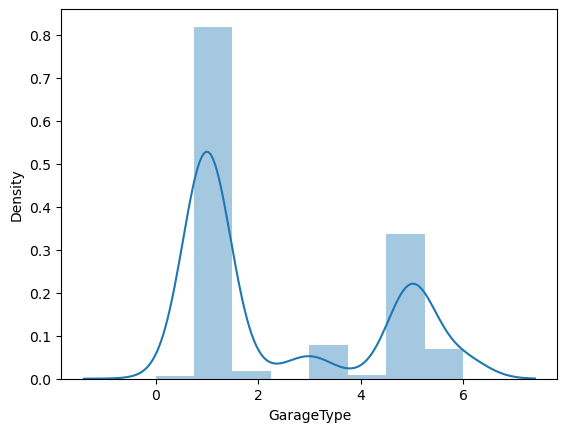

Skewness: -0.6077651864958665
count    1168.000000
mean        1.862158
std         1.186473
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


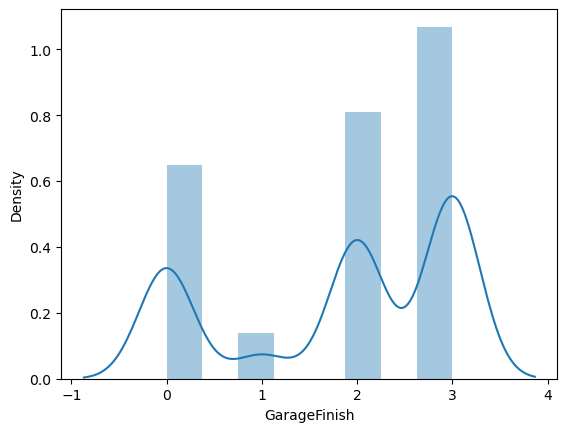

Skewness: -3.2317075777098654
count    1168.000000
mean        4.714041
std         0.906271
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageQual, dtype: float64


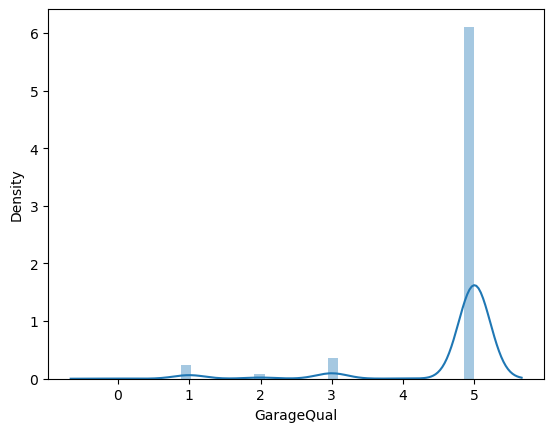

Skewness: -3.602124188093736
count    1168.000000
mean        4.767123
std         0.796661
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: GarageCond, dtype: float64


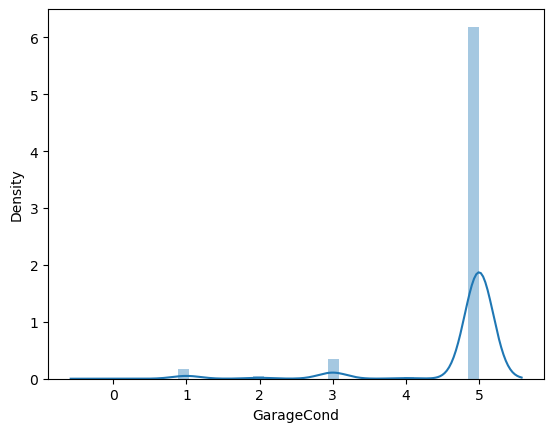

Skewness: -3.32135623442043
count    1168.000000
mean        1.857021
std         0.494288
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: PavedDrive, dtype: float64


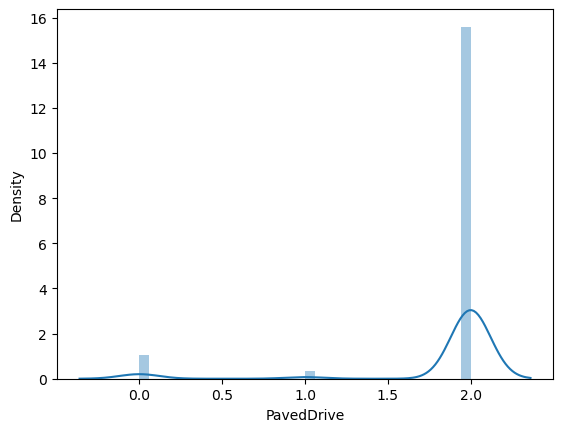

Skewness: -20.24664309046864
count    1168.000000
mean        2.993151
std         0.116891
min         0.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PoolQC, dtype: float64


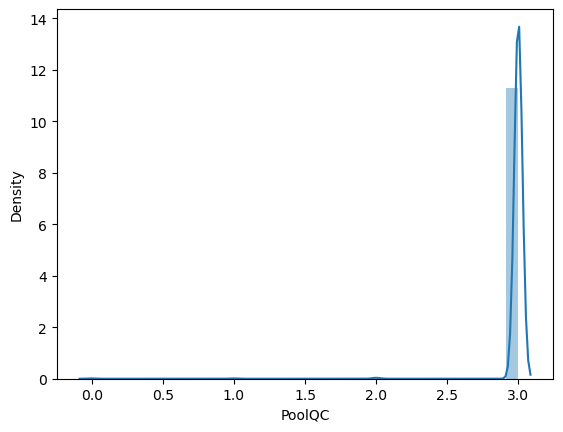

Skewness: -2.1240211644266025
count    1168.000000
mean        3.524829
std         1.070473
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Fence, dtype: float64


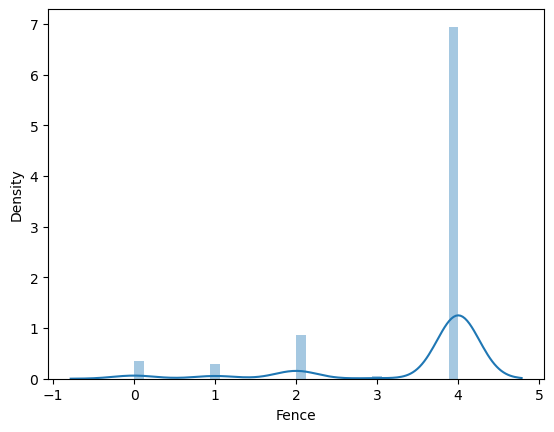

Skewness: 4.9914600018718565
count    1168.000000
mean        1.069349
std         0.374169
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: MiscFeature, dtype: float64


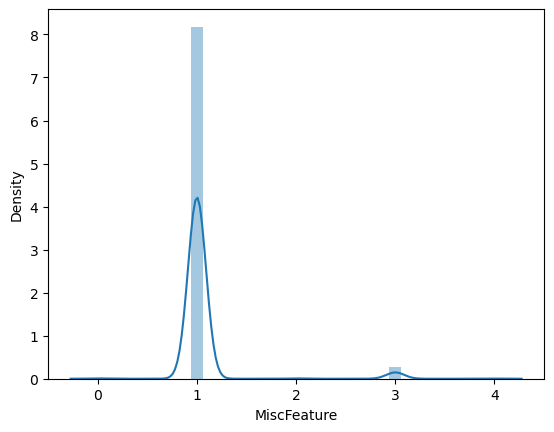

Skewness: 0.22818594996835914
count     1168
unique      12
top          6
freq       207
Name: MoSold, dtype: object


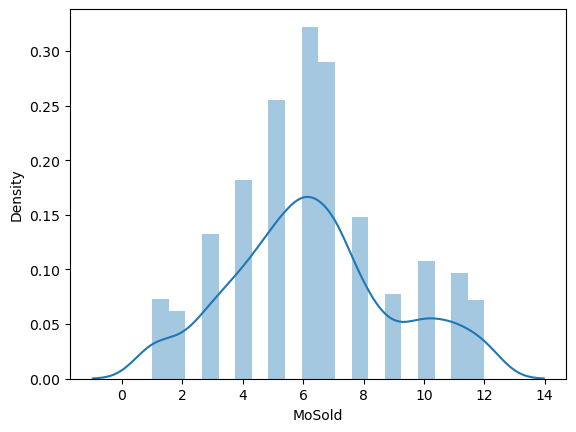

Skewness: -3.8022197285620782
count    1168.000000
mean        7.500000
std         1.580732
min         0.000000
25%         8.000000
50%         8.000000
75%         8.000000
max         8.000000
Name: SaleType, dtype: float64


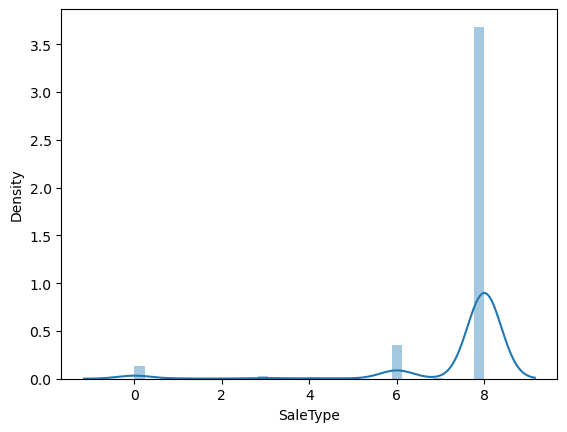

Skewness: -2.7335887920067012
count    1168.000000
mean        3.767979
std         1.104684
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: SaleCondition, dtype: float64


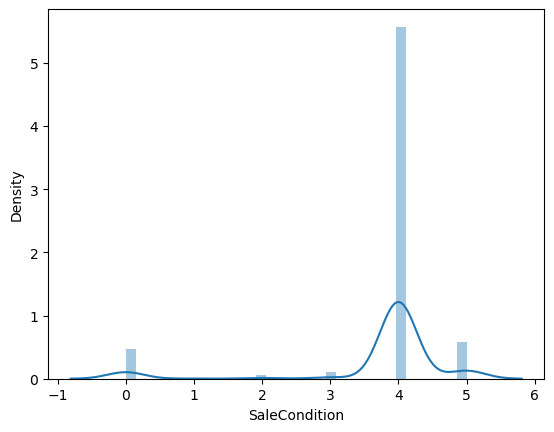

Skewness: 3.5894999356682424
count      1168
unique        2
top       False
freq       1094
Name: MSSubClass_120, dtype: object


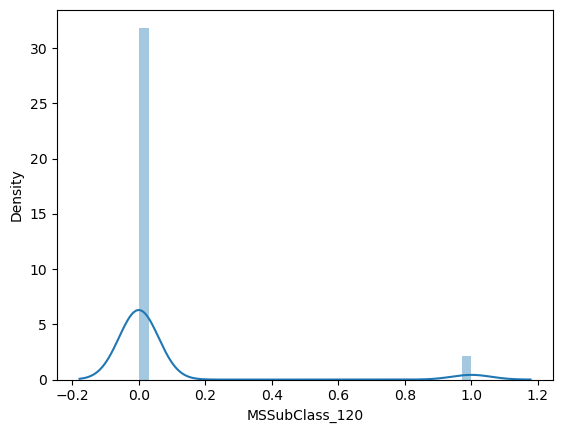

Skewness: 0
count      1168
unique        1
top       False
freq       1168
Name: MSSubClass_150, dtype: object


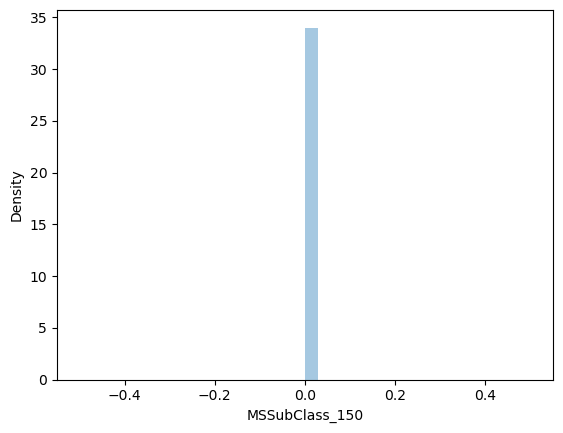

Skewness: 4.742367721833111
count      1168
unique        2
top       False
freq       1122
Name: MSSubClass_160, dtype: object


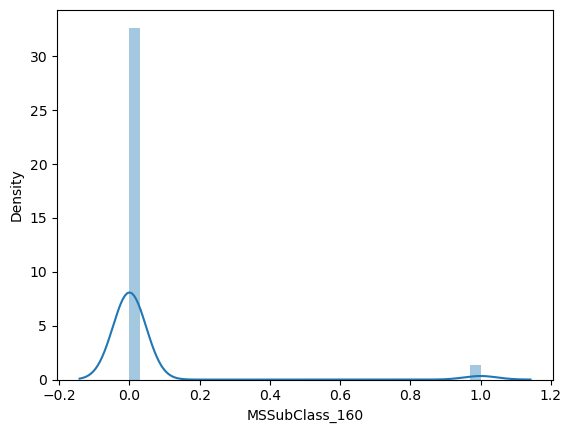

Skewness: 11.973932069169917
count      1168
unique        2
top       False
freq       1160
Name: MSSubClass_180, dtype: object


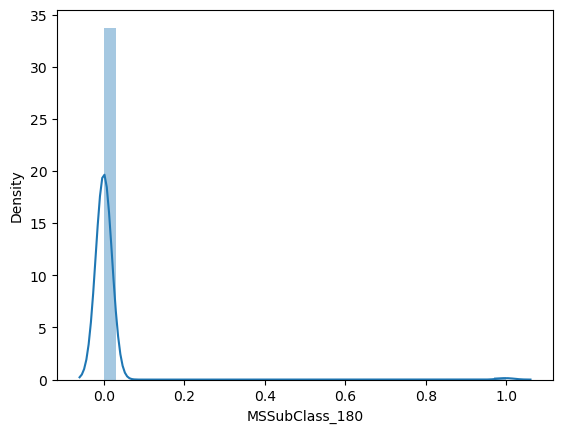

Skewness: 6.767958524254943
count      1168
unique        2
top       False
freq       1144
Name: MSSubClass_190, dtype: object


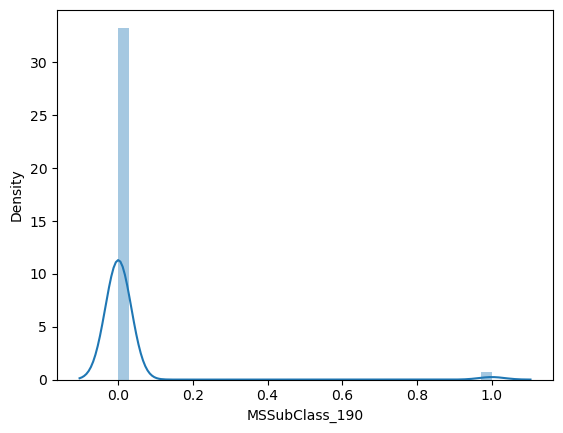

Skewness: 0.5398226489959318
count      1168
unique        2
top       False
freq        736
Name: MSSubClass_20, dtype: object


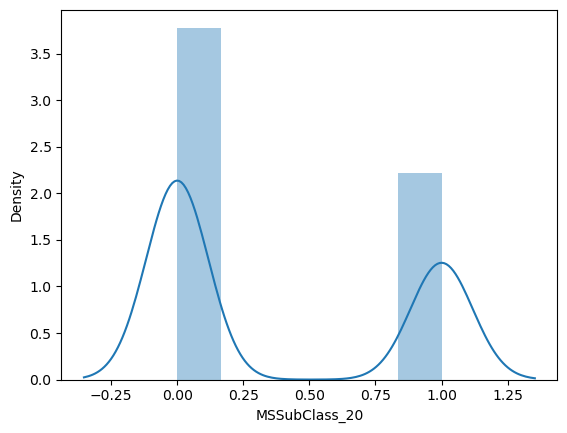

Skewness: 4.193768492604879
count      1168
unique        2
top       False
freq       1111
Name: MSSubClass_30, dtype: object


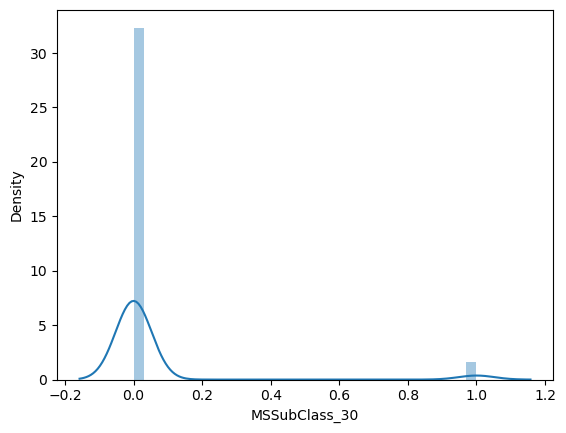

Skewness: 19.68071340074267
count      1168
unique        2
top       False
freq       1165
Name: MSSubClass_40, dtype: object


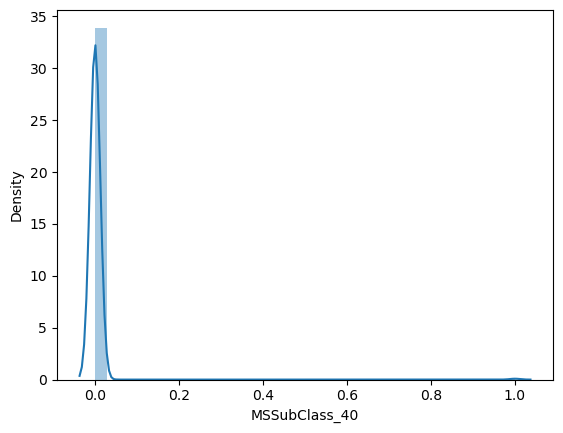

Skewness: 11.973932069169917
count      1168
unique        2
top       False
freq       1160
Name: MSSubClass_45, dtype: object


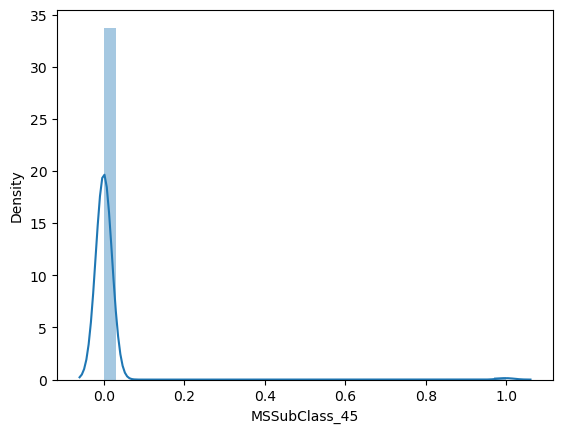

Skewness: 2.817282755659757
count      1168
unique        2
top       False
freq       1060
Name: MSSubClass_50, dtype: object


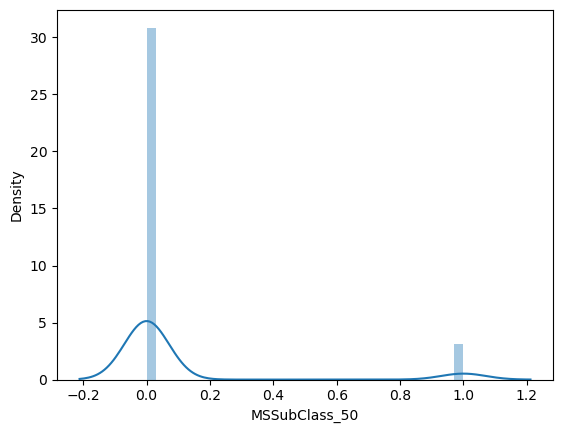

Skewness: 1.4597118318532565
count      1168
unique        2
top       False
freq        928
Name: MSSubClass_60, dtype: object


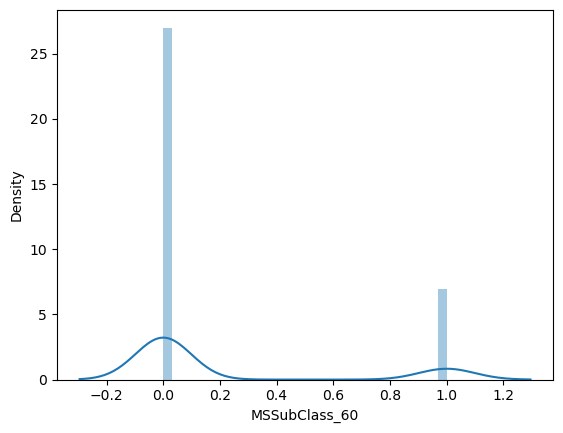

Skewness: 4.472020946463963
count      1168
unique        2
top       False
freq       1117
Name: MSSubClass_70, dtype: object


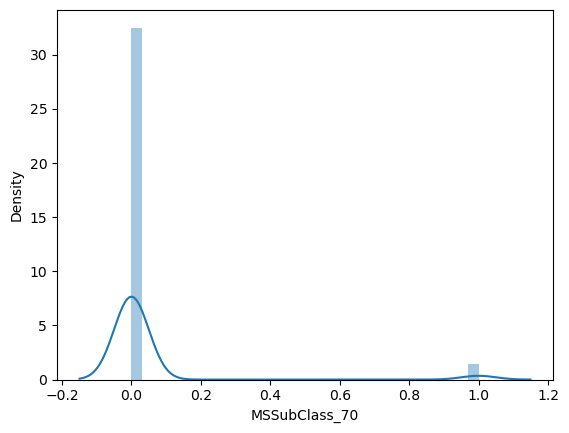

Skewness: 10.681836036033964
count      1168
unique        2
top       False
freq       1158
Name: MSSubClass_75, dtype: object


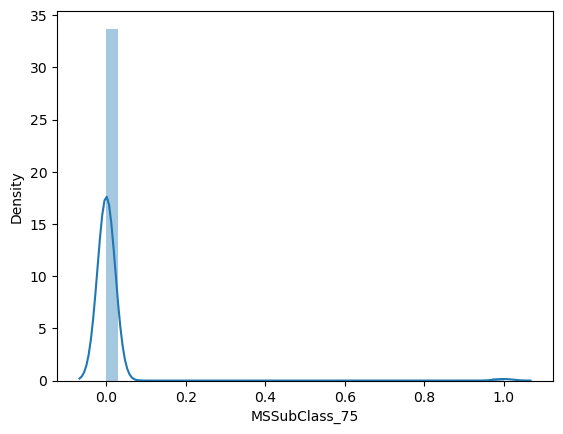

Skewness: 4.685013483047621
count      1168
unique        2
top       False
freq       1121
Name: MSSubClass_80, dtype: object


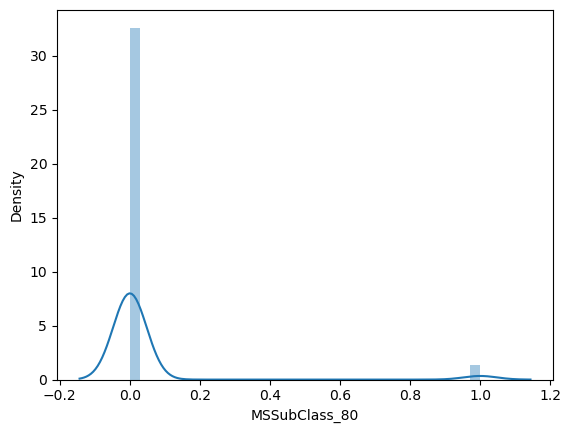

Skewness: 8.117255779194638
count      1168
unique        2
top       False
freq       1151
Name: MSSubClass_85, dtype: object


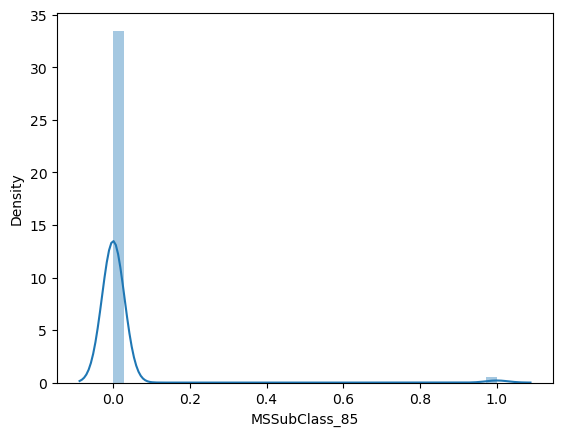

Skewness: 4.925780677042787
count      1168
unique        2
top       False
freq       1125
Name: MSSubClass_90, dtype: object


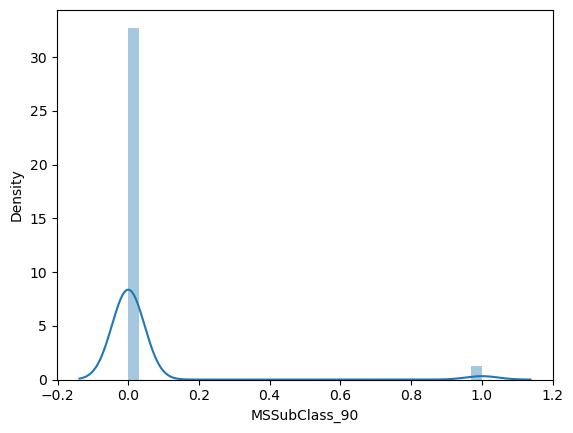

Skewness: 19.680713400742658
count      1168
unique        2
top       False
freq       1165
Name: Street_Grvl, dtype: object


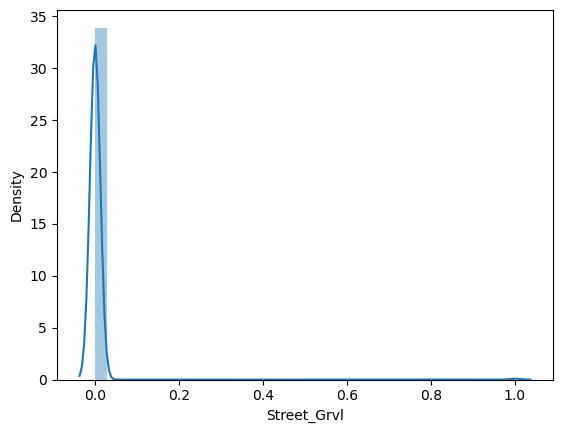

Skewness: -19.680713400742658
count     1168
unique       2
top       True
freq      1165
Name: Street_Pave, dtype: object


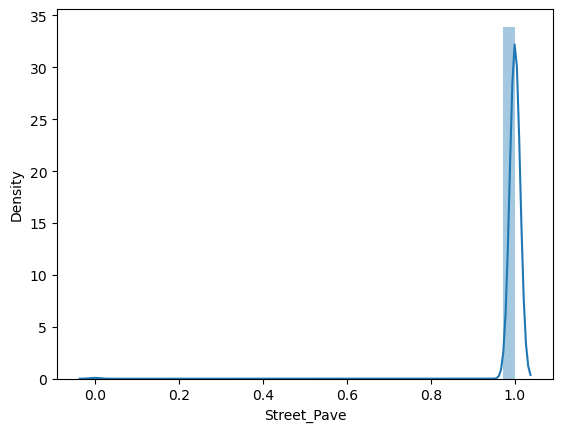

Skewness: 5.276548292787746
count      1168
unique        2
top       False
freq       1130
Name: Alley_Grvl, dtype: object


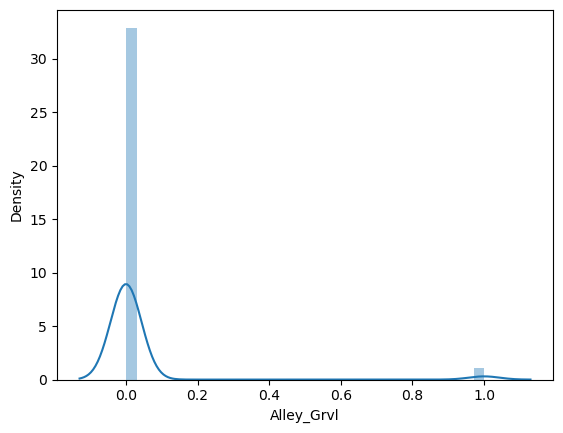

Skewness: -3.6810623331185046
count     1168
unique       2
top       True
freq      1097
Name: Alley_NA, dtype: object


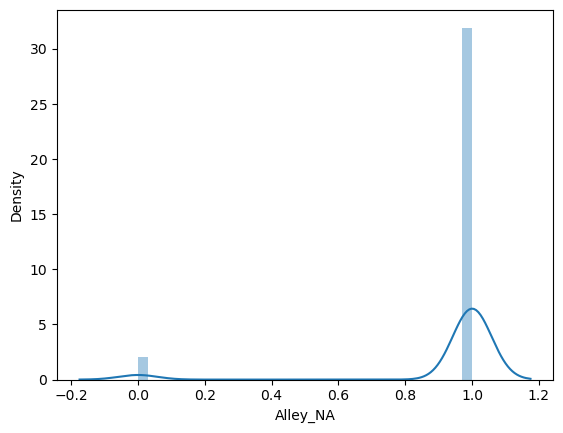

Skewness: 5.701445703924842
count      1168
unique        2
top       False
freq       1135
Name: Alley_Pave, dtype: object


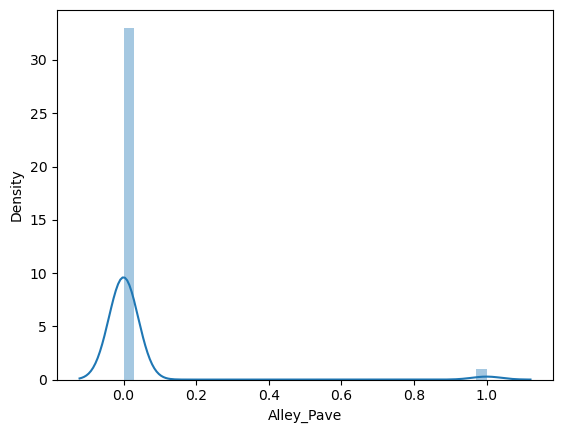

Skewness: 1.6398682018647468
count      1168
unique        2
top       False
freq        954
Name: LotConfig_Corner, dtype: object


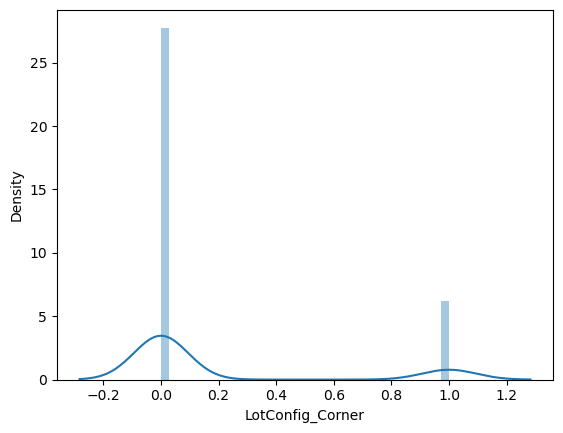

Skewness: 3.3432750340668496
count      1168
unique        2
top       False
freq       1085
Name: LotConfig_CulDSac, dtype: object


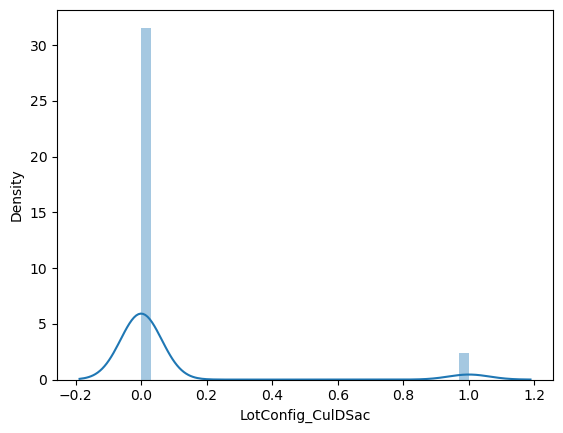

Skewness: 5.520922642695916
count      1168
unique        2
top       False
freq       1133
Name: LotConfig_FR2, dtype: object


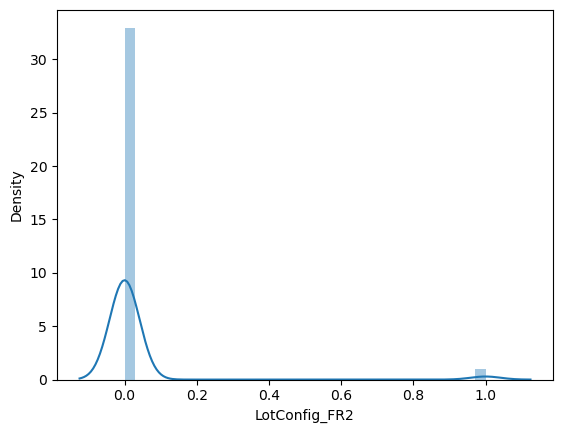

Skewness: 19.68071340074267
count      1168
unique        2
top       False
freq       1165
Name: LotConfig_FR3, dtype: object


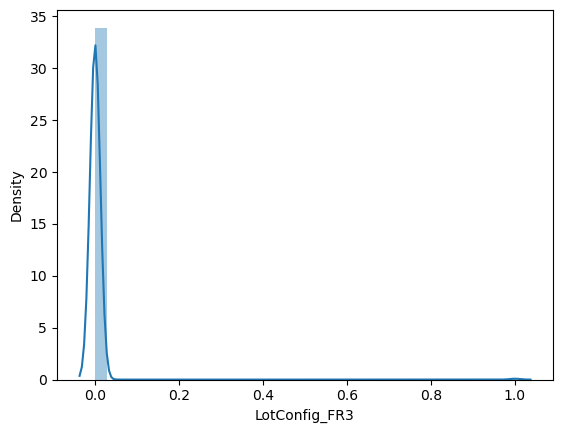

Skewness: -0.9439364084418796
count     1168
unique       2
top       True
freq       833
Name: LotConfig_Inside, dtype: object


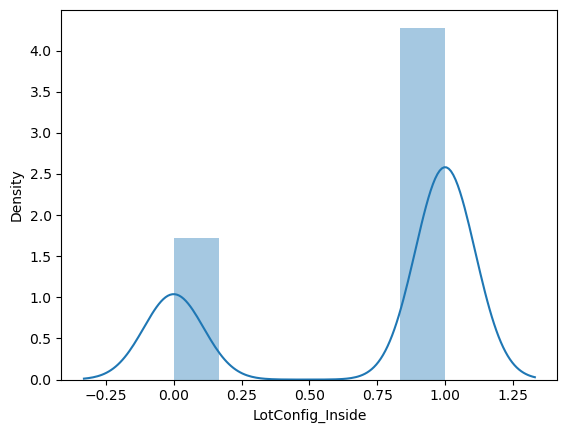

Skewness: 9.725563714798062
count      1168
unique        2
top       False
freq       1156
Name: Neighborhood_Blmngtn, dtype: object


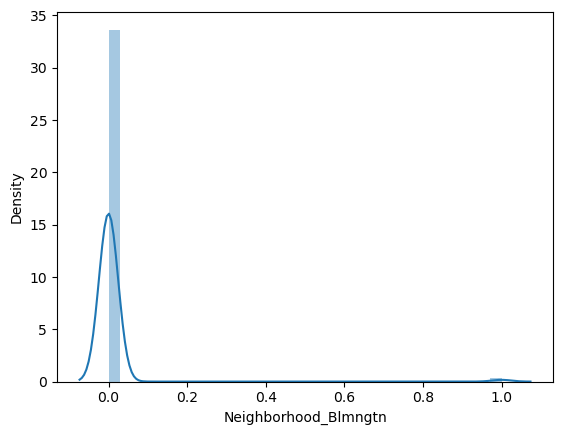

Skewness: 34.176014981270136
count      1168
unique        2
top       False
freq       1167
Name: Neighborhood_Blueste, dtype: object


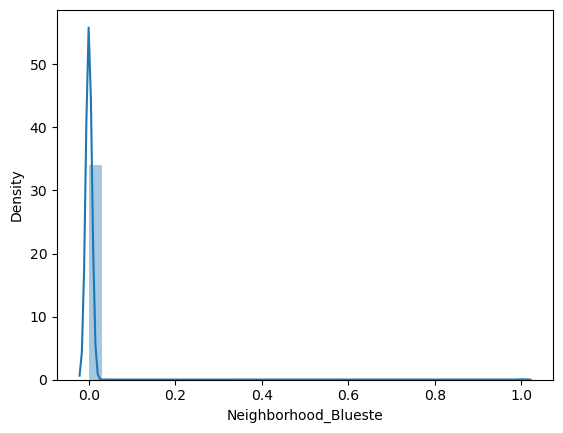

Skewness: 10.171380347202826
count      1168
unique        2
top       False
freq       1157
Name: Neighborhood_BrDale, dtype: object


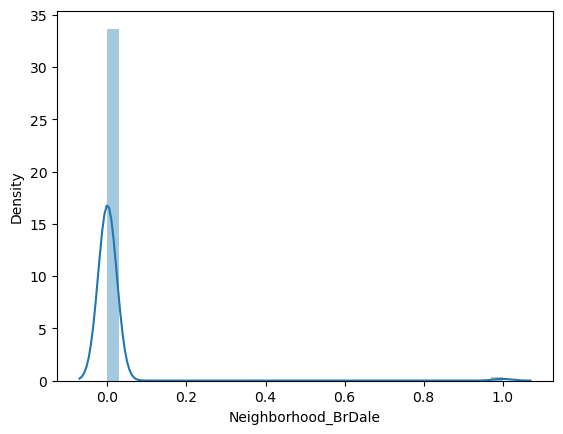

Skewness: 4.742367721833112
count      1168
unique        2
top       False
freq       1122
Name: Neighborhood_BrkSide, dtype: object


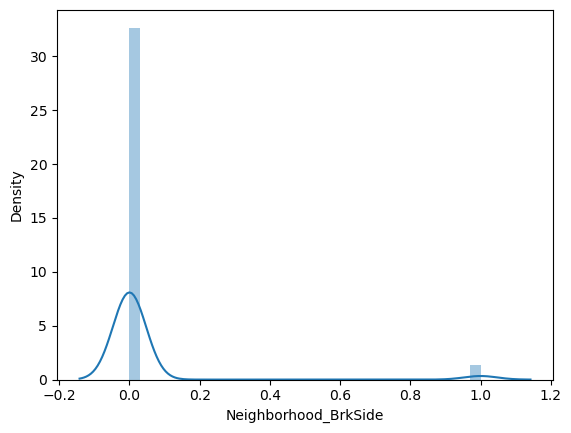

Skewness: 6.922843191360126
count      1168
unique        2
top       False
freq       1145
Name: Neighborhood_ClearCr, dtype: object


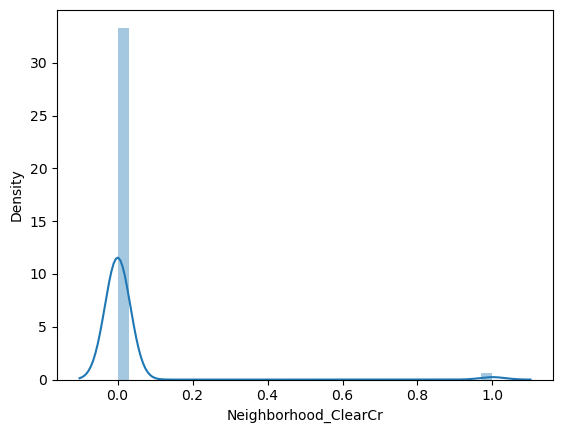

Skewness: 2.502830754174051
count      1168
unique        2
top       False
freq       1040
Name: Neighborhood_CollgCr, dtype: object


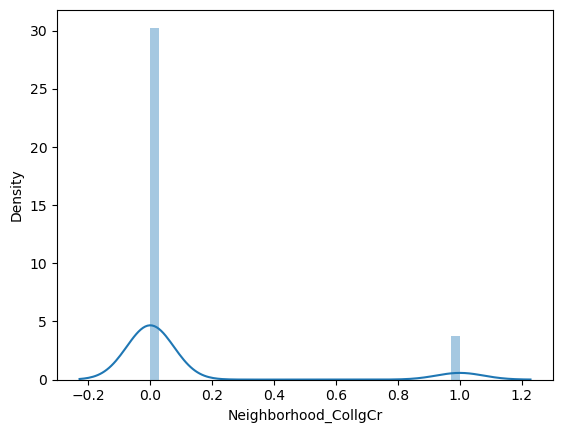

Skewness: 4.925780677042786
count      1168
unique        2
top       False
freq       1125
Name: Neighborhood_Crawfor, dtype: object


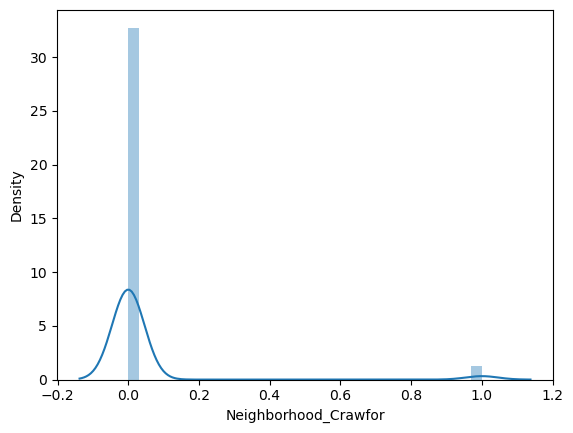

Skewness: 3.4751876578509306
count      1168
unique        2
top       False
freq       1090
Name: Neighborhood_Edwards, dtype: object


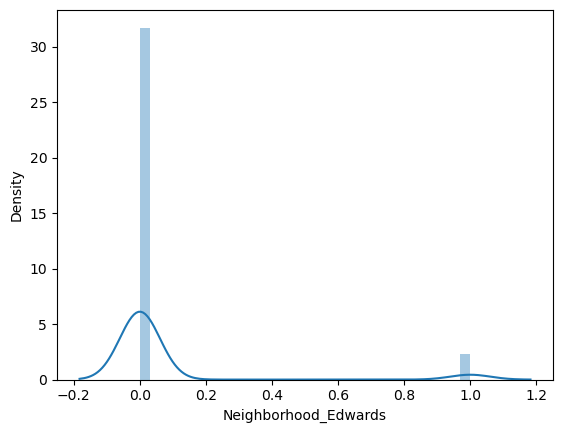

Skewness: 3.954345429885624
count      1168
unique        2
top       False
freq       1105
Name: Neighborhood_Gilbert, dtype: object


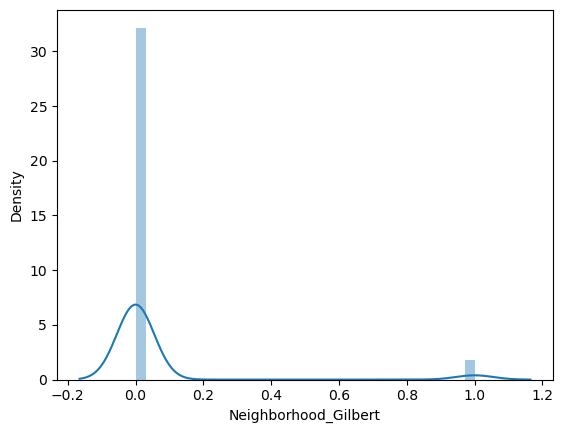

Skewness: 6.355047274001082
count      1168
unique        2
top       False
freq       1141
Name: Neighborhood_IDOTRR, dtype: object


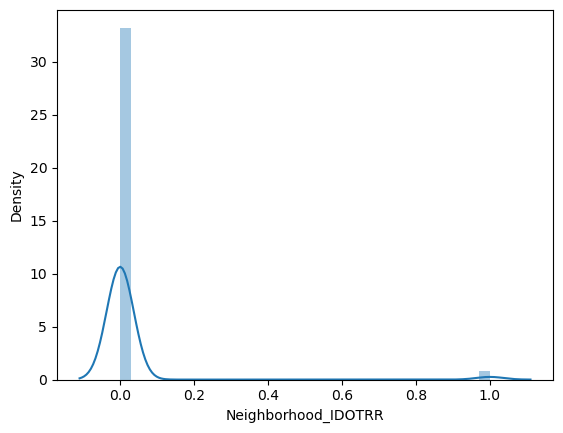

Skewness: 9.725563714798064
count      1168
unique        2
top       False
freq       1156
Name: Neighborhood_MeadowV, dtype: object


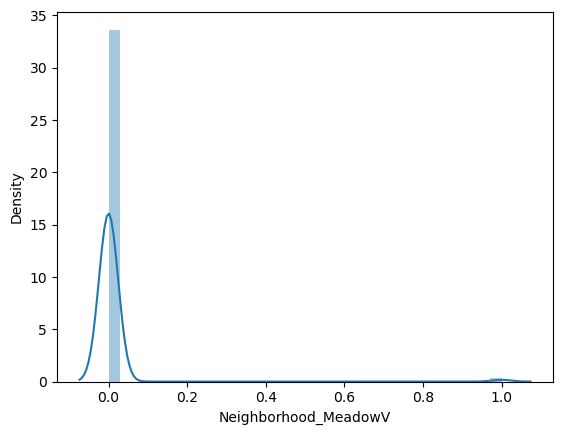

Skewness: 5.520922642695916
count      1168
unique        2
top       False
freq       1133
Name: Neighborhood_Mitchel, dtype: object


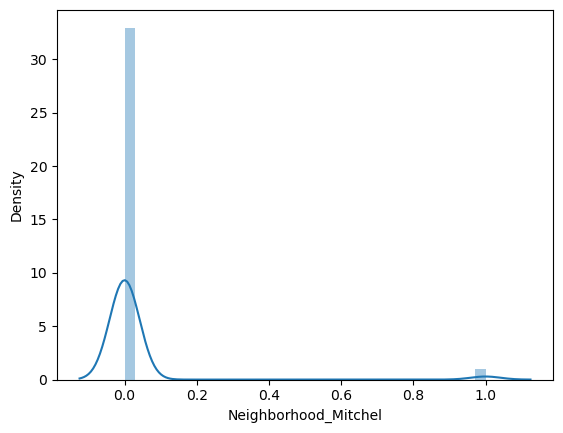

Skewness: 1.9184696580575984
count      1168
unique        2
top       False
freq        988
Name: Neighborhood_NAmes, dtype: object


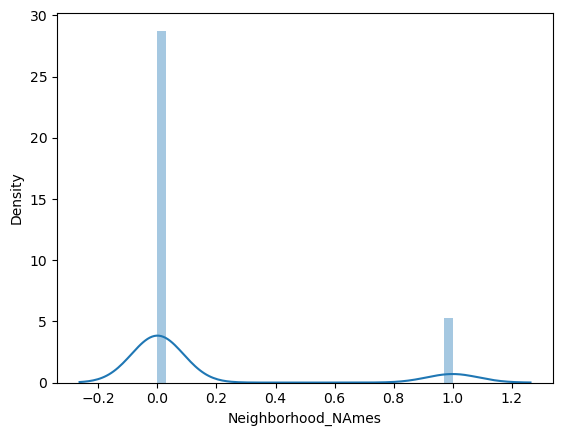

Skewness: 11.274392931529224
count      1168
unique        2
top       False
freq       1159
Name: Neighborhood_NPkVill, dtype: object


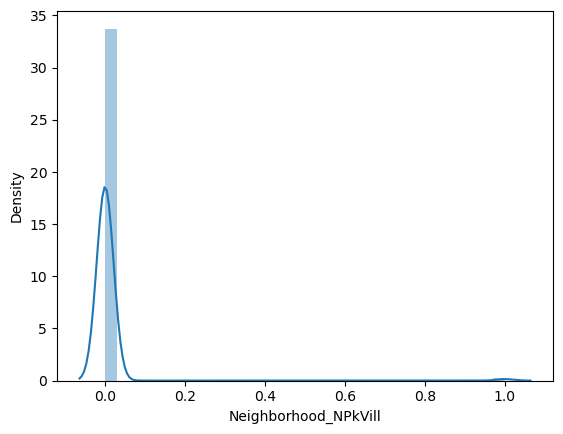

Skewness: 3.991952724447509
count      1168
unique        2
top       False
freq       1106
Name: Neighborhood_NWAmes, dtype: object


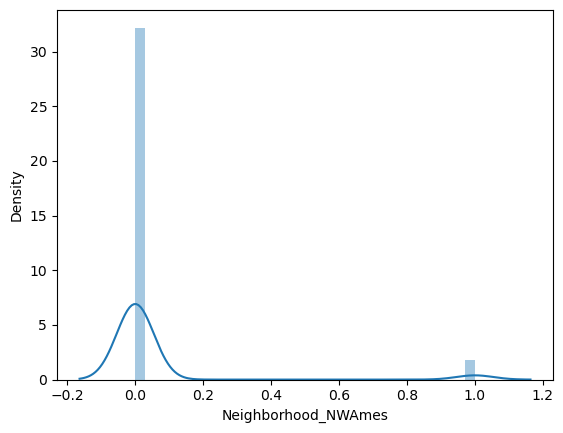

Skewness: 5.797799834602537
count      1168
unique        2
top       False
freq       1136
Name: Neighborhood_NoRidge, dtype: object


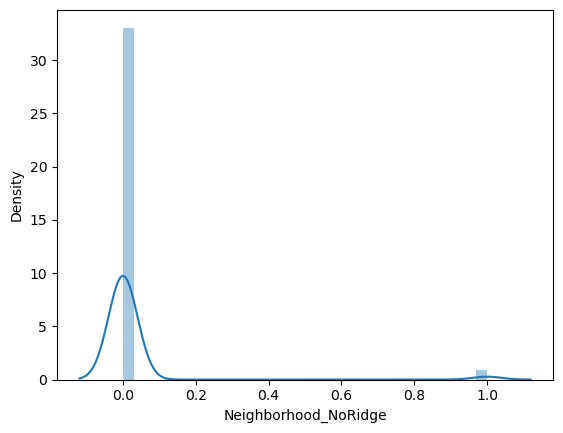

Skewness: 3.9543454298856235
count      1168
unique        2
top       False
freq       1105
Name: Neighborhood_NridgHt, dtype: object


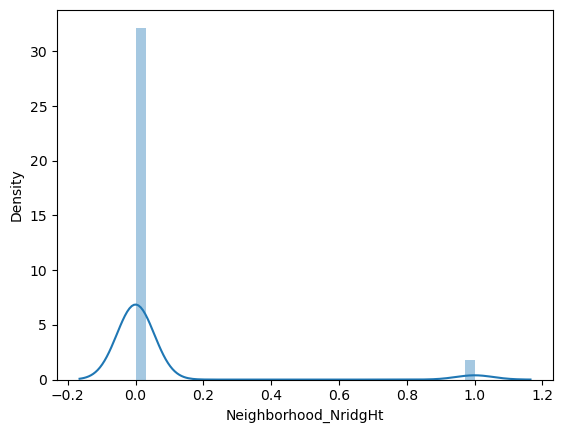

Skewness: 3.1760300908061416
count      1168
unique        2
top       False
freq       1078
Name: Neighborhood_OldTown, dtype: object


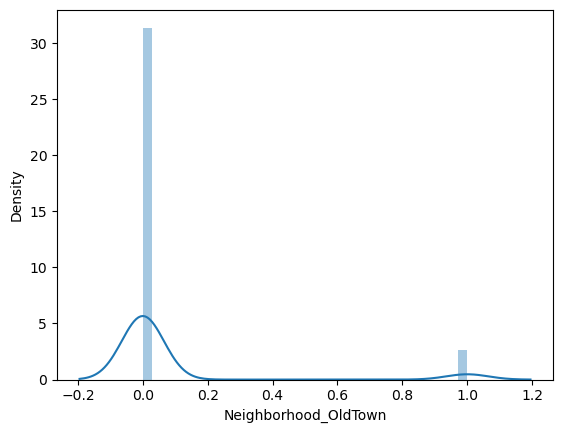

Skewness: 6.922843191360126
count      1168
unique        2
top       False
freq       1145
Name: Neighborhood_SWISU, dtype: object


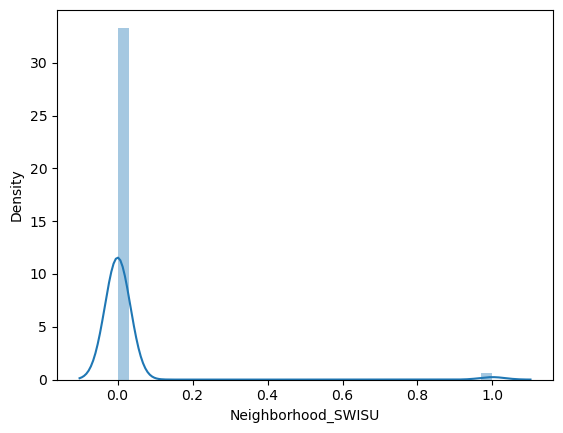

Skewness: 4.237169232446986
count      1168
unique        2
top       False
freq       1112
Name: Neighborhood_Sawyer, dtype: object


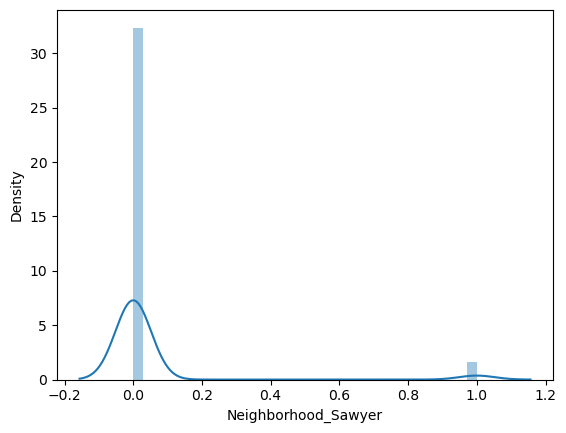

Skewness: 4.862644952870628
count      1168
unique        2
top       False
freq       1124
Name: Neighborhood_SawyerW, dtype: object


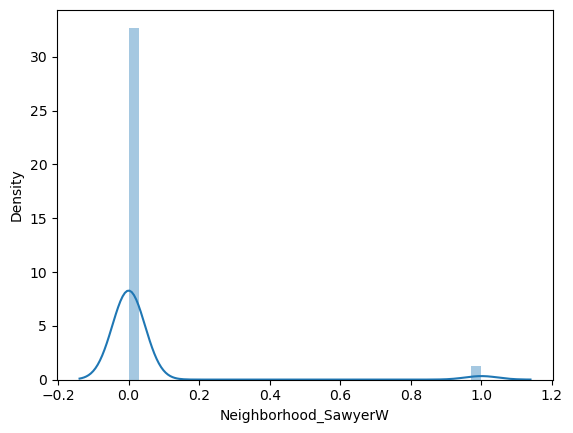

Skewness: 3.778219606062129
count      1168
unique        2
top       False
freq       1100
Name: Neighborhood_Somerst, dtype: object


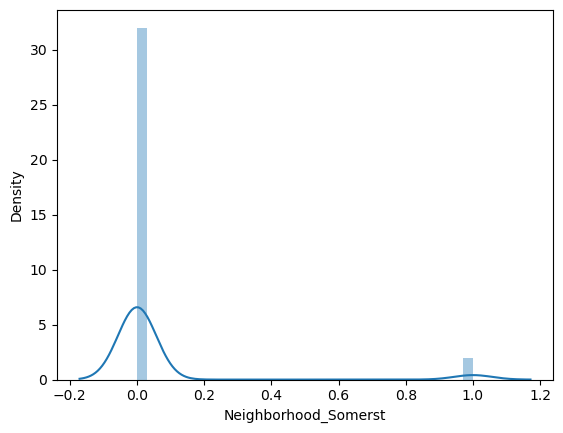

Skewness: 7.087955152673852
count      1168
unique        2
top       False
freq       1146
Name: Neighborhood_StoneBr, dtype: object


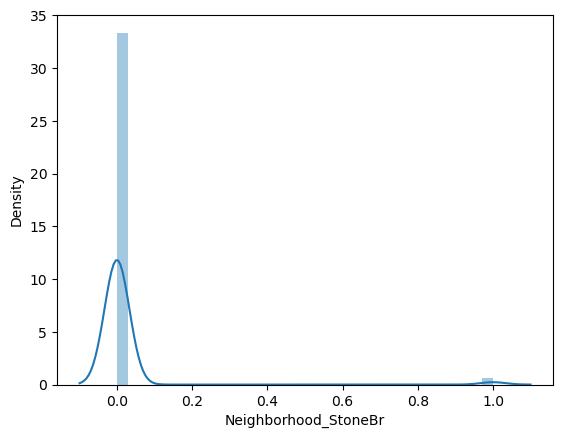

Skewness: 5.8986461819279565
count      1168
unique        2
top       False
freq       1137
Name: Neighborhood_Timber, dtype: object


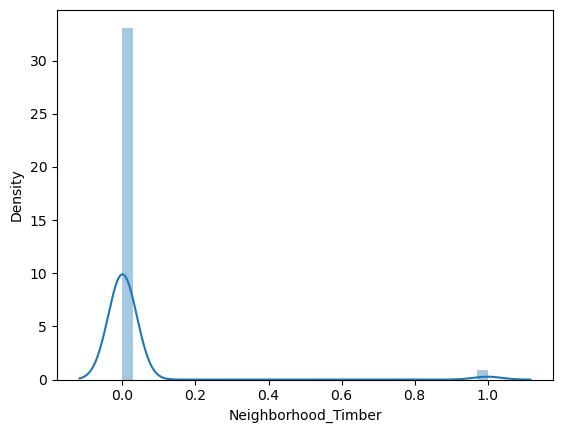

Skewness: 11.274392931529224
count      1168
unique        2
top       False
freq       1159
Name: Neighborhood_Veenker, dtype: object


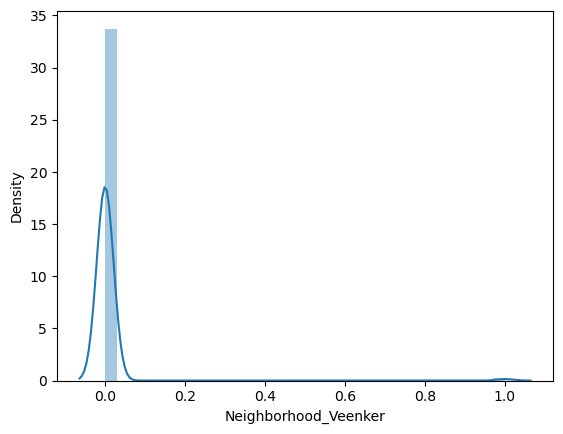

Skewness: 4.991070917361019
count      1168
unique        2
top       False
freq       1126
Name: Condition1_Artery, dtype: object


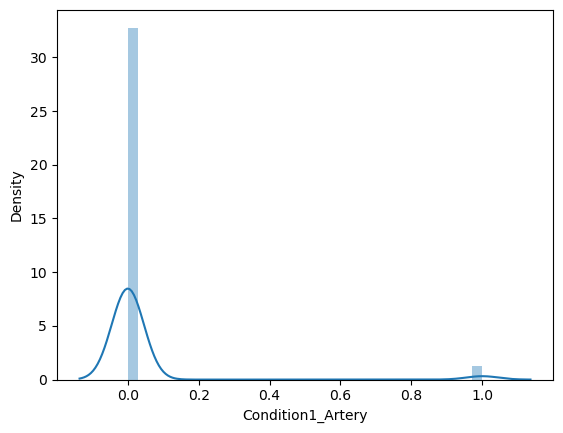

Skewness: 3.881603921623594
count      1168
unique        2
top       False
freq       1103
Name: Condition1_Feedr, dtype: object


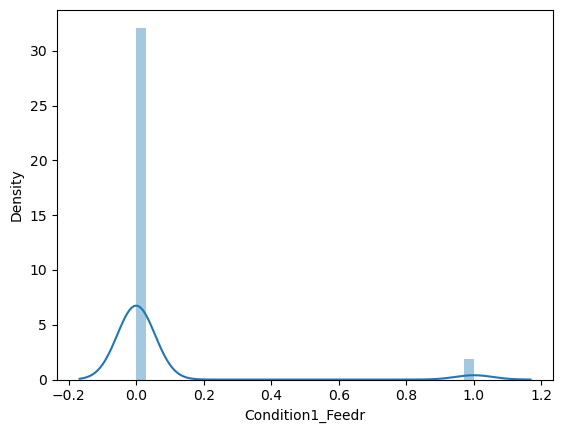

Skewness: -2.0324832931536387
count     1168
unique       2
top       True
freq      1000
Name: Condition1_Norm, dtype: object


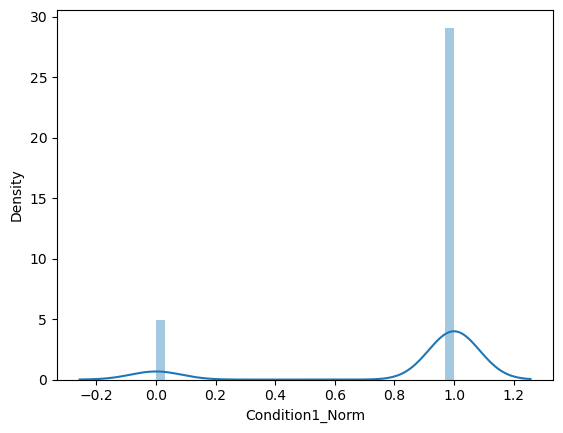

Skewness: 11.973932069169917
count      1168
unique        2
top       False
freq       1160
Name: Condition1_PosA, dtype: object


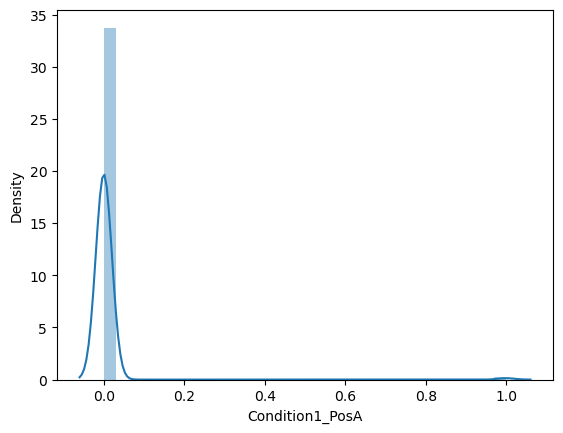

Skewness: 8.66443559553274
count      1168
unique        2
top       False
freq       1153
Name: Condition1_PosN, dtype: object


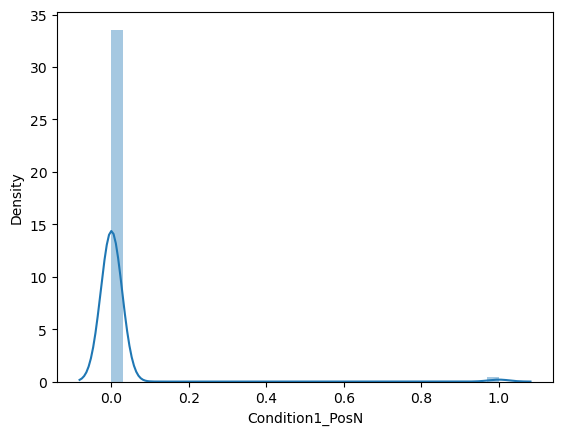

Skewness: 11.274392931529224
count      1168
unique        2
top       False
freq       1159
Name: Condition1_RRAe, dtype: object


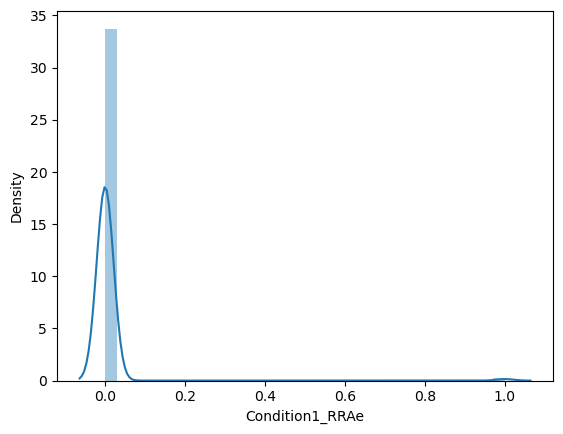

Skewness: 6.922843191360126
count      1168
unique        2
top       False
freq       1145
Name: Condition1_RRAn, dtype: object


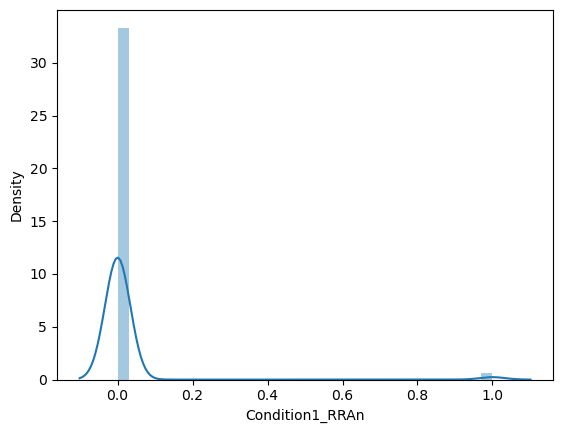

Skewness: 24.13498350061156
count      1168
unique        2
top       False
freq       1166
Name: Condition1_RRNe, dtype: object


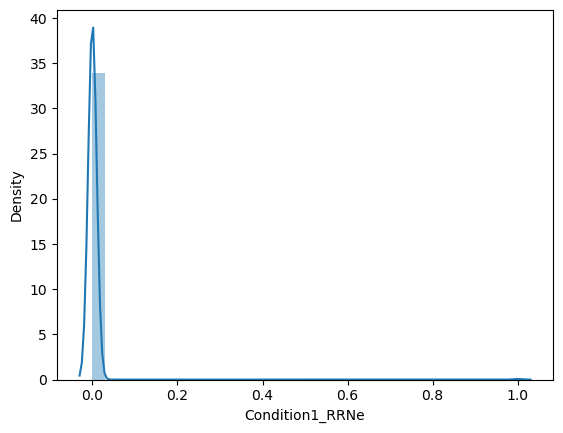

Skewness: 17.021969279861406
count      1168
unique        2
top       False
freq       1164
Name: Condition1_RRNn, dtype: object


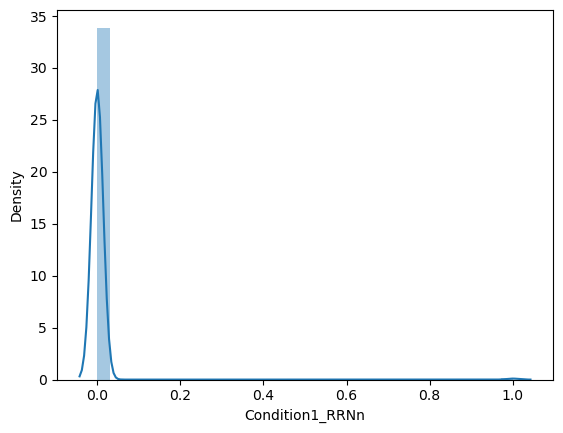

Skewness: 24.13498350061156
count      1168
unique        2
top       False
freq       1166
Name: Condition2_Artery, dtype: object


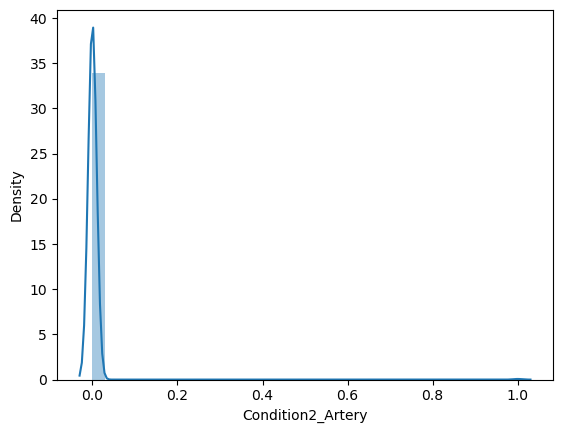

Skewness: 17.021969279861406
count      1168
unique        2
top       False
freq       1164
Name: Condition2_Feedr, dtype: object


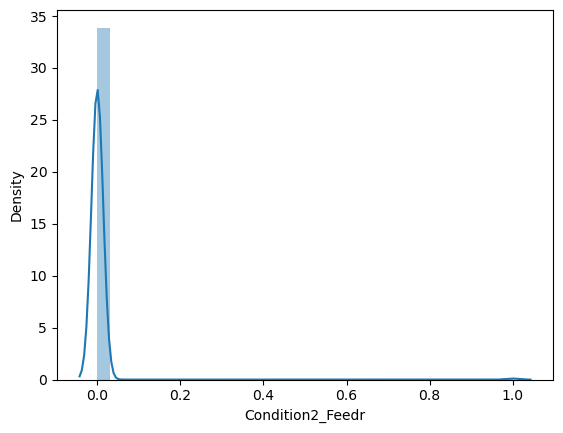

Skewness: -9.331720760642034
count     1168
unique       2
top       True
freq      1155
Name: Condition2_Norm, dtype: object


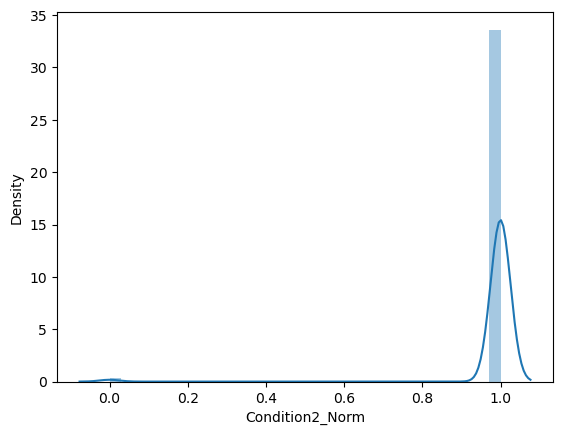

Skewness: 34.17601498127013
count      1168
unique        2
top       False
freq       1167
Name: Condition2_PosA, dtype: object


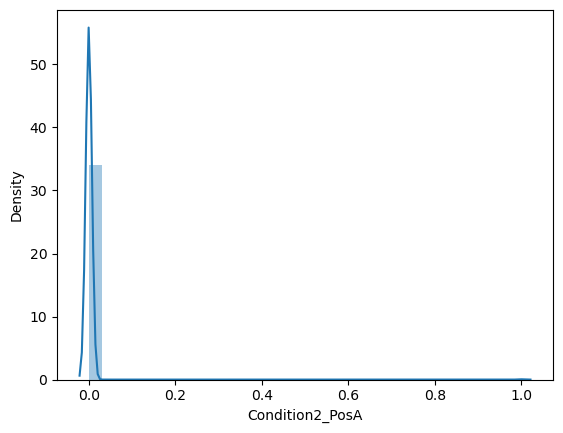

Skewness: 24.13498350061156
count      1168
unique        2
top       False
freq       1166
Name: Condition2_PosN, dtype: object


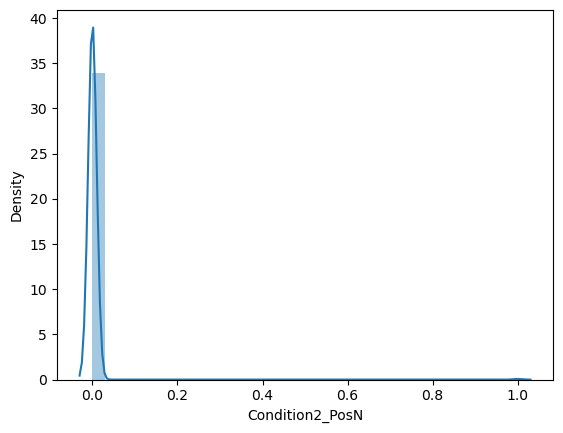

Skewness: 34.176014981270136
count      1168
unique        2
top       False
freq       1167
Name: Condition2_RRAe, dtype: object


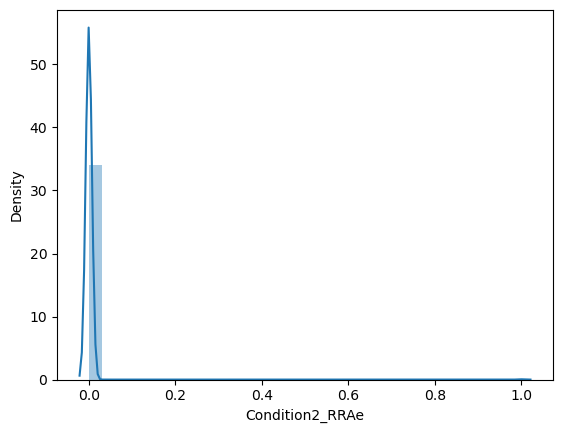

Skewness: 34.176014981270136
count      1168
unique        2
top       False
freq       1167
Name: Condition2_RRAn, dtype: object


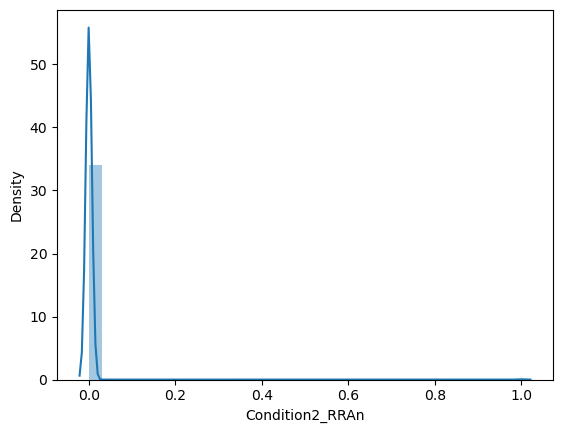

Skewness: 24.134983500611565
count      1168
unique        2
top       False
freq       1166
Name: Condition2_RRNn, dtype: object


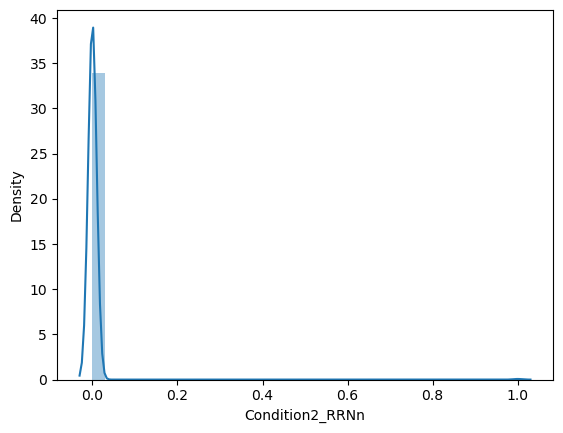

Skewness: -1.7966875494533816
count     1168
unique       2
top       True
freq       974
Name: BldgType_1Fam, dtype: object


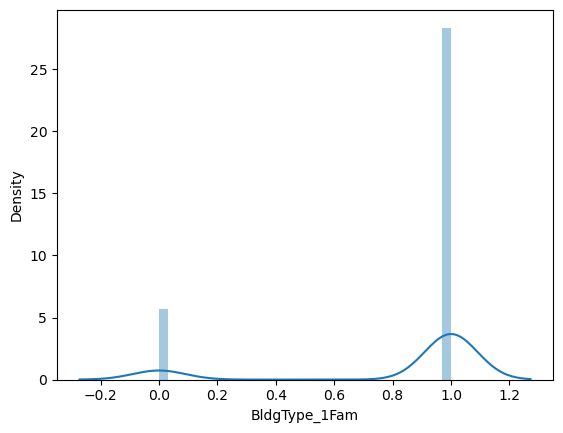

Skewness: 6.622271515415977
count      1168
unique        2
top       False
freq       1143
Name: BldgType_2fmCon, dtype: object


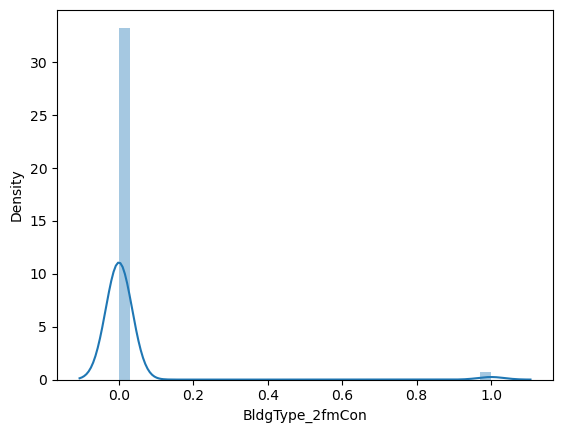

Skewness: 4.925780677042787
count      1168
unique        2
top       False
freq       1125
Name: BldgType_Duplex, dtype: object


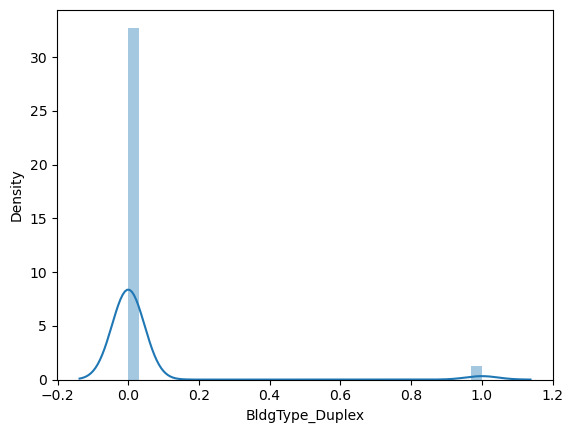

Skewness: 5.60925260551804
count      1168
unique        2
top       False
freq       1134
Name: BldgType_Twnhs, dtype: object


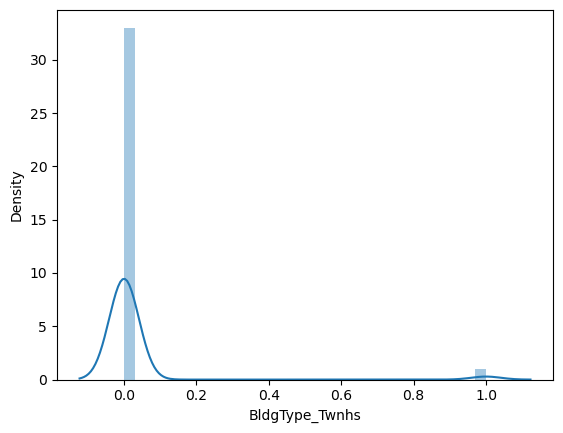

Skewness: 3.1315067205521308
count      1168
unique        2
top       False
freq       1076
Name: BldgType_TwnhsE, dtype: object


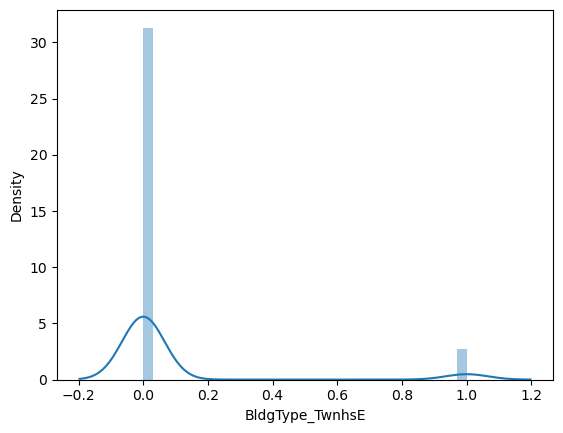

Skewness: 2.6828555075963987
count      1168
unique        2
top       False
freq       1052
Name: HouseStyle_1.5Fin, dtype: object


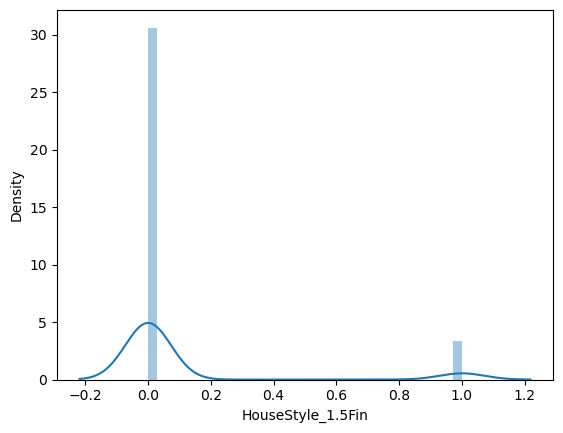

Skewness: 10.681836036033964
count      1168
unique        2
top       False
freq       1158
Name: HouseStyle_1.5Unf, dtype: object


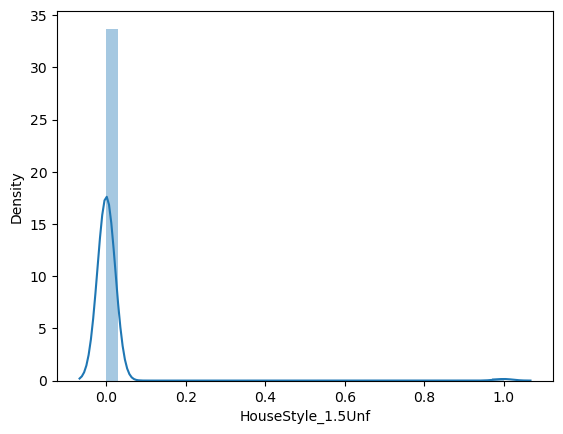

Skewness: -0.024005164568866016
count     1168
unique       2
top       True
freq       591
Name: HouseStyle_1Story, dtype: object


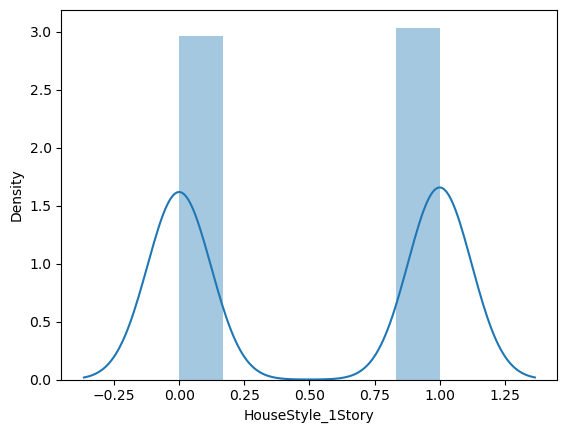

Skewness: 15.205195164332952
count      1168
unique        2
top       False
freq       1163
Name: HouseStyle_2.5Fin, dtype: object


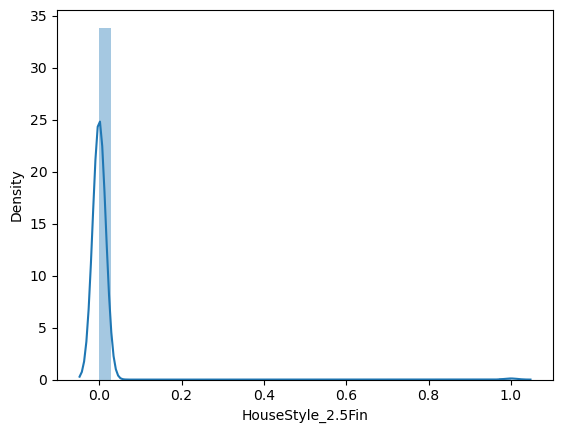

Skewness: 11.97393206916992
count      1168
unique        2
top       False
freq       1160
Name: HouseStyle_2.5Unf, dtype: object


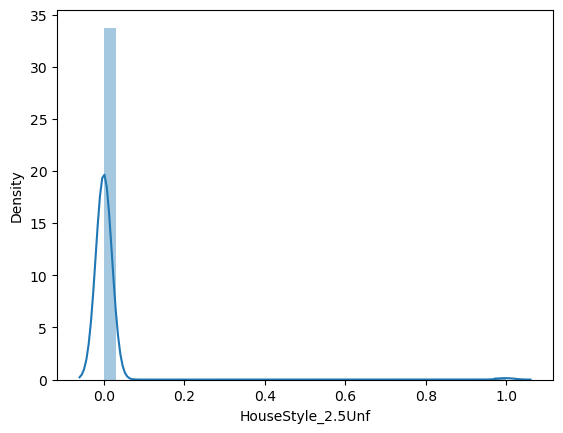

Skewness: 0.8492198325226842
count      1168
unique        2
top       False
freq        812
Name: HouseStyle_2Story, dtype: object


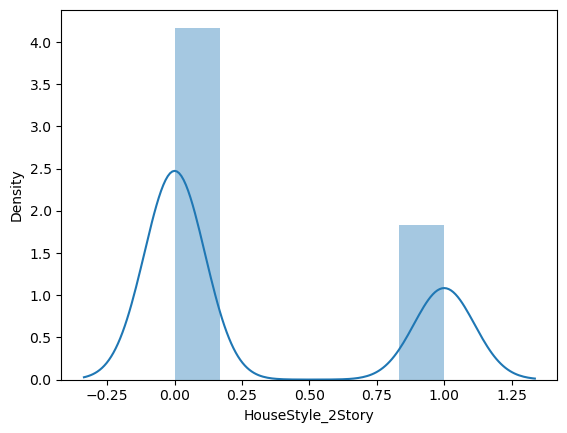

Skewness: 5.898646181927957
count      1168
unique        2
top       False
freq       1137
Name: HouseStyle_SFoyer, dtype: object


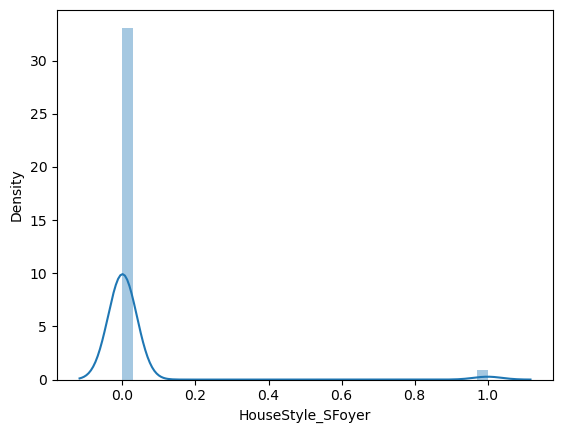

Skewness: 4.472020946463962
count      1168
unique        2
top       False
freq       1117
Name: HouseStyle_SLvl, dtype: object


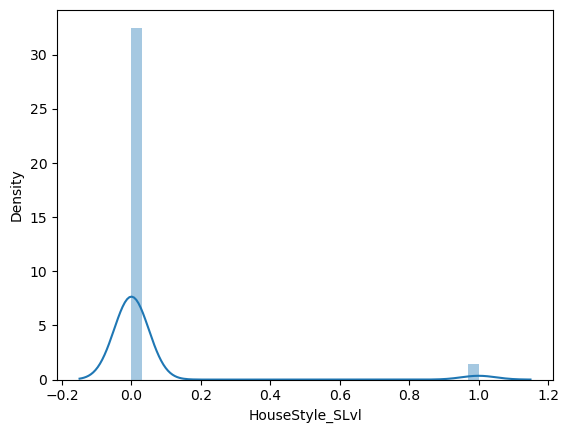

Skewness: 10.171380347202824
count      1168
unique        2
top       False
freq       1157
Name: RoofStyle_Flat, dtype: object


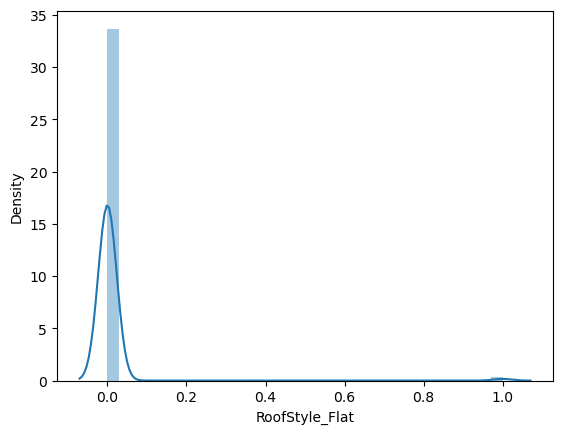

Skewness: -1.3533505293844752
count     1168
unique       2
top       True
freq       911
Name: RoofStyle_Gable, dtype: object


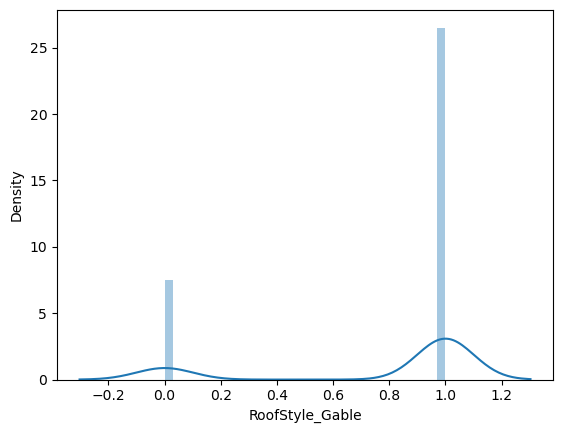

Skewness: 11.97393206916992
count      1168
unique        2
top       False
freq       1160
Name: RoofStyle_Gambrel, dtype: object


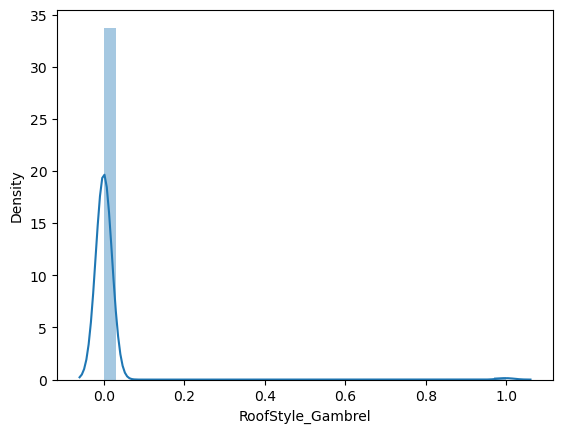

Skewness: 1.5262519066127749
count      1168
unique        2
top       False
freq        938
Name: RoofStyle_Hip, dtype: object


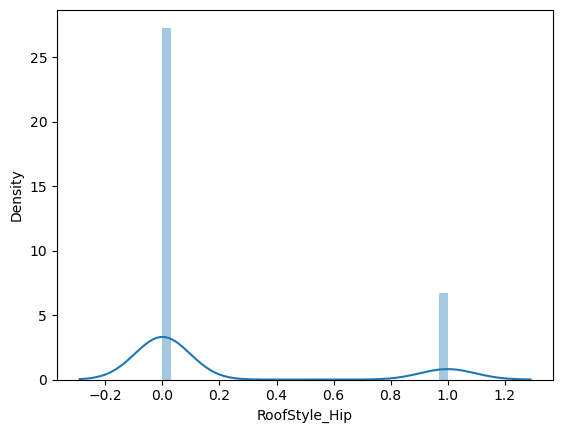

Skewness: 12.817371671097337
count      1168
unique        2
top       False
freq       1161
Name: RoofStyle_Mansard, dtype: object


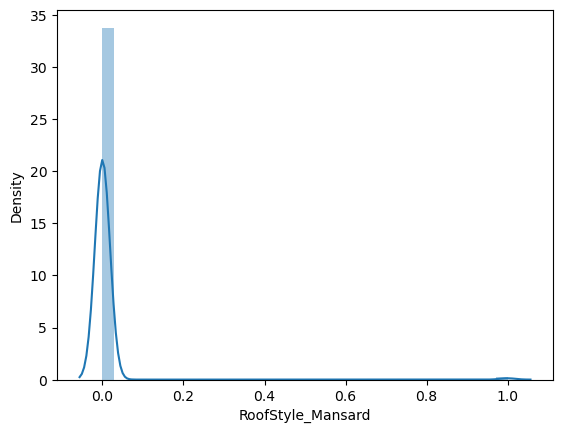

Skewness: 34.176014981270136
count      1168
unique        2
top       False
freq       1167
Name: RoofStyle_Shed, dtype: object


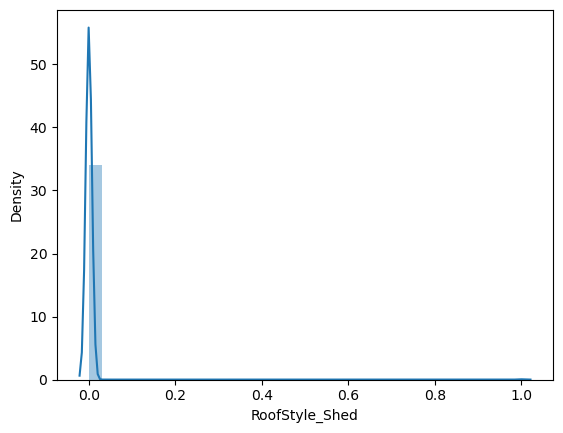

Skewness: 34.17601498127015
count      1168
unique        2
top       False
freq       1167
Name: RoofMatl_ClyTile, dtype: object


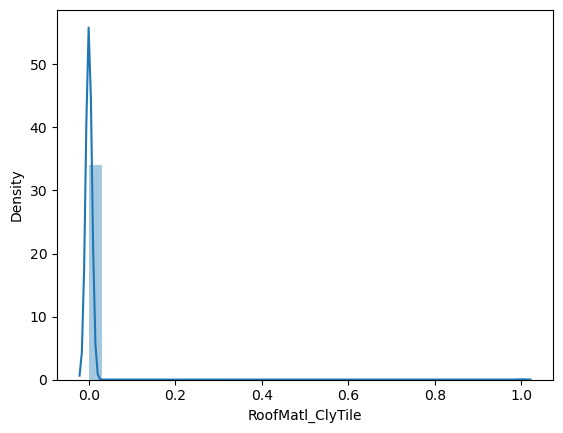

Skewness: -7.264493394181815
count     1168
unique       2
top       True
freq      1147
Name: RoofMatl_CompShg, dtype: object


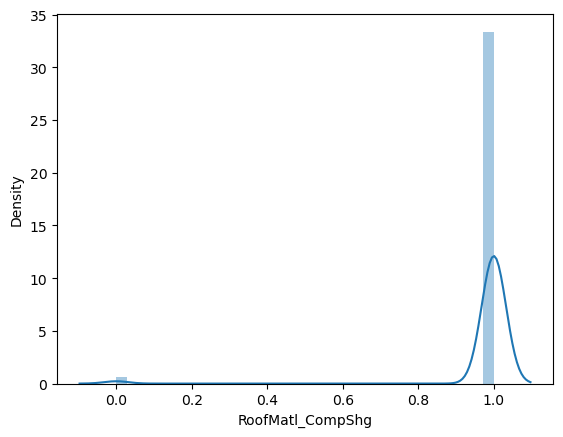

Skewness: 34.17601498127013
count      1168
unique        2
top       False
freq       1167
Name: RoofMatl_Membran, dtype: object


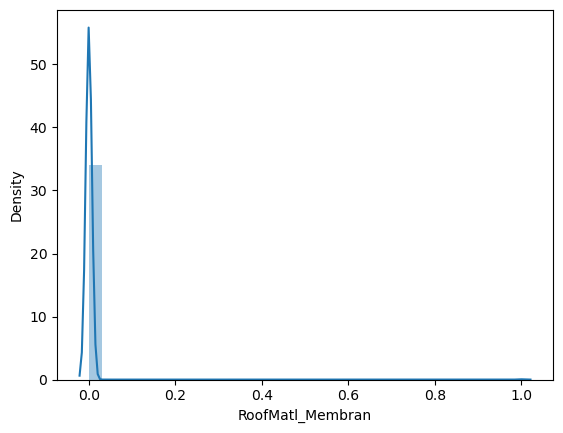

Skewness: 0
count      1168
unique        1
top       False
freq       1168
Name: RoofMatl_Metal, dtype: object


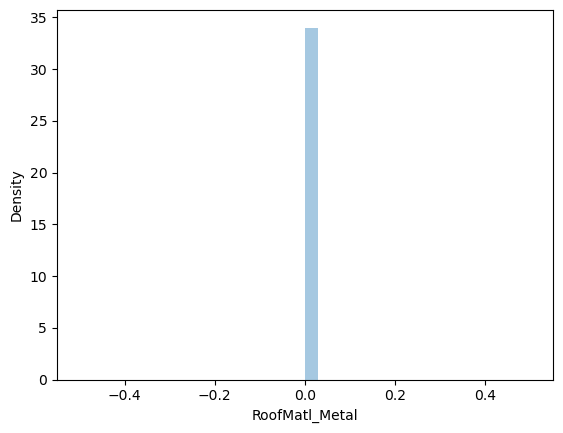

Skewness: 34.17601498127013
count      1168
unique        2
top       False
freq       1167
Name: RoofMatl_Roll, dtype: object


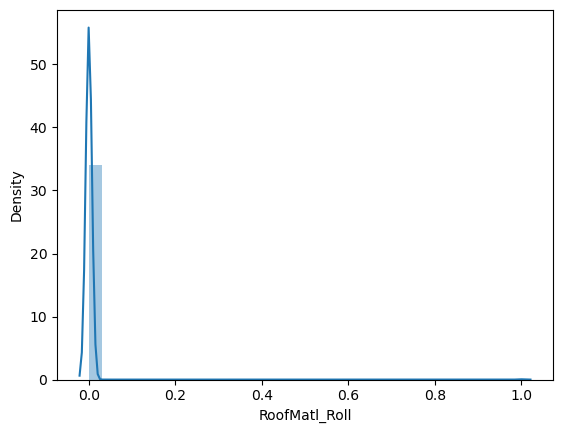

Skewness: 10.681836036033959
count      1168
unique        2
top       False
freq       1158
Name: RoofMatl_Tar&Grv, dtype: object


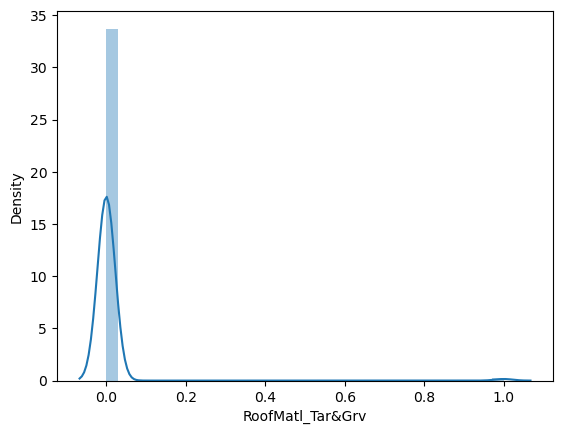

Skewness: 19.68071340074267
count      1168
unique        2
top       False
freq       1165
Name: RoofMatl_WdShake, dtype: object


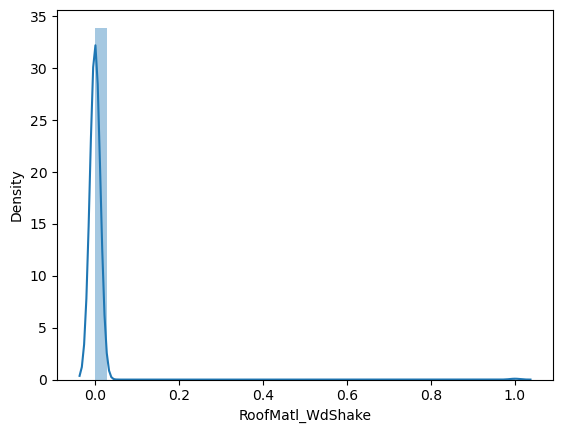

Skewness: 15.205195164332952
count      1168
unique        2
top       False
freq       1163
Name: RoofMatl_WdShngl, dtype: object


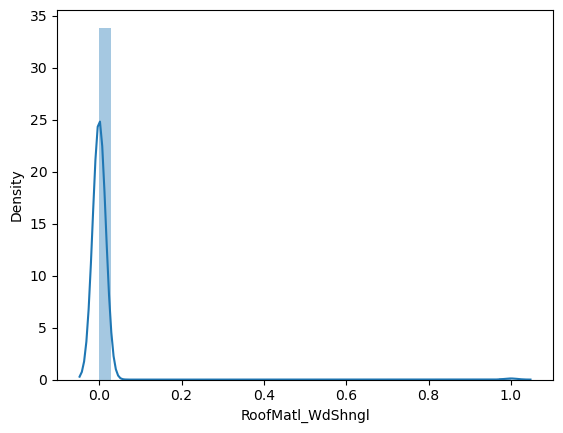

Skewness: 8.37819375132687
count      1168
unique        2
top       False
freq       1152
Name: Exterior1st_AsbShng, dtype: object


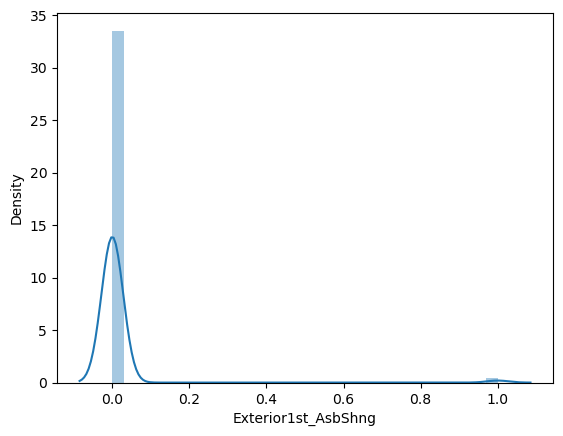

Skewness: 0
count      1168
unique        1
top       False
freq       1168
Name: Exterior1st_AsphShn, dtype: object


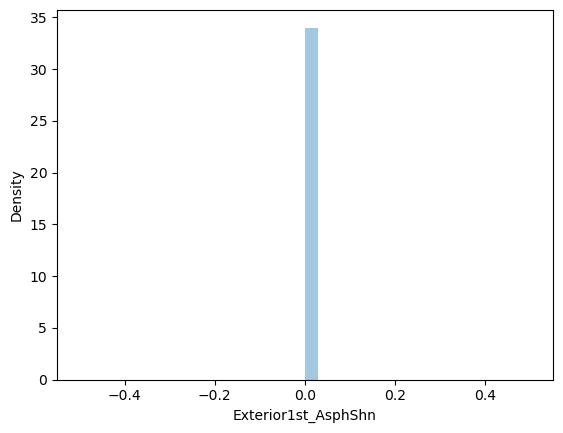

Skewness: 34.17601498127014
count      1168
unique        2
top       False
freq       1167
Name: Exterior1st_BrkComm, dtype: object


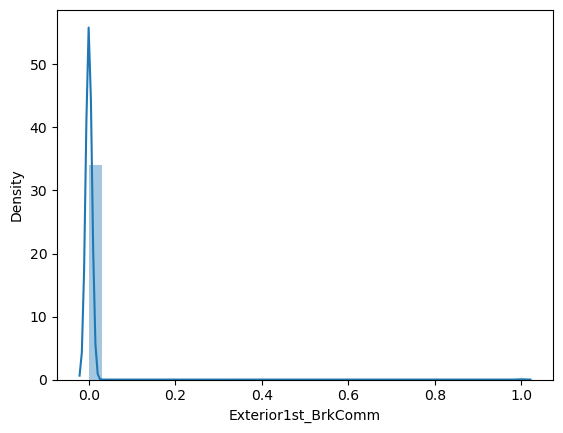

Skewness: 5.128645120609929
count      1168
unique        2
top       False
freq       1128
Name: Exterior1st_BrkFace, dtype: object


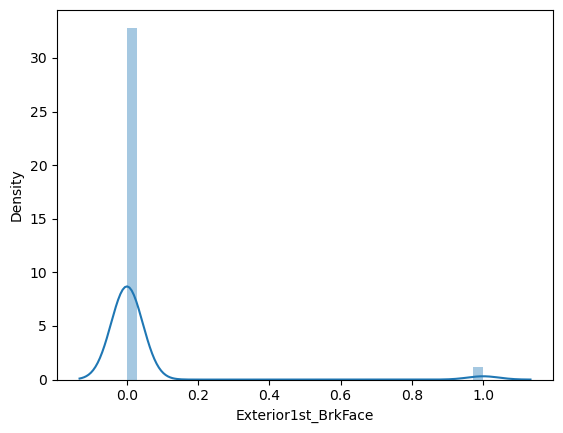

Skewness: 34.17601498127013
count      1168
unique        2
top       False
freq       1167
Name: Exterior1st_CBlock, dtype: object


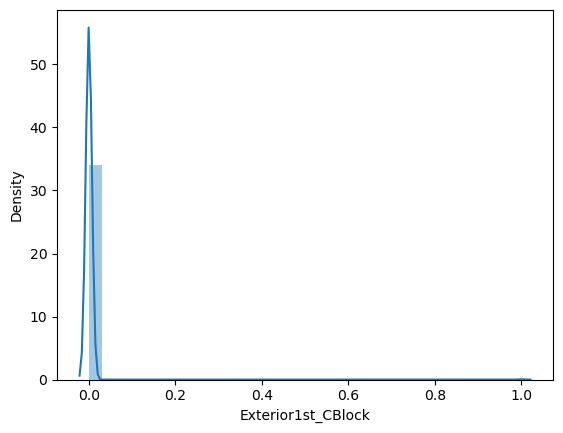

Skewness: 4.629386643697082
count      1168
unique        2
top       False
freq       1120
Name: Exterior1st_CemntBd, dtype: object


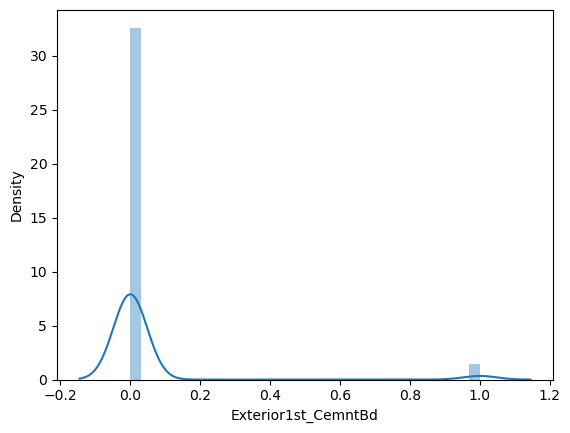

Skewness: 2.052469308512473
count      1168
unique        2
top       False
freq       1002
Name: Exterior1st_HdBoard, dtype: object


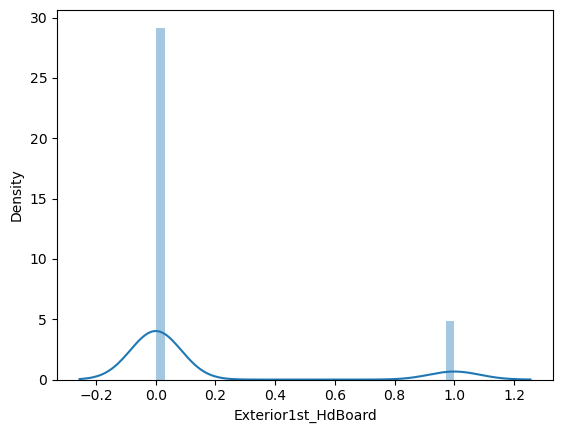

Skewness: 34.17601498127012
count      1168
unique        2
top       False
freq       1167
Name: Exterior1st_ImStucc, dtype: object


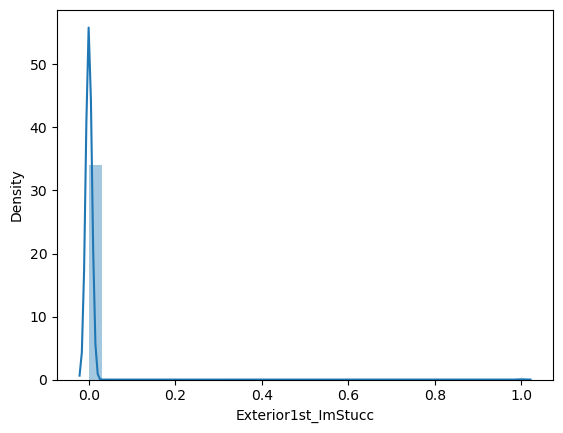

Skewness: 1.9933869833122373
count      1168
unique        2
top       False
freq        996
Name: Exterior1st_MetalSd, dtype: object


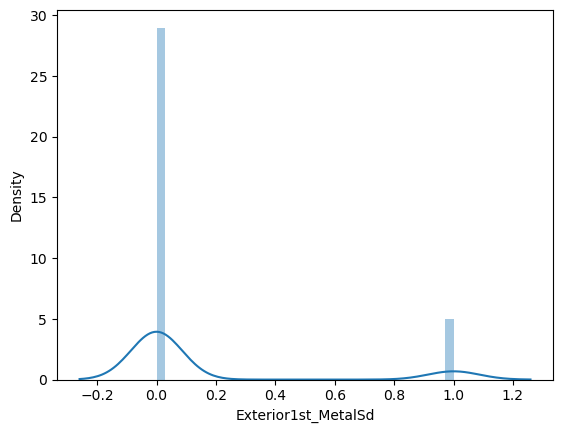

Skewness: 3.22193487166184
count      1168
unique        2
top       False
freq       1080
Name: Exterior1st_Plywood, dtype: object


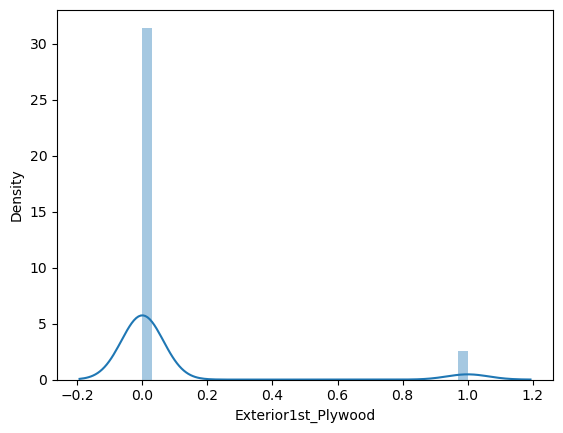

Skewness: 24.134983500611565
count      1168
unique        2
top       False
freq       1166
Name: Exterior1st_Stone, dtype: object


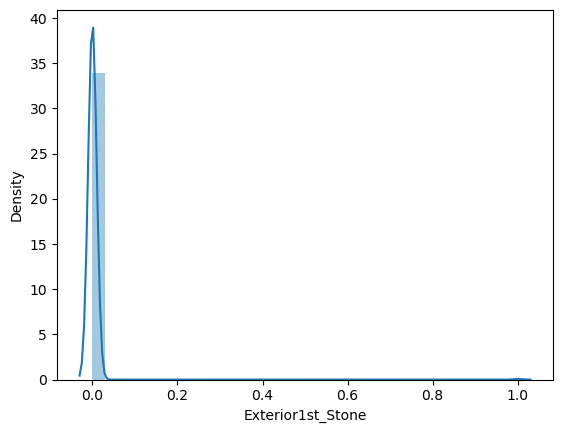

Skewness: 7.087955152673852
count      1168
unique        2
top       False
freq       1146
Name: Exterior1st_Stucco, dtype: object


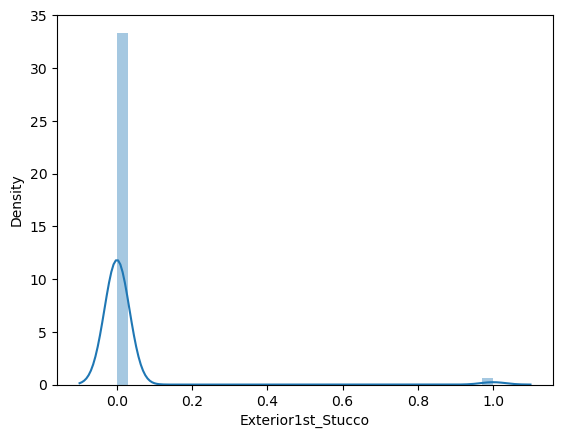

Skewness: 0.5398226489959318
count      1168
unique        2
top       False
freq        736
Name: Exterior1st_VinylSd, dtype: object


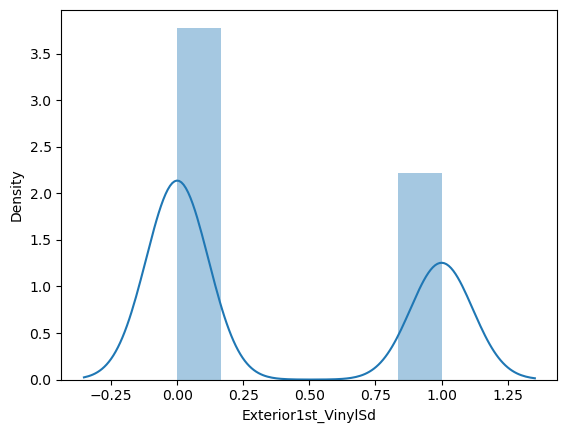

Skewness: 2.146301680823185
count      1168
unique        2
top       False
freq       1011
Name: Exterior1st_Wd Sdng, dtype: object


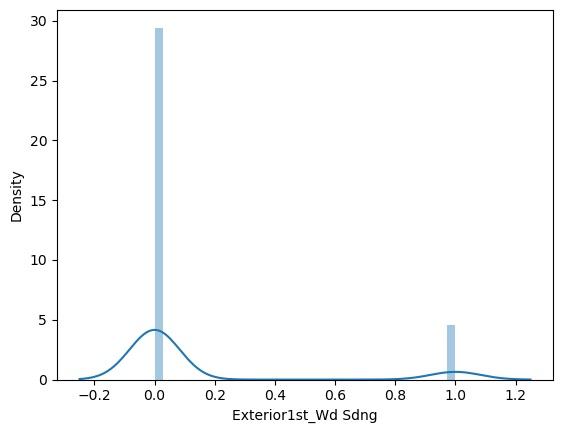

Skewness: 7.087955152673852
count      1168
unique        2
top       False
freq       1146
Name: Exterior1st_WdShing, dtype: object


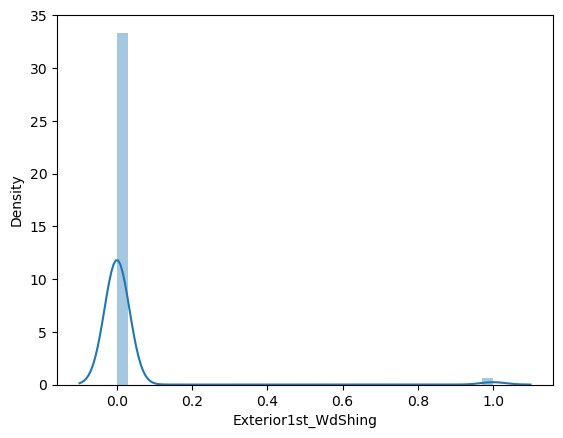

Skewness: 8.980411308323404
count      1168
unique        2
top       False
freq       1154
Name: Exterior2nd_AsbShng, dtype: object


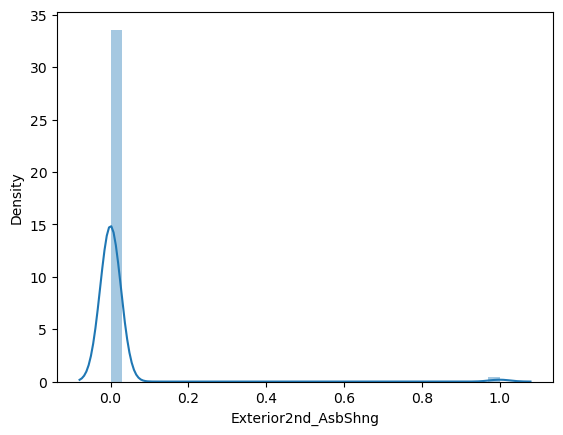

Skewness: 24.134983500611565
count      1168
unique        2
top       False
freq       1166
Name: Exterior2nd_AsphShn, dtype: object


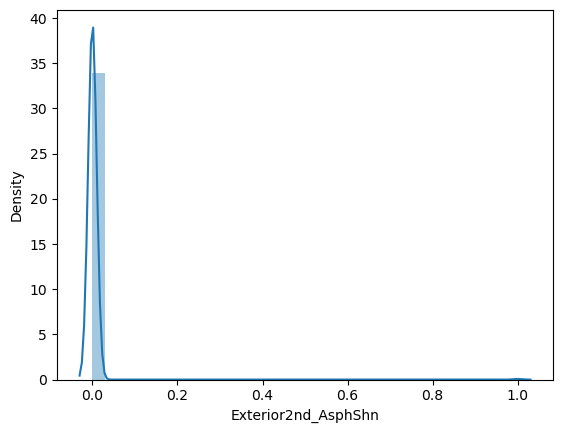

Skewness: 13.86236864182929
count      1168
unique        2
top       False
freq       1162
Name: Exterior2nd_Brk Cmn, dtype: object


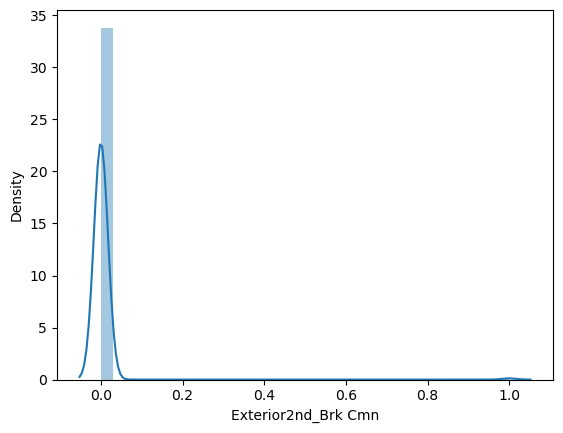

Skewness: 7.45386386668776
count      1168
unique        2
top       False
freq       1148
Name: Exterior2nd_BrkFace, dtype: object


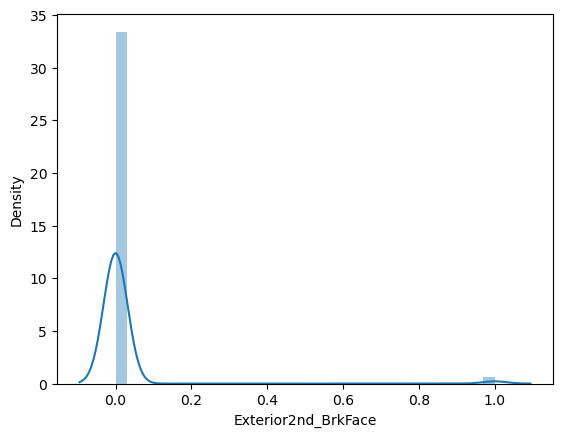

Skewness: 34.17601498127013
count      1168
unique        2
top       False
freq       1167
Name: Exterior2nd_CBlock, dtype: object


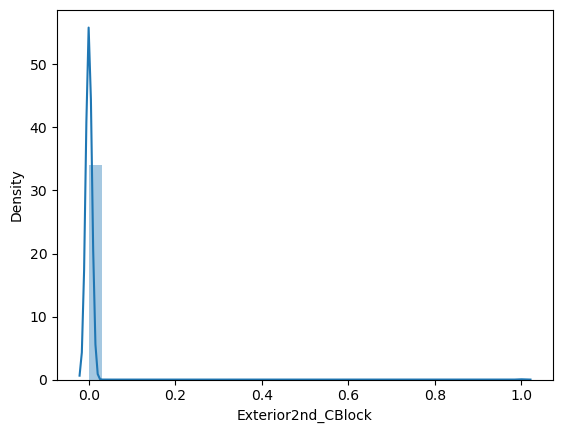

Skewness: 4.685013483047621
count      1168
unique        2
top       False
freq       1121
Name: Exterior2nd_CmentBd, dtype: object


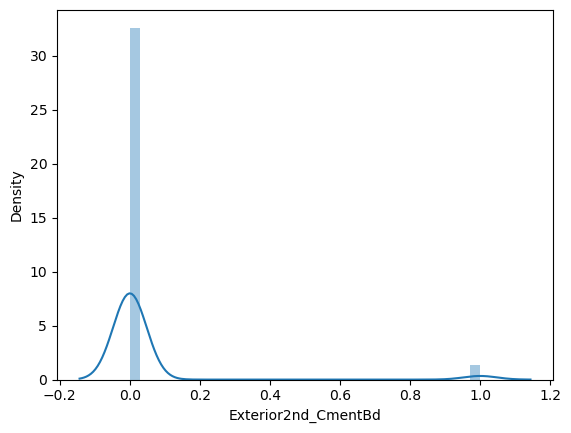

Skewness: 2.2014224623889294
count      1168
unique        2
top       False
freq       1016
Name: Exterior2nd_HdBoard, dtype: object


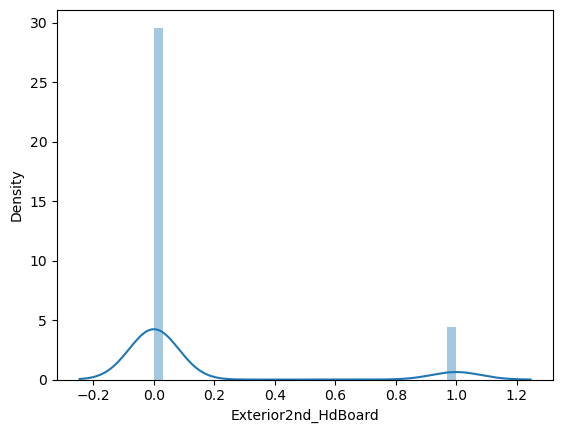

Skewness: 11.97393206916992
count      1168
unique        2
top       False
freq       1160
Name: Exterior2nd_ImStucc, dtype: object


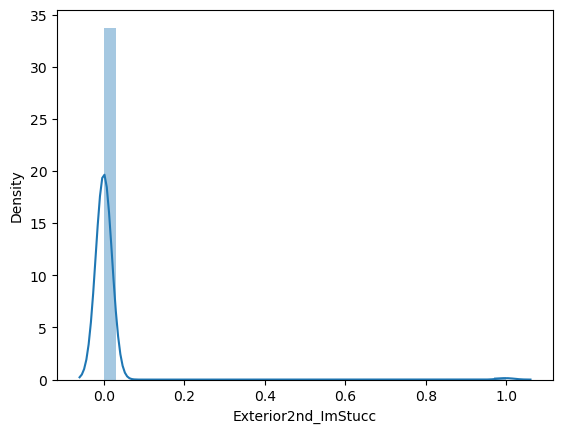

Skewness: 2.0324832931536387
count      1168
unique        2
top       False
freq       1000
Name: Exterior2nd_MetalSd, dtype: object


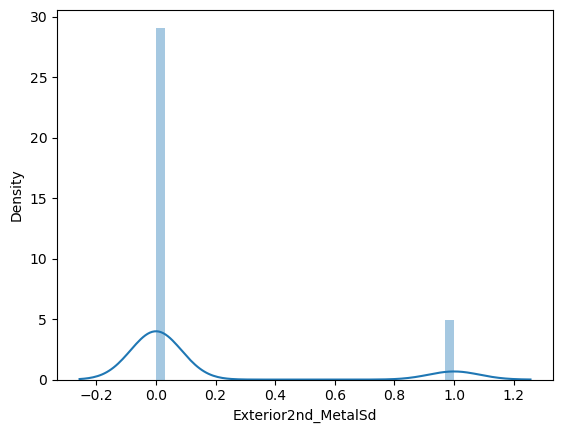

Skewness: 0
count      1168
unique        1
top       False
freq       1168
Name: Exterior2nd_NA, dtype: object


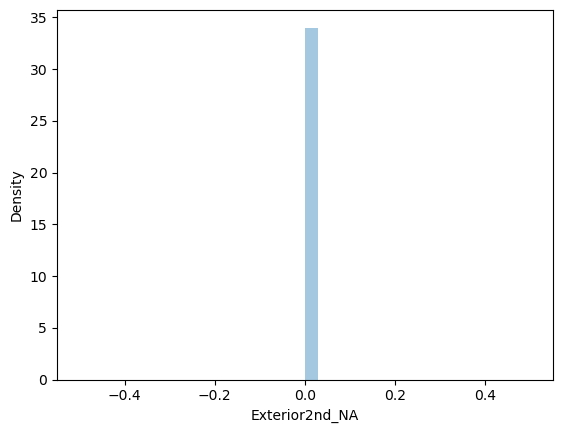

Skewness: 34.17601498127015
count      1168
unique        2
top       False
freq       1167
Name: Exterior2nd_Other, dtype: object


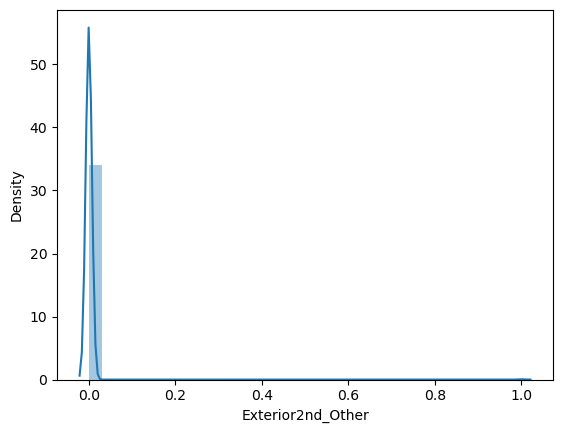

Skewness: 2.6669255147132915
count      1168
unique        2
top       False
freq       1051
Name: Exterior2nd_Plywood, dtype: object


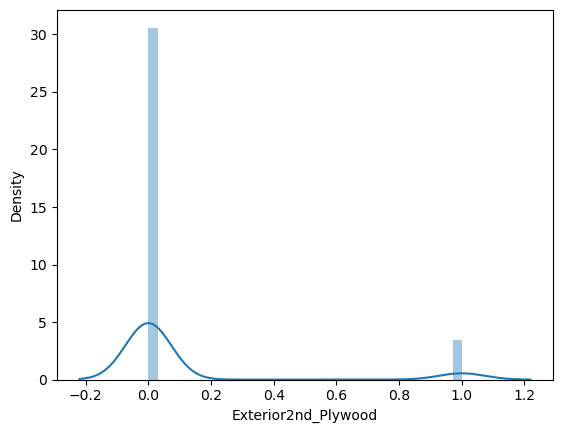

Skewness: 17.021969279861406
count      1168
unique        2
top       False
freq       1164
Name: Exterior2nd_Stone, dtype: object


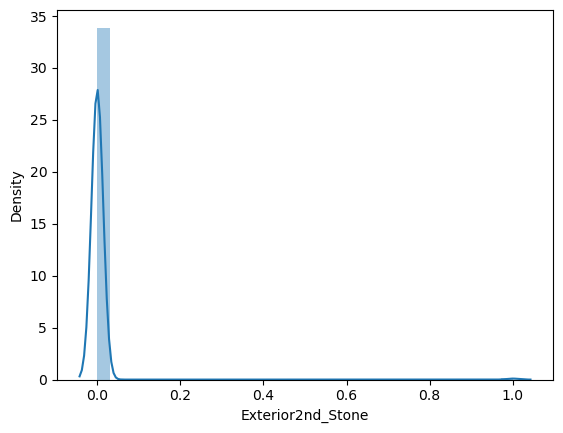

Skewness: 6.767958524254943
count      1168
unique        2
top       False
freq       1144
Name: Exterior2nd_Stucco, dtype: object


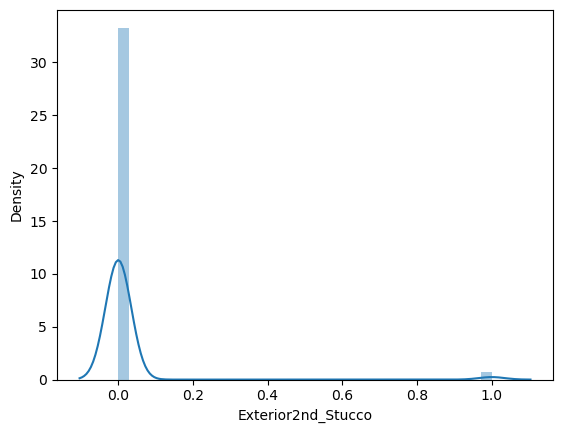

Skewness: 0.5781994443496397
count      1168
unique        2
top       False
freq        746
Name: Exterior2nd_VinylSd, dtype: object


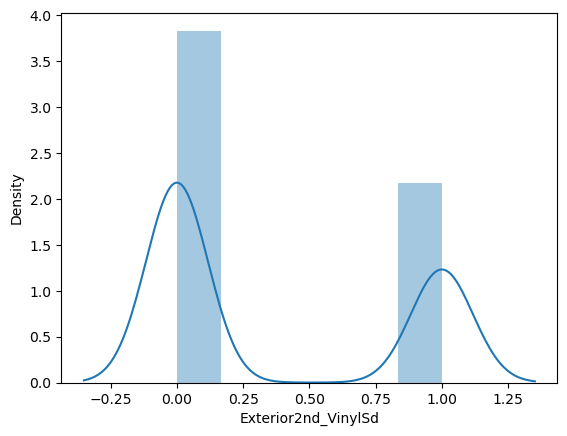

Skewness: 2.212723971996959
count      1168
unique        2
top       False
freq       1017
Name: Exterior2nd_Wd Sdng, dtype: object


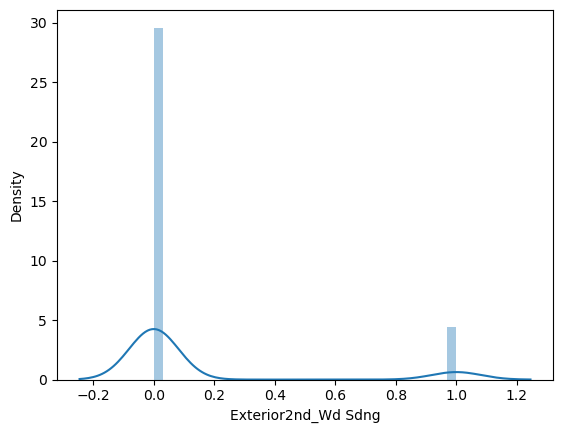

Skewness: 5.8986461819279565
count      1168
unique        2
top       False
freq       1137
Name: Exterior2nd_Wd Shng, dtype: object


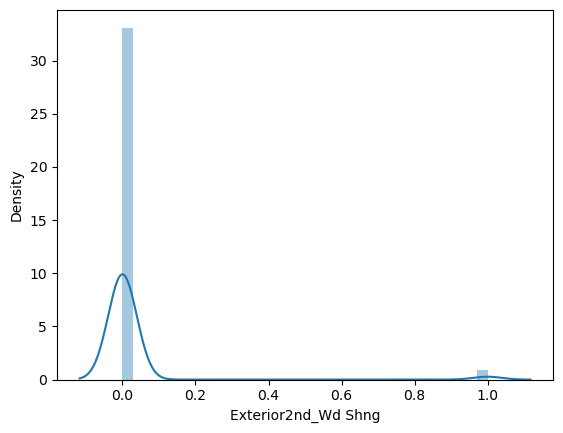

Skewness: 8.980411308323406
count      1168
unique        2
top       False
freq       1154
Name: MasVnrType_BrkCmn, dtype: object


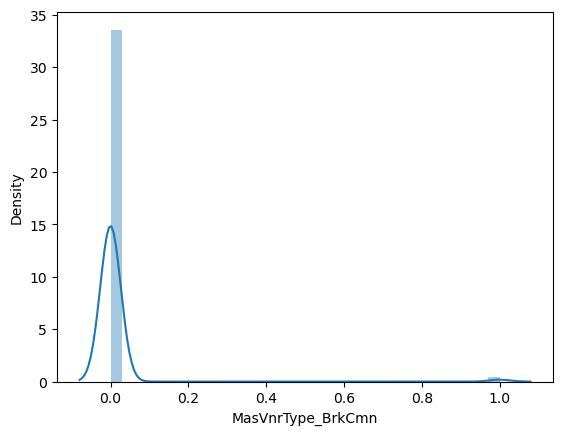

Skewness: 0.8448305629254254
count      1168
unique        2
top       False
freq        811
Name: MasVnrType_BrkFace, dtype: object


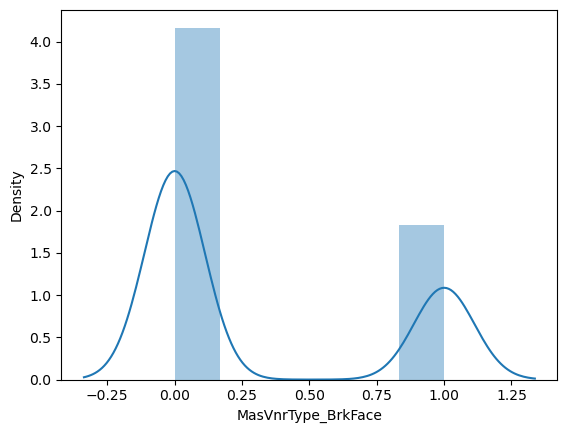

Skewness: -0.3552244818481983
count     1168
unique       2
top       True
freq       686
Name: MasVnrType_None, dtype: object


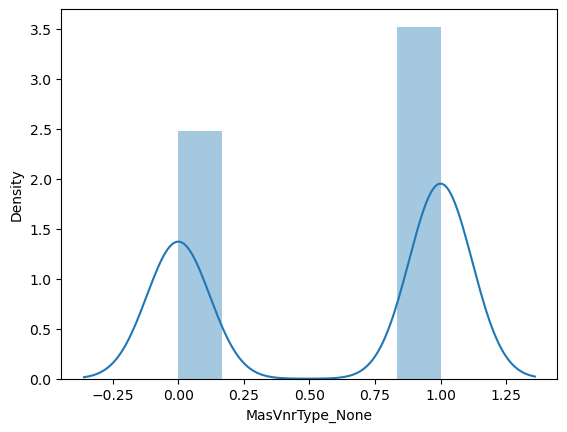

Skewness: 2.7653522043874643
count      1168
unique        2
top       False
freq       1057
Name: MasVnrType_Stone, dtype: object


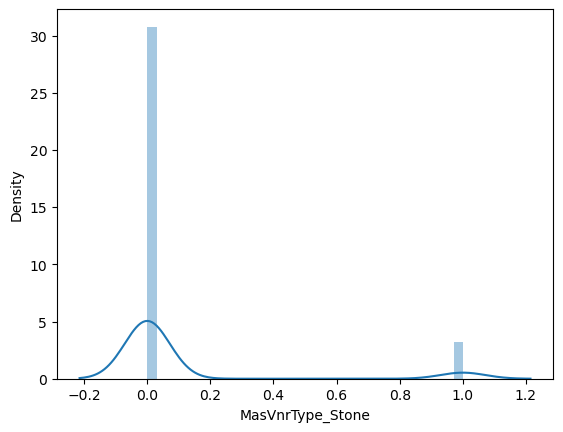

Skewness: 2.635603179228119
count      1168
unique        2
top       False
freq       1049
Name: Foundation_BrkTil, dtype: object


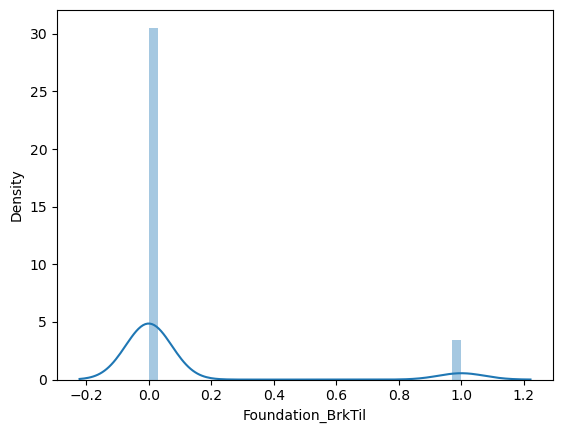

Skewness: 0.3087935140155676
count      1168
unique        2
top       False
freq        673
Name: Foundation_CBlock, dtype: object


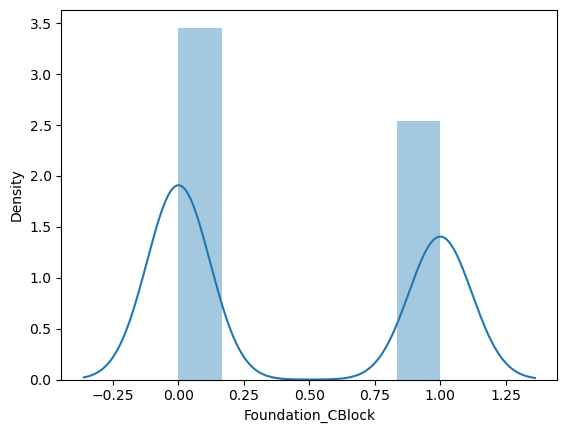

Skewness: 0.20335514657033354
count      1168
unique        2
top       False
freq        643
Name: Foundation_PConc, dtype: object


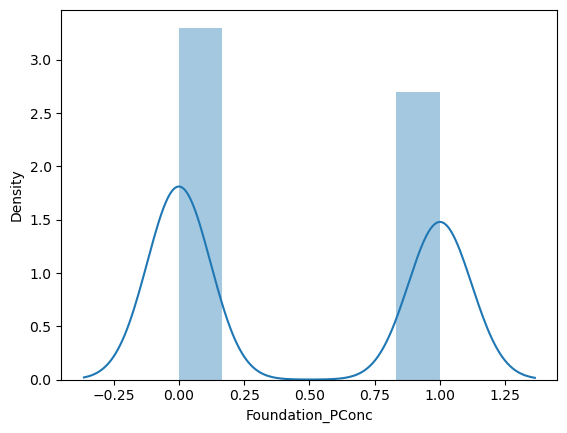

Skewness: 7.453863866687758
count      1168
unique        2
top       False
freq       1148
Name: Foundation_Slab, dtype: object


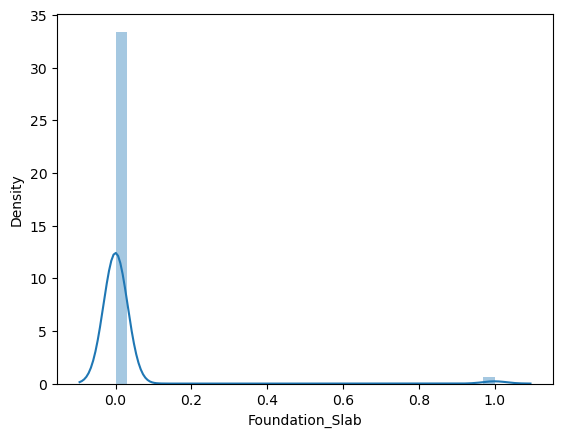

Skewness: 13.86236864182929
count      1168
unique        2
top       False
freq       1162
Name: Foundation_Stone, dtype: object


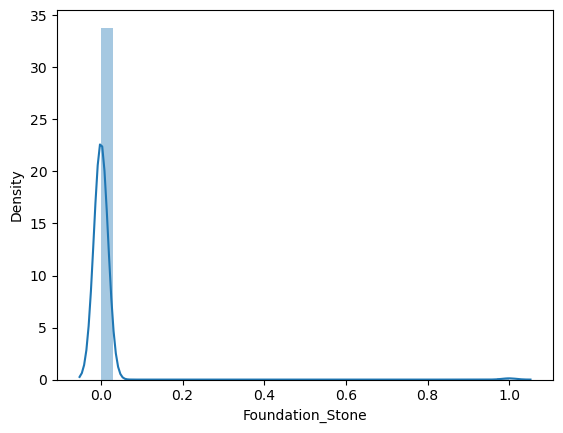

Skewness: 19.68071340074267
count      1168
unique        2
top       False
freq       1165
Name: Foundation_Wood, dtype: object


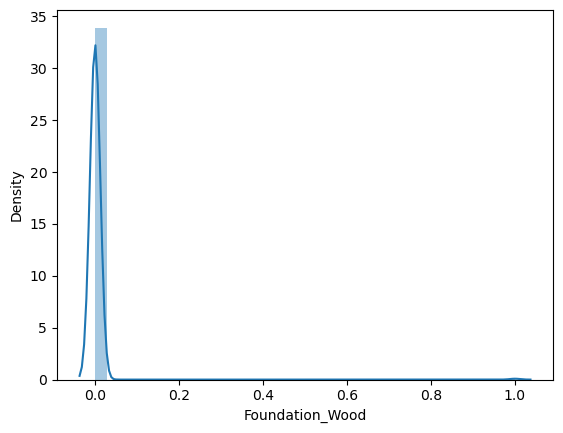

Skewness: 34.17601498127014
count      1168
unique        2
top       False
freq       1167
Name: Heating_Floor, dtype: object


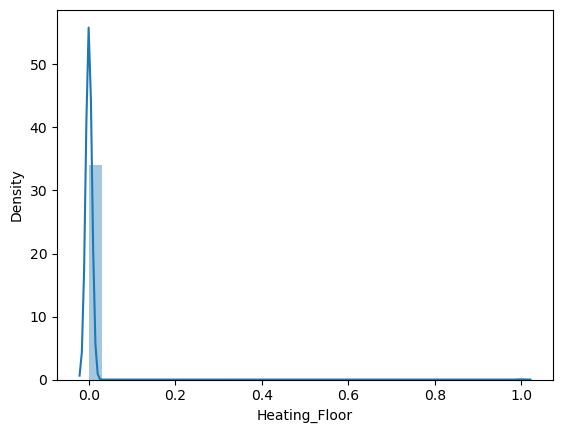

Skewness: -6.4848922978915144
count     1168
unique       2
top       True
freq      1142
Name: Heating_GasA, dtype: object


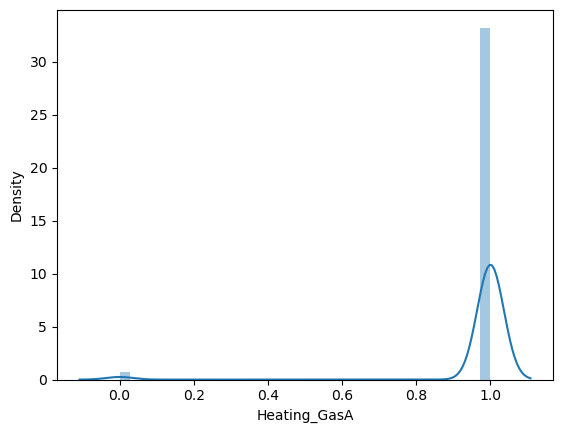

Skewness: 8.980411308323406
count      1168
unique        2
top       False
freq       1154
Name: Heating_GasW, dtype: object


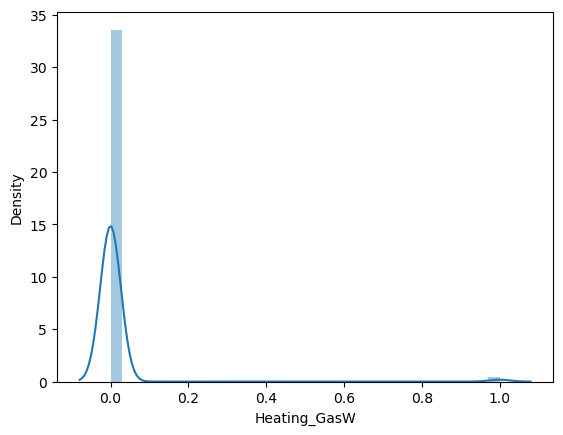

Skewness: 15.205195164332952
count      1168
unique        2
top       False
freq       1163
Name: Heating_Grav, dtype: object


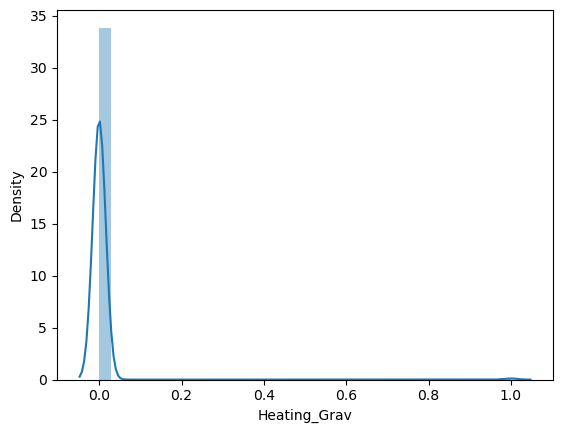

Skewness: 24.134983500611565
count      1168
unique        2
top       False
freq       1166
Name: Heating_OthW, dtype: object


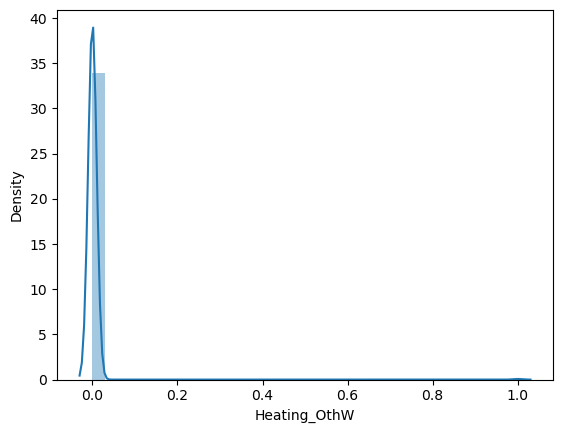

Skewness: 17.021969279861406
count      1168
unique        2
top       False
freq       1164
Name: Heating_Wall, dtype: object


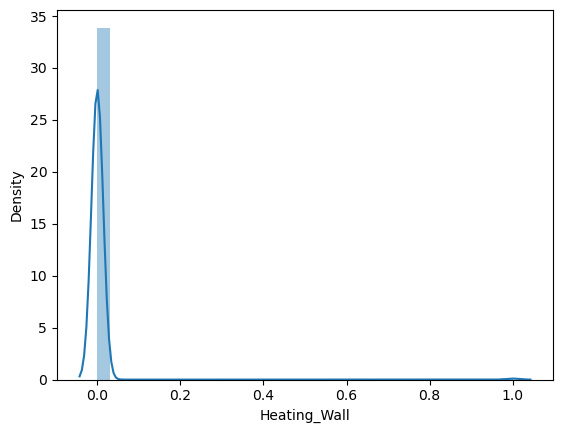

In [21]:
for col in cat_feat:
    plt.tight_layout()
    sns.distplot(training[col])
    print("Skewness: "+str(training[col].skew()))
    print(training[col].describe())
    plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(random_state=42)
rand.fit(training.drop('SalePrice',axis=1), y)
rand.feature_importances_

array([6.65778752e-03, 8.45312293e-03, 1.29137864e-02, 2.13381649e-03,
       1.54777461e-03, 7.36932568e-04, 5.09788349e-01, 1.21590143e-02,
       3.93409698e-03, 4.98040333e-03, 1.49593774e-03, 4.78378107e-03,
       7.30843205e-04, 1.39388520e-03, 2.62811366e-03, 2.13250170e-02,
       3.12124694e-04, 1.29835089e-04, 7.41599672e-03, 5.20443926e-02,
       1.46127500e-03, 1.23322188e-02, 9.16284000e-04, 5.93819022e-03,
       0.00000000e+00, 9.85351169e-02, 0.00000000e+00, 4.03050724e-03,
       1.02668079e-03, 3.58862394e-03, 1.06731976e-03, 1.13559419e-02,
       3.63018631e-03, 8.49027890e-02, 1.16626206e-03, 8.03193486e-04,
       1.19572464e-03, 2.94403771e-03, 7.05215405e-04, 2.10176647e-08,
       3.17705660e-04, 0.00000000e+00, 2.80278549e-05, 1.54822434e-03,
       1.76914358e-04, 0.00000000e+00, 4.56558446e-03, 6.36912766e-04,
       2.65482049e-03, 2.41818454e-02, 1.29907046e-03, 1.55496909e-02,
       8.29869736e-03, 1.97790258e-02, 7.82255892e-05, 0.00000000e+00,
      

In [23]:
dict(reversed(sorted(zip(rand.feature_importances_, training.loc[:,training.columns!='SalePrice'].columns.values))))

{0.5097883486222982: 'OverallQual',
 0.09853511693073833: 'GrLivArea',
 0.08490278901666912: 'GarageCars',
 0.05204439259232769: 'TotalBsmtSF',
 0.024181845393291174: 'Total_Bathrooms',
 0.021325016952657965: 'BsmtFinSF1',
 0.019779025828507026: 'age',
 0.015549690858491578: 'AvgRoomSize',
 0.012913786399479071: 'LotArea',
 0.012332218831245351: 'CentralAir',
 0.012159014293580161: 'OverallCond',
 0.011355941887201884: 'GarageType',
 0.008453122925334424: 'LotFrontage',
 0.008298697356197964: 'Total_porch_sf',
 0.007415996719312028: 'BsmtUnfSF',
 0.006657787524440527: 'MSZoning',
 0.005938190218704214: '2ndFlrSF',
 0.004980403327263013: 'ExterQual',
 0.004783781066308529: 'BsmtQual',
 0.004565584459362169: 'MoSold',
 0.004030507240129173: 'KitchenQual',
 0.003934096984196371: 'MasVnrArea',
 0.0036301863058560814: 'GarageFinish',
 0.0035886239356697144: 'Fireplaces',
 0.002944037709168696: 'OpenPorchSF',
 0.002654820490965293: 'SaleCondition',
 0.002628113662966525: 'BsmtFinType1',
 0.0

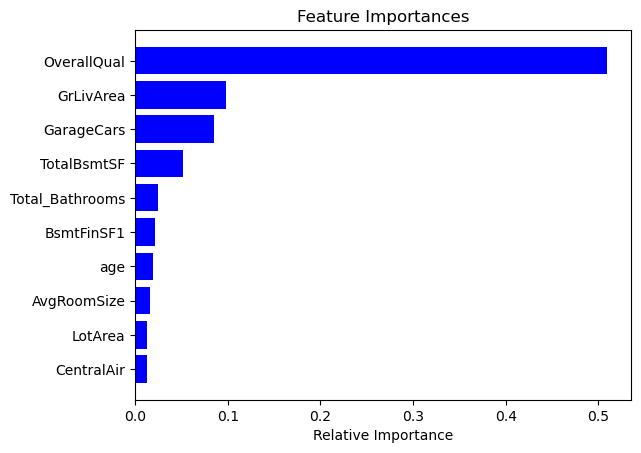

In [24]:
features = training.loc[:,training.columns!='SalePrice'].columns
importances = rand.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x_train=training.loc[:,training.columns!='SalePrice']
y_train=training['SalePrice']
x_valid=validation.loc[:,validation.columns!='SalePrice']
y_valid=validation['SalePrice']
regressor = LinearRegression()
regressor.fit(x_train, np.log(y_train/100000))
y_pred=regressor.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=regressor.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('reg_submission.csv', index=False)

Mean Absolute Error: 0.09567189594046792
Mean Squared Error: 0.019593453383778662
Root Mean Squared Error: 0.13997661727509586
R-squared Error: 0.8871056281249657
[0.16976831 0.4830233  0.62026915 ... 0.42891561 0.17456783 0.76703935]


In [26]:
regressor = LinearRegression()
regressor.fit(x_train[[features[i] for i in indices]], np.log(y_train/100000))
y_pred=regressor.predict(x_valid[[features[i] for i in indices]])
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=regressor.predict(test_data[[features[i] for i in indices]])
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('reg_submission_improved.csv', index=False)

Mean Absolute Error: 0.09749430506260377
Mean Squared Error: 0.01897392335800986
Root Mean Squared Error: 0.13774586512128
R-squared Error: 0.8906752619075841
[0.15674457 0.47233442 0.5671238  ... 0.4553336  0.14984311 0.86012869]


In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, np.log(y_train/100000))
y_pred=lasso_reg.predict(x_valid)
print('Mean Absolute Error:', metrics.mean_absolute_error(np.log(y_valid/100000), y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(np.log(y_valid/100000), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_valid/100000), y_pred)))
print('R-squared Error:', metrics.r2_score(np.log(y_valid/100000), y_pred))
#Predit the sale price in test dataset and save as pdf for submissiom to kaggle competition
y_pred=lasso_reg.predict(test_data)
print(y_pred)
my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': 100000*np.exp(y_pred)})
my_submission.to_csv('lasso_submission.csv', index=False)

Mean Absolute Error: 0.0846664531484996
Mean Squared Error: 0.014353104273203663
Root Mean Squared Error: 0.11980444179246304
R-squared Error: 0.9172996888480258
[0.14715719 0.47246684 0.59568017 ... 0.50337727 0.17621674 0.83646587]
